In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from rpy2.robjects import r, numpy2ri
from rpy2.robjects import numpy2ri
numpy2ri.activate()
from rpy2.robjects.packages import importr
sinkr = importr('sinkr')
from sklearn.decomposition import PCA
import torch
import torch.nn as nn
import torch.optim as optim
import pytorch_lightning as pl
print(torch.__version__)

1.10.1+cu102


In [40]:
from torch.utils.data import Dataset,DataLoader
import torch.utils.data as Data
from pytorch_lightning.callbacks.early_stopping import EarlyStopping

# DataLoader test

In [15]:
# x = torch.linspace(1,10,10)
# y = torch.linspace(10,1,10)
x=torch.zeros(3,5)
for i in range(3):
    for j in range(5):
        x[i][j]=5*i+j+1
print(x)
y=torch.zeros(3,2)
for i in range(3):
    for j in range(2):
        y[i][j]=2*i+j+1
print(y)

# torch_dataset = Data.TensorDataset(x,y)
torch_dataset1 = Data.TensorDataset(x)
torch_dataset2 = Data.TensorDataset(y)
loader1 = Data.DataLoader(dataset = torch_dataset1, batch_size = 1, shuffle = False)
loader2 = Data.DataLoader(dataset = torch_dataset2, batch_size = 1, shuffle = False)
for epoch in range(5):
    i=0
    for batch_x in loader1:
        i=i+1
        print('Epoch:{} | num:{} | batch_x:{} '.format(epoch,i,batch_x))

# loader = Data.DataLoader(dataset = torch_dataset, batch_size = 2, shuffle = False)
# for epoch in range(5):
#     i=0
#     for batch_x , batch_y in loader:
#         i=i+1
#         print('Epoch:{} | num:{} | batch_x:{} | batch_y:{}'.format(epoch,i,batch_x,batch_y))

tensor([[ 1.,  2.,  3.,  4.,  5.],
        [ 6.,  7.,  8.,  9., 10.],
        [11., 12., 13., 14., 15.]])
tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
Epoch:0 | num:1 | batch_x:[tensor([[1., 2., 3., 4., 5.]])] 
Epoch:0 | num:2 | batch_x:[tensor([[ 6.,  7.,  8.,  9., 10.]])] 
Epoch:0 | num:3 | batch_x:[tensor([[11., 12., 13., 14., 15.]])] 
Epoch:1 | num:1 | batch_x:[tensor([[1., 2., 3., 4., 5.]])] 
Epoch:1 | num:2 | batch_x:[tensor([[ 6.,  7.,  8.,  9., 10.]])] 
Epoch:1 | num:3 | batch_x:[tensor([[11., 12., 13., 14., 15.]])] 
Epoch:2 | num:1 | batch_x:[tensor([[1., 2., 3., 4., 5.]])] 
Epoch:2 | num:2 | batch_x:[tensor([[ 6.,  7.,  8.,  9., 10.]])] 
Epoch:2 | num:3 | batch_x:[tensor([[11., 12., 13., 14., 15.]])] 
Epoch:3 | num:1 | batch_x:[tensor([[1., 2., 3., 4., 5.]])] 
Epoch:3 | num:2 | batch_x:[tensor([[ 6.,  7.,  8.,  9., 10.]])] 
Epoch:3 | num:3 | batch_x:[tensor([[11., 12., 13., 14., 15.]])] 
Epoch:4 | num:1 | batch_x:[tensor([[1., 2., 3., 4., 5.]])] 
Epoch:4 | num:2 | b

In [189]:
class MyDataset(Dataset):
    def __init__(self):
        self.data = torch.tensor([[1,2,3],[2,3,4],[3,4,5],[4,5,6]])
        self.label = torch.LongTensor([1,1,0,0])

    def __getitem__(self,index):
        return self.data[index],self.label[index]

    def __len__(self):
        return len(self.data)

mydataloader = DataLoader(dataset=MyDataset,  batch_size=1)
for i,(data,label) in enumerate(mydataloader):
    print(data,label)

TypeError: object of type 'type' has no len()

# Data

In [4]:
data=pd.read_csv('v100_hr_20200101-0930_cut_utf8.csv')

/home/shuanjeng/miniconda3/envs/useR/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# 開始就把x1 x2分開 用x1推y

## read data

In [8]:
x1=np.zeros([243,1704])
x2=np.zeros([243,6816])

#x1 (0th~1703th column as x)
for i in range (0,243):
    for j in range (0,71):
        a=np.array(data['obs_PMf'][6816*i+96*j:6816*i+96*j+24])
        for k in range (0,24):
            if a[k]=='\\N' :
                a[k]=np.nan
        for k in range (0,24):
            x1[i][j*24+k]=a[k]

#x2 (1704th~8519th column as x)
for i in range (1,244):
    b=np.array(data['cal_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if b[j]=='\\N' :
            b[j]=np.nan
    for j in range(0,6816):
        x2[i-1][j]=b[j]
        
print(np.shape(x1))
print(np.shape(x2))

(243, 1704)
(243, 6816)


## dineof

In [9]:
x1Restruct=sinkr.dineof(x1)
x2Restruct=sinkr.dineof(x2)

[1]
 "1 EOF ; RMS = 7.37183591"


[1]
 "1 EOF ; RMS = 7.31079924"


[1]
 "1 EOF ; RMS = 7.30953171"


[1]
 "1 EOF ; RMS = 7.30947096"


[1]
 "1 EOF ; RMS = 7.30946178"


[1]
 "2 EOF ; RMS = 6.50361918"


[1]
 "2 EOF ; RMS = 6.50632044"


[1]
 "3 EOF ; RMS = 6.01341915"


[1]
 "3 EOF ; RMS = 6.01511952"


[1]
 "4 EOF ; RMS = 5.74067476"


[1]
 "4 EOF ; RMS = 5.74475075"


[1]
 "5 EOF ; RMS = 5.5352612"


[1]
 "5 EOF ; RMS = 5.53873362"


[1]
 "6 EOF ; RMS = 5.43068764"


[1]
 "6 EOF ; RMS = 5.43372101"


[1]
 "7 EOF ; RMS = 5.32810559"


[1]
 "7 EOF ; RMS = 5.32996974"


[1]
 "8 EOF ; RMS = 5.25714612"


[1]
 "8 EOF ; RMS = 5.26015115"


[1]
 "9 EOF ; RMS = 5.20153468"


[1]
 "9 EOF ; RMS = 5.2053932"


[1]
 "10 EOF ; RMS = 5.16165181"


[1]
 "10 EOF ; RMS = 5.16877418"


[1]
 "11 EOF ; RMS = 5.14108461"


[1]
 "11 EOF ; RMS = 5.15698794"


[1]
 "12 EOF ; RMS = 5.12899035"


[1]
 "12 EOF ; RMS = 5.15029041"


[1]
 "13 EOF ; RMS = 5.16836899"


[1]
 "1 EOF ; RMS = 10.15269975"


[1]
 "1 

## Restruct Function

In [8]:
x1Restruct_Fun=np.array(x1Restruct[0])
x2Restruct_Fun=np.array(x2Restruct[0])
print(np.shape(x1Restruct_Fun))
print(np.shape(x2Restruct_Fun))

(243, 1704)
(243, 6816)


In [9]:
YRestruct_Fun=np.zeros([239,6816])
for i in range (0,239):
    for j in range (0,1704):
        YRestruct_Fun[i][j]=x1Restruct_Fun[i+1][j]
    for j in range (1704,3408):
        YRestruct_Fun[i][j]=x1Restruct_Fun[i+2][j-1704]
    for j in range (3408,5112):
        YRestruct_Fun[i][j]=x1Restruct_Fun[i+3][j-3408]
    for j in range (5112,6816):
        YRestruct_Fun[i][j]=x1Restruct_Fun[i+4][j-5112]
print(np.shape(YRestruct_Fun))

(239, 6816)


In [10]:
XRestruct_Fun=np.zeros([239,8520])
for i in range (0,239):
    for j in range (0,1704):
        XRestruct_Fun[i][j]=x1Restruct_Fun[i][j]
    for j in range (1704,8520):
        XRestruct_Fun[i][j]=x2Restruct_Fun[i][j-1704]
print(np.shape(XRestruct_Fun))

(239, 8520)


In [11]:
XMean_fun=np.zeros(8520)
for i in range(0,8520):
    for j in range(0,239):
        XMean_fun[i]=XMean_fun[i]+(XRestruct_Fun[j][i]/239)
YMean_fun=np.zeros(6816)
for i in range(0,6816):
    for j in range(0,239):
        YMean_fun[i]=YMean_fun[i]+(YRestruct_Fun[j][i]/239)
print(np.shape(XMean_fun))
print(np.shape(YMean_fun))

(8520,)
(6816,)


In [12]:
XRestruct_FunC=XRestruct_Fun
YRestruct_FunC=YRestruct_Fun
for i in range (0,239):
    for j in range (0,8520):
        XRestruct_FunC[i][j]=XRestruct_FunC[i][j]-XMean_fun[j]
    for j in range (0,6816):
        YRestruct_FunC[i][j]=YRestruct_FunC[i][j]-YMean_fun[j]
print(np.shape(XRestruct_FunC))
print(np.shape(YRestruct_FunC))

(239, 8520)
(239, 6816)


In [13]:
Xhat=XRestruct_FunC
Yhat=YRestruct_FunC
Xbar=XMean_fun
Ybar=YMean_fun
print('Xhat')
#print(Xhat)
print(np.shape(Xhat))
print('Yhat')
#print(Yhat)
print(np.shape(Yhat))
print('Xbar')
#print(Xbar)
print(np.shape(Xbar))
print('Ybar')
#print(Ybar)
print(np.shape(Ybar))

Xhat
(239, 8520)
Yhat
(239, 6816)
Xbar
(8520,)
Ybar
(6816,)


## sparse x1 x2

In [14]:
x1=np.zeros([239,1704])
x2=np.zeros([239,6816])
for i in range (0,239):
    for j in range (0,1704):
        x1[i][j]=Xhat[i][j]
    for j in range (0,6816):
        x2[i][j]=Xhat[i][1704+j]
print(np.shape(x1))
print(np.shape(x2))

(239, 1704)
(239, 6816)


## expend x1 x2

In [15]:
new_x=np.zeros([239*96,8520]) #22944
new_y=np.zeros([239*96,6816]) #22944
#new_x : 0th~1703th column
for i in range (0,96):
    for j in range (0,239):
        for k in range (0,1704):
            new_x[239*i+j][k]=x1[j][k]
#new_x : 1704th~8519th column
for i in range (0,96):
    for j in range (0,239):
        for k in range (0+i,6720+1+i,96): #6720=6816-96
            new_x[239*i+j][1704+k]=x2[j][k]
#new_y
for i in range (0,96):
    for j in range (0,239):
        for k in range (0,6816):
            new_y[239*i+j][k]=Yhat[j][k]
            
print(np.shape(new_x))
print(np.shape(new_y))

(22944, 8520)
(22944, 6816)


In [16]:
print(np.linalg.matrix_rank(new_x))
print(np.linalg.matrix_rank(new_y))

7054
238


# PCA(95%)

## pca

In [14]:
pca95 = PCA(n_components=0.95)
pca95.fit(new_x)

PCA(n_components=0.95)

In [15]:
x_pca95=pca95.transform(new_x)
print(x_pca95.shape)
print(np.linalg.matrix_rank(x_pca95))

(22944, 205)
205


## beta

In [17]:
beta1=np.dot( np.linalg.inv( np.dot( x_pca95.T,x_pca95 ) )  ,  np.dot( x_pca95.T,new_y )  )
print(np.shape(beta1))

(205, 6816)


## fit Y (base on training data)

In [18]:
new_Ybar=np.zeros([239*96,6816])
for i in range (0,239*96):
    new_Ybar[i]=Ybar
print(np.shape(new_Ybar))

(22944, 6816)


In [19]:
fit_y1=new_Ybar+np.dot(x_pca95  , beta1_1)
print(np.shape(fit_y1))

(22944, 6816)


In [20]:
fit95=np.zeros([239,6816])
for i in range (0,96):
    for j in range (0,239):
        for k in range (0,71):
            fit95[j][96*k+i]=fit_y1[239*i+j][96*k+i]
print(np.shape(fit95))

(239, 6816)


In [21]:
fit95_mean=np.zeros([239,6816])
for i in range (0,239):
    for j in range (0,6816):
        for k in range (0,96):
            fit95_mean[i][j]=fit95_mean[i][j]+fit_y1[239*k+i][j]/96
print(np.shape(fit95_mean))

(239, 6816)


## compare(training data)

In [22]:
k=0
s=0
# missing data number of data_cal
for i in range (0,243):
    a=np.array(data['cal_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            k=k+1

#missing data number of data_obs
for i in range (0,243):
    a=np.array(data['obs_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            s=s+1
print(k)
print(s)

7996
44464


In [23]:
fit95_test=fit95
fit95_mean_test=fit95_mean

In [24]:
old_x=np.zeros([239,6816])
old_y=np.zeros([239,6816])
#data_cal
for i in range (1,240):
    a=np.array(data['cal_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            a[j]=0
    old_x[i-1]=a
#data_obs
for i in range (1,240):
    a=np.array(data['obs_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            a[j]=0
    old_y[i-1]=a
#Delete missing data
for i in range(0,239):
    for j in range(6816):
        if old_x[i][j]==0:
            old_y[i][j]=0
            fit95_test[i][j]=0
            fit95_mean_test[i][j]=0
        if old_y[i][j]==0:
            old_x[i][j]=0
            fit95_test[i][j]=0
            fit95_mean_test[i][j]=0
print(np.shape(old_x))
print(np.shape(old_y))
print(np.shape(fit95_test))
print(np.shape(fit95_mean_test))

(239, 6816)
(239, 6816)
(239, 6816)
(239, 6816)


In [25]:
before_error=0
after_error1=0
after_error2=0
for i in range (0,239):
    for j in range(0,6816):
        before_error=before_error+abs(old_x[i][j]-old_y[i][j])
        after_error1=after_error1+abs(fit95_test[i][j]-old_y[i][j])
        after_error2=after_error2+abs(fit95_mean_test[i][j]-old_y[i][j])
before_error=before_error/239/6816
after_error1=after_error1/239/6816
after_error2=after_error2/239/6816
print("January to August (training data set) before_error: %f" %before_error)
print("January to August (training data set) after_error of 95: %f" %after_error1)
print("January to August (training data set) after_error of 95_mean: %f" %after_error2)

January to August (training data set) before_error: 7.960098
January to August (training data set) after_error of 95: 7.971828
January to August (training data set) after_error of 95_mean: 7.966877


## compare(testing data)

In [93]:
k=0
s=0
#missing data number data_cal
for i in range (244,274):
    a=np.array(data['cal_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            k=k+1

#missing data number data_obs
for i in range (244,274):
    a=np.array(data['obs_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            s=s+1
print(k)
print(s)

680
3124


In [99]:
old_x=np.zeros([274,6816])
old_y=np.zeros([274,6816])
bigx=np.zeros([243,8520])
#data_cal
for i in range (0,274):
    a=np.array(data['cal_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            a[j]=np.nan
    old_x[i]=a
#data_obs
for i in range (0,274):
    a=np.array(data['obs_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            a[j]=np.nan
    old_y[i]=a
#x=x1 mix x2
for i in range (0,243):
    for j in range(0,1704):
        bigx[i][j]=old_y[i][j]
for i in range (1,244):  
    for j in range(1704,8520):
        bigx[i-1][j]=old_y[i][j-1704]
print(np.shape(old_x))
print(np.shape(old_y))
print(np.shape(bigx))

(274, 6816)
(274, 6816)
(243, 8520)


In [100]:
x=np.zeros([30,8520])
for i in range (0,30):
    for j in range (0,1704):
        x[i][j]=old_y[i+243][j]
    for j in range (1704,8520):
        x[i][j]=old_x[i+244][j-1704]
print(np.shape(x))

(30, 8520)


In [101]:
xf=np.zeros([30,8520])
xa=bigx
a=243
for i in range (30):
    xa=np.insert(xa,a,x[i],0)
    xb=sinkr.dineof(xa)
    xc=xb[0]
    xf[i]=xc[a]
    a=a+1
print(np.shape(xf))

[1]
 "1 EOF ; RMS = 8.07178362"


[1]
 "1 EOF ; RMS = 8.04087581"


[1]
 "1 EOF ; RMS = 8.04096048"


[1]
 "2 EOF ; RMS = 7.42288802"


[1]
 "2 EOF ; RMS = 7.42241598"


[1]
 "2 EOF ; RMS = 7.42255637"


[1]
 "3 EOF ; RMS = 6.98328686"


[1]
 "3 EOF ; RMS = 6.98261369"


[1]
 "3 EOF ; RMS = 6.98262429"


[1]
 "4 EOF ; RMS = 6.69542822"


[1]
 "4 EOF ; RMS = 6.6955957"


[1]
 "5 EOF ; RMS = 6.53328342"


[1]
 "5 EOF ; RMS = 6.53384127"


[1]
 "6 EOF ; RMS = 6.40018165"


[1]
 "6 EOF ; RMS = 6.40221405"


[1]
 "7 EOF ; RMS = 6.25958427"


[1]
 "7 EOF ; RMS = 6.2605292"


[1]
 "8 EOF ; RMS = 6.15977394"


[1]
 "8 EOF ; RMS = 6.16136558"


[1]
 "9 EOF ; RMS = 6.06110939"


[1]
 "9 EOF ; RMS = 6.06384388"


[1]
 "10 EOF ; RMS = 5.95480249"


[1]
 "10 EOF ; RMS = 5.95446391"


[1]
 "10 EOF ; RMS = 5.95456961"


[1]
 "11 EOF ; RMS = 5.86754509"


[1]
 "11 EOF ; RMS = 5.87031857"


[1]
 "12 EOF ; RMS = 5.82295037"


[1]
 "12 EOF ; RMS = 5.82925785"


[1]
 "13 EOF ; RMS = 5.75293734"


[1]
 "13

In [102]:
xcal=xf
for i in range (0,30):
    for j in range (0,8520):
        xcal[i][j]=xcal[i][j]-Xbar[j]
print(np.shape(xcal))

(30, 8520)


In [103]:
new_xcal=np.zeros([30,205])
for i in range (0,30):
    daycal=np.zeros([1,8520])
    for j in range (0,8520):
        daycal[0][j]=xcal[i][j]
    new_xcal[i]=pca95.transform(daycal)
print(new_xcal.shape)

(30, 205)


In [104]:
new_Ybar=np.zeros([30,6816])
for i in range (0,30):
    new_Ybar[i]=Ybar

In [105]:
new_xfit=new_Ybar+np.dot(new_xcal, beta1)
# new_xfit=np.dot(new_xcal, beta1)
print(np.shape(new_xfit))

(30, 6816)


In [106]:
old_x=np.zeros([30,6816])
old_y=np.zeros([30,6816])
#data_cal
for i in range (244,274):
    a=np.array(data['cal_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            a[j]=0
    old_x[i-244]=a
#data_obs
for i in range (244,274):
    a=np.array(data['obs_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            a[j]=0
    old_y[i-244]=a
#Delete missing data
for i in range(0,30):
    for j in range(6816):
        if old_x[i][j]==0:
            old_y[i][j]=0
            new_xfit[i][j]=0
        if old_y[i][j]==0:
            old_x[i][j]=0
            new_xfit[i][j]=0
print(np.shape(old_x))
print(np.shape(old_y))
print(np.shape(new_xfit))

(30, 6816)
(30, 6816)
(30, 6816)


In [107]:
before_error=np.zeros(30)
after_error=np.zeros(30)
before_sta=np.zeros(71)
after_sta=np.zeros(71)
for i in range (0,30):
    a=0
    b=0
    for j in range(0,6816):
        a=a+abs(old_x[i][j]-old_y[i][j])
        b=b+abs(new_xfit[i][j]-old_y[i][j])
    before_error[i]=a/6816
    after_error[i]=b/6816
print(before_error.shape)
print(after_error.shape)

for i in range (0,71):
    c=0
    d=0
    for j in range (0,30):
        for k in range (96*i,96*i+96):
            c=c+abs(old_x[j][k]-old_y[j][k])
            d=d+abs(new_xfit[j][k]-old_y[j][k])
    before_sta[i]=c/96/30
    after_sta[i]=d/96/30
print(before_sta.shape)
print(after_sta.shape)

(30,)
(30,)
(71,)
(71,)


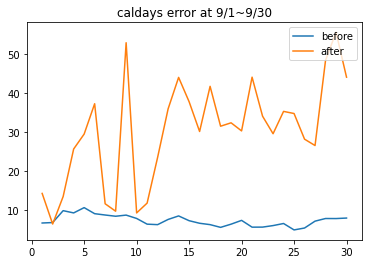

In [108]:
fig1 = plt.figure(1)
x=np.linspace(1,30,30)
plt.plot(x,before_error, label = 'before')
plt.plot(x,after_error, label ='after')
plt.legend(loc = 1)
plt.title('caldays error at 9/1~9/30')

plt.show()

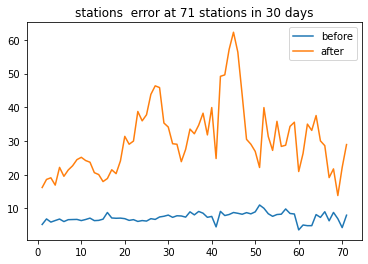

In [110]:
fig1 = plt.figure(1)
x=np.linspace(1,71,71)
plt.plot(x,before_sta, label = 'before')
plt.plot(x,after_sta, label ='after')
plt.legend(loc = 1)
plt.title('stations  error at 71 stations in 30 days')

plt.show()

# PCA(99%)

## pca

In [27]:
pca99 = PCA(n_components=0.99)
pca99.fit(new_x)

PCA(n_components=0.99)

In [28]:
x_pca99=pca99.transform(new_x)
print(x_pca99.shape)
print(np.linalg.matrix_rank(x_pca99))

(22944, 763)
763


## beta

In [29]:
beta1_2=np.dot( np.linalg.inv( np.dot( x_pca99.T,x_pca99 ) )  ,  np.dot( x_pca99.T,new_y )  )
print(np.shape(beta1_2))

(763, 6816)


## fit Y (base on training data)

In [30]:
new_Ybar=np.zeros([239*96,6816])
for i in range (0,239*96):
    new_Ybar[i]=Ybar
print(np.shape(new_Ybar))

(22944, 6816)


In [31]:
fit_y2=new_Ybar+np.dot(x_pca99  , beta1_2)
print(np.shape(fit_y2))

(22944, 6816)


In [32]:
fit99=np.zeros([239,6816])
for i in range (0,96):
    for j in range (0,239):
        for k in range (0,71):
            fit99[j][96*k+i]=fit_y2[239*i+j][96*k+i]
print(np.shape(fit99))

(239, 6816)


In [34]:
fit99_mean=np.zeros([239,6816])
for i in range (0,239):
    for j in range (0,6816):
        for k in range (0,96):
            fit99_mean[i][j]=fit99_mean[i][j]+fit_y2[239*k+i][j]/96
print(np.shape(fit99_mean))

(239, 6816)


## compare(training data)

In [33]:
k=0
s=0
# missing data number of data_cal
for i in range (0,243):
    a=np.array(data['cal_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            k=k+1

#missing data number of data_obs
for i in range (0,243):
    a=np.array(data['obs_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            s=s+1
print(k)
print(s)

7996
44464


In [35]:
fit99_test=fit99
fit99_mean_test=fit99_mean

In [36]:
old_x=np.zeros([239,6816])
old_y=np.zeros([239,6816])
#data_cal
for i in range (1,240):
    a=np.array(data['cal_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            a[j]=0
    old_x[i-1]=a
#data_obs
for i in range (1,240):
    a=np.array(data['obs_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            a[j]=0
    old_y[i-1]=a
#Delete missing data
for i in range(0,239):
    for j in range(6816):
        if old_x[i][j]==0:
            old_y[i][j]=0
            fit99_test[i][j]=0
            fit99_mean_test[i][j]=0
        if old_y[i][j]==0:
            old_x[i][j]=0
            fit99_test[i][j]=0
            fit99_mean_test[i][j]=0
print(np.shape(old_x))
print(np.shape(old_y))
print(np.shape(fit99_test))
print(np.shape(fit99_mean_test))

(239, 6816)
(239, 6816)
(239, 6816)
(239, 6816)


In [37]:
before_error=0
after_error1=0
after_error2=0
for i in range (0,239):
    for j in range(0,6816):
        before_error=before_error+abs(old_x[i][j]-old_y[i][j])
        after_error1=after_error1+abs(fit99_test[i][j]-old_y[i][j])
        after_error2=after_error2+abs(fit99_mean_test[i][j]-old_y[i][j])
before_error=before_error/239/6816
after_error1=after_error1/239/6816
after_error2=after_error2/239/6816
print("January to August (training data set) before_error: %f" %before_error)
print("January to August (training data set) after_error of 99: %f" %after_error1)
print("January to August (training data set) after_error of 99_mean: %f" %after_error2)

January to August (training data set) before_error: 7.960098
January to August (training data set) after_error of 99: 8.160373
January to August (training data set) after_error of 99_mean: 8.159379


## compare(testing data)

In [78]:
k=0
s=0
#missing data number data_cal
for i in range (244,274):
    a=np.array(data['cal_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            k=k+1

#missing data number data_obs
for i in range (244,274):
    a=np.array(data['obs_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            s=s+1
print(k)
print(s)

680
3124


In [79]:
old_x=np.zeros([274,6816])
old_y=np.zeros([274,6816])
bigx=np.zeros([273,8520])
#data_cal
for i in range (0,274):
    a=np.array(data['cal_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            a[j]=np.nan
    old_x[i]=a
#data_obs
for i in range (0,274):
    a=np.array(data['obs_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            a[j]=np.nan
    old_y[i]=a
#x=x1 mix x2
for i in range (0,273):
    for j in range(0,1704):
        bigx[i][j]=old_y[i][j]
for i in range (1,274):  
    for j in range(1704,8520):
        bigx[i-1][j]=old_y[i][j-1704]
print(np.shape(old_x))
print(np.shape(old_y))
print(np.shape(bigx))

(274, 6816)
(274, 6816)
(273, 8520)


In [80]:
x=np.zeros([30,8520])
for i in range (0,30):
    for j in range (0,1704):
        x[i][j]=old_y[i+243][j]
    for j in range (1704,8520):
        x[i][j]=old_x[i+244][j-1704]
print(np.shape(x))

(30, 8520)


In [81]:
xf=np.zeros([30,8520])
xa=bigx
a=273
for i in range (30):
    xa=np.insert(xa,a,x[i],0)
    xb=sinkr.dineof(xa)
    xc=xb[0]
    xf[i]=xc[a]
    a=a+1
print(np.shape(xf))

[1]
 "1 EOF ; RMS = 7.66895649"


[1]
 "1 EOF ; RMS = 7.63953821"


[1]
 "1 EOF ; RMS = 7.63916078"


[1]
 "1 EOF ; RMS = 7.63913707"


[1]
 "1 EOF ; RMS = 7.63913296"


[1]
 "2 EOF ; RMS = 7.00917862"


[1]
 "2 EOF ; RMS = 7.00832297"


[1]
 "2 EOF ; RMS = 7.00833803"


[1]
 "3 EOF ; RMS = 6.55194875"


[1]
 "3 EOF ; RMS = 6.55110348"


[1]
 "3 EOF ; RMS = 6.55120764"


[1]
 "4 EOF ; RMS = 6.27469344"


[1]
 "4 EOF ; RMS = 6.27646068"


[1]
 "5 EOF ; RMS = 6.11984131"


[1]
 "5 EOF ; RMS = 6.1202528"


[1]
 "6 EOF ; RMS = 5.97344197"


[1]
 "6 EOF ; RMS = 5.97396437"


[1]
 "7 EOF ; RMS = 5.85064885"


[1]
 "7 EOF ; RMS = 5.85303802"


[1]
 "8 EOF ; RMS = 5.77578176"


[1]
 "8 EOF ; RMS = 5.77902356"


[1]
 "9 EOF ; RMS = 5.69732169"


[1]
 "9 EOF ; RMS = 5.70070722"


[1]
 "10 EOF ; RMS = 5.61246466"


[1]
 "10 EOF ; RMS = 5.6144513"


[1]
 "11 EOF ; RMS = 5.54320696"


[1]
 "11 EOF ; RMS = 5.54637126"


[1]
 "12 EOF ; RMS = 5.48177361"


[1]
 "12 EOF ; RMS = 5.48622271"


[1]
 "13 E

In [82]:
xcal=xf
for i in range (0,30):
    for j in range (0,8520):
        xcal[i][j]=xcal[i][j]-Xbar[j]
print(np.shape(xcal))

(30, 8520)


In [84]:
new_xcal=np.zeros([30,763])
for i in range (0,30):
    daycal=np.zeros([1,8520])
    for j in range (0,8520):
        daycal[0][j]=xcal[i][j]
    new_xcal[i]=pca99.transform(daycal)
print(new_xcal.shape)

(30, 763)


In [85]:
new_Ybar=np.zeros([30,6816])
for i in range (0,30):
    new_Ybar[i]=Ybar

In [86]:
new_xfit=new_Ybar+np.dot(new_xcal, beta1_2)
# new_xfit=np.dot(new_xcal, beta1_2)
print(np.shape(new_xfit))

(30, 6816)


In [87]:
old_x=np.zeros([30,6816])
old_y=np.zeros([30,6816])
#data_cal
for i in range (244,274):
    a=np.array(data['cal_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            a[j]=0
    old_x[i-244]=a
#data_obs
for i in range (244,274):
    a=np.array(data['obs_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            a[j]=0
    old_y[i-244]=a
#Delete missing data
for i in range(0,30):
    for j in range(6816):
        if old_x[i][j]==0:
            old_y[i][j]=0
            new_xfit[i][j]=0
        if old_y[i][j]==0:
            old_x[i][j]=0
            new_xfit[i][j]=0
print(np.shape(old_x))
print(np.shape(old_y))
print(np.shape(new_xfit))

(30, 6816)
(30, 6816)
(30, 6816)


In [88]:
before_error=np.zeros(30)
after_error=np.zeros(30)
before_sta=np.zeros(71)
after_sta=np.zeros(71)
for i in range (0,30):
    a=0
    b=0
    for j in range(0,6816):
        a=a+abs(old_x[i][j]-old_y[i][j])
        b=b+abs(new_xfit[i][j]-old_y[i][j])
    before_error[i]=a/6816
    after_error[i]=b/6816
print(before_error.shape)
print(after_error.shape)

for i in range (0,71):
    c=0
    d=0
    for j in range (0,30):
        for k in range (96*i,96*i+96):
            c=c+abs(old_x[j][k]-old_y[j][k])
            d=d+abs(new_xfit[j][k]-old_y[j][k])
    before_sta[i]=c/96/30
    after_sta[i]=d/96/30
print(before_sta.shape)
print(after_sta.shape)

(30,)
(30,)
(71,)
(71,)


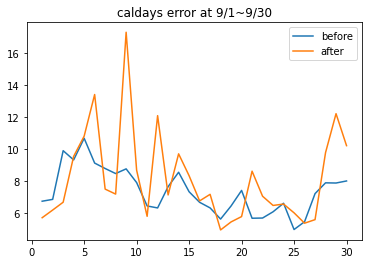

In [89]:
fig1 = plt.figure(1)
x=np.linspace(1,30,30)
plt.plot(x,before_error, label = 'before')
plt.plot(x,after_error, label ='after')
plt.legend(loc = 1)
plt.title('caldays error at 9/1~9/30')

plt.show()

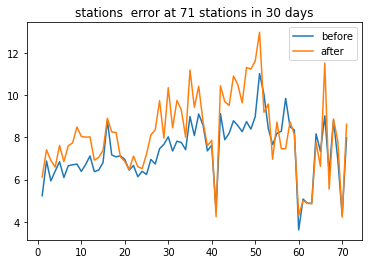

In [92]:
fig1 = plt.figure(1)
x=np.linspace(1,71,71)
plt.plot(x,before_sta, label = 'before')
plt.plot(x,after_sta, label ='after')
plt.legend(loc = 1)
plt.title('stations  error at 71 stations in 30 days')

plt.show()

# PCA(99.5)

## pca

In [111]:
pca995 = PCA(n_components=0.995)
pca995.fit(new_x)

PCA(n_components=0.995)

In [112]:
x_pca995=pca995.transform(new_x)
print(x_pca995.shape)
print(np.linalg.matrix_rank(x_pca995))

(22944, 1559)
1559


## beta

In [113]:
beta1_3=np.dot( np.linalg.inv( np.dot( x_pca995.T,x_pca995 ) )  ,  np.dot( x_pca995.T,new_y )  )
print(np.shape(beta1_3))

(1559, 6816)


## fit Y (base on training data)

In [114]:
new_Ybar=np.zeros([239*96,6816])
for i in range (0,239*96):
    new_Ybar[i]=Ybar
print(np.shape(new_Ybar))

(22944, 6816)


In [115]:
fit_y3=new_Ybar+np.dot(x_pca995  , beta1_3)
print(np.shape(fit_y3))

(22944, 6816)


In [116]:
fit995=np.zeros([239,6816])
for i in range (0,96):
    for j in range (0,239):
        for k in range (0,71):
            fit995[j][96*k+i]=fit_y3[239*i+j][96*k+i]
print(np.shape(fit995))

(239, 6816)


In [117]:
fit995_mean=np.zeros([239,6816])
for i in range (0,239):
    for j in range (0,6816):
        for k in range (0,96):
            fit995_mean[i][j]=fit995_mean[i][j]+fit_y3[239*k+i][j]/96
print(np.shape(fit995_mean))

(239, 6816)


## compare(training data)

In [118]:
k=0
s=0
# missing data number of data_cal
for i in range (0,243):
    a=np.array(data['cal_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            k=k+1

#missing data number of data_obs
for i in range (0,243):
    a=np.array(data['obs_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            s=s+1
print(k)
print(s)

7996
44464


In [119]:
fit995_test=fit995
fit995_mean_test=fit995_mean

In [120]:
old_x=np.zeros([239,6816])
old_y=np.zeros([239,6816])
#data_cal
for i in range (1,240):
    a=np.array(data['cal_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            a[j]=0
    old_x[i-1]=a
#data_obs
for i in range (1,240):
    a=np.array(data['obs_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            a[j]=0
    old_y[i-1]=a
#Delete missing data
for i in range(0,239):
    for j in range(6816):
        if old_x[i][j]==0:
            old_y[i][j]=0
            fit995_test[i][j]=0
            fit995_mean_test[i][j]=0
        if old_y[i][j]==0:
            old_x[i][j]=0
            fit995_test[i][j]=0
            fit995_mean_test[i][j]=0
print(np.shape(old_x))
print(np.shape(old_y))
print(np.shape(fit995_test))
print(np.shape(fit995_mean_test))

(239, 6816)
(239, 6816)
(239, 6816)
(239, 6816)


In [121]:
before_error=0
after_error1=0
after_error2=0
for i in range (0,239):
    for j in range(0,6816):
        before_error=before_error+abs(old_x[i][j]-old_y[i][j])
        after_error1=after_error1+abs(fit995_test[i][j]-old_y[i][j])
        after_error2=after_error2+abs(fit995_mean_test[i][j]-old_y[i][j])
before_error=before_error/239/6816
after_error1=after_error1/239/6816
after_error2=after_error2/239/6816
print("January to August (training data set) before_error: %f" %before_error)
print("January to August (training data set) after_error of 995: %f" %after_error1)
print("January to August (training data set) after_error of 995_mean: %f" %after_error2)

January to August (training data set) before_error: 7.960098
January to August (training data set) after_error of 995: 8.159978
January to August (training data set) after_error of 995_mean: 8.159427


## compare(testing data)

In [122]:
k=0
s=0
#missing data number data_cal
for i in range (244,274):
    a=np.array(data['cal_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            k=k+1

#missing data number data_obs
for i in range (244,274):
    a=np.array(data['obs_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            s=s+1
print(k)
print(s)

680
3124


In [123]:
old_x=np.zeros([274,6816])
old_y=np.zeros([274,6816])
bigx=np.zeros([273,8520])
#data_cal
for i in range (0,274):
    a=np.array(data['cal_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            a[j]=np.nan
    old_x[i]=a
#data_obs
for i in range (0,274):
    a=np.array(data['obs_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            a[j]=np.nan
    old_y[i]=a
#x=x1 mix x2
for i in range (0,273):
    for j in range(0,1704):
        bigx[i][j]=old_y[i][j]
for i in range (1,274):  
    for j in range(1704,8520):
        bigx[i-1][j]=old_y[i][j-1704]
print(np.shape(old_x))
print(np.shape(old_y))
print(np.shape(bigx))

(274, 6816)
(274, 6816)
(273, 8520)


In [124]:
x=np.zeros([30,8520])
for i in range (0,30):
    for j in range (0,1704):
        x[i][j]=old_y[i+243][j]
    for j in range (1704,8520):
        x[i][j]=old_x[i+244][j-1704]
print(np.shape(x))

(30, 8520)


In [132]:
xf=np.zeros([30,8520])
xa=bigx
a=273
for i in range (30):
    xa=np.insert(xa,a,x[i],0)
    xb=sinkr.dineof(xa)
    xc=xb[0]
    xf[i]=xc[a]
    a=a+1
print(np.shape(xf))

[1]
 "1 EOF ; RMS = 7.80664308"


[1]
 "1 EOF ; RMS = 7.77741224"


[1]
 "1 EOF ; RMS = 7.77722212"


[1]
 "1 EOF ; RMS = 7.77723288"


[1]
 "2 EOF ; RMS = 7.13704883"


[1]
 "2 EOF ; RMS = 7.1355688"


[1]
 "2 EOF ; RMS = 7.1355456"


[1]
 "2 EOF ; RMS = 7.13553748"


[1]
 "3 EOF ; RMS = 6.69715219"


[1]
 "3 EOF ; RMS = 6.69706255"


[1]
 "3 EOF ; RMS = 6.69714189"


[1]
 "4 EOF ; RMS = 6.38606134"


[1]
 "4 EOF ; RMS = 6.38618682"


[1]
 "5 EOF ; RMS = 6.22275953"


[1]
 "5 EOF ; RMS = 6.22251997"


[1]
 "5 EOF ; RMS = 6.22252224"


[1]
 "6 EOF ; RMS = 6.09586612"


[1]
 "6 EOF ; RMS = 6.09814935"


[1]
 "7 EOF ; RMS = 5.97001094"


[1]
 "7 EOF ; RMS = 5.9716335"


[1]
 "8 EOF ; RMS = 5.8601674"


[1]
 "8 EOF ; RMS = 5.86176858"


[1]
 "9 EOF ; RMS = 5.77914116"


[1]
 "9 EOF ; RMS = 5.78221422"


[1]
 "10 EOF ; RMS = 5.70353368"


[1]
 "10 EOF ; RMS = 5.70703296"


[1]
 "11 EOF ; RMS = 5.63347666"


[1]
 "11 EOF ; RMS = 5.63716137"


[1]
 "12 EOF ; RMS = 5.55793749"


[1]
 "12 EOF 

In [133]:
xcal=xf
for i in range (0,30):
    for j in range (0,8520):
        xcal[i][j]=xcal[i][j]-Xbar[j]
print(np.shape(xcal))

(30, 8520)


In [134]:
new_xcal=np.zeros([30,np.shape(x_pca995)[1]])
for i in range (0,30):
    daycal=np.zeros([1,8520])
    for j in range (0,8520):
        daycal[0][j]=xcal[i][j]
    new_xcal[i]=pca995.transform(daycal)
print(new_xcal.shape)

(30, 1559)


In [135]:
new_Ybar=np.zeros([30,6816])
for i in range (0,30):
    new_Ybar[i]=Ybar

In [136]:
new_xfit=new_Ybar+np.dot(new_xcal, beta1_3)
# new_xfit=np.dot(new_xcal, beta1_3)
print(np.shape(new_xfit))

(30, 6816)


In [137]:
old_x=np.zeros([30,6816])
old_y=np.zeros([30,6816])
#data_cal
for i in range (244,274):
    a=np.array(data['cal_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            a[j]=0
    old_x[i-244]=a
#data_obs
for i in range (244,274):
    a=np.array(data['obs_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            a[j]=0
    old_y[i-244]=a
#Delete missing data
for i in range(0,30):
    for j in range(6816):
        if old_x[i][j]==0:
            old_y[i][j]=0
            new_xfit[i][j]=0
        if old_y[i][j]==0:
            old_x[i][j]=0
            new_xfit[i][j]=0
print(np.shape(old_x))
print(np.shape(old_y))
print(np.shape(new_xfit))

(30, 6816)
(30, 6816)
(30, 6816)


In [138]:
before_error=np.zeros(30)
after_error=np.zeros(30)
before_sta=np.zeros(71)
after_sta=np.zeros(71)
for i in range (0,30):
    a=0
    b=0
    for j in range(0,6816):
        a=a+abs(old_x[i][j]-old_y[i][j])
        b=b+abs(new_xfit[i][j]-old_y[i][j])
    before_error[i]=a/6816
    after_error[i]=b/6816
print(before_error.shape)
print(after_error.shape)

for i in range (0,71):
    c=0
    d=0
    for j in range (0,30):
        for k in range (96*i,96*i+96):
            c=c+abs(old_x[j][k]-old_y[j][k])
            d=d+abs(new_xfit[j][k]-old_y[j][k])
    before_sta[i]=c/96/30
    after_sta[i]=d/96/30
print(before_sta.shape)
print(after_sta.shape)

(30,)
(30,)
(71,)
(71,)


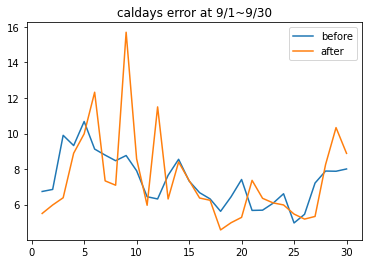

In [139]:
fig1 = plt.figure(1)
x=np.linspace(1,30,30)
plt.plot(x,before_error, label = 'before')
plt.plot(x,after_error, label ='after')
plt.legend(loc = 1)
plt.title('caldays error at 9/1~9/30')

plt.show()

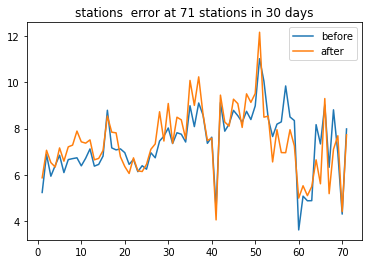

In [140]:
fig1 = plt.figure(1)
x=np.linspace(1,71,71)
plt.plot(x,before_sta, label = 'before')
plt.plot(x,after_sta, label ='after')
plt.legend(loc = 1)
plt.title('stations  error at 71 stations in 30 days')

plt.show()

# PCA(99.9)

## pca

In [141]:
pca999 = PCA(n_components=0.999)
pca999.fit(new_x)

PCA(n_components=0.999)

In [142]:
x_pca999=pca999.transform(new_x)
print(x_pca999.shape)
print(np.linalg.matrix_rank(x_pca999))

(22944, 3920)
3920


## beta

In [143]:
beta1_4=np.dot( np.linalg.inv( np.dot( x_pca999.T,x_pca999 ) )  ,  np.dot( x_pca999.T,new_y )  )
print(np.shape(beta1_4))

(3920, 6816)


## fit Y (base on training data)

In [144]:
new_Ybar=np.zeros([239*96,6816])
for i in range (0,239*96):
    new_Ybar[i]=Ybar
print(np.shape(new_Ybar))

(22944, 6816)


In [145]:
fit_y4=new_Ybar+np.dot(x_pca999  , beta1_4)
print(np.shape(fit_y4))

(22944, 6816)


In [146]:
fit999=np.zeros([239,6816])
for i in range (0,96):
    for j in range (0,239):
        for k in range (0,71):
            fit999[j][96*k+i]=fit_y4[239*i+j][96*k+i]
print(np.shape(fit999))

(239, 6816)


In [147]:
fit999_mean=np.zeros([239,6816])
for i in range (0,239):
    for j in range (0,6816):
        for k in range (0,96):
            fit999_mean[i][j]=fit999_mean[i][j]+fit_y4[239*k+i][j]/96
print(np.shape(fit999_mean))

(239, 6816)


## compare(training data)

In [148]:
k=0
s=0
# missing data number of data_cal
for i in range (0,243):
    a=np.array(data['cal_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            k=k+1

#missing data number of data_obs
for i in range (0,243):
    a=np.array(data['obs_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            s=s+1
print(k)
print(s)

7996
44464


In [149]:
fit999_test=fit999
fit999_mean_test=fit999_mean

In [150]:
old_x=np.zeros([239,6816])
old_y=np.zeros([239,6816])
#data_cal
for i in range (1,240):
    a=np.array(data['cal_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            a[j]=0
    old_x[i-1]=a
#data_obs
for i in range (1,240):
    a=np.array(data['obs_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            a[j]=0
    old_y[i-1]=a
#Delete missing data
for i in range(0,239):
    for j in range(6816):
        if old_x[i][j]==0:
            old_y[i][j]=0
            fit999_test[i][j]=0
            fit999_mean_test[i][j]=0
        if old_y[i][j]==0:
            old_x[i][j]=0
            fit999_test[i][j]=0
            fit999_mean_test[i][j]=0
print(np.shape(old_x))
print(np.shape(old_y))
print(np.shape(fit999_test))
print(np.shape(fit999_mean_test))

(239, 6816)
(239, 6816)
(239, 6816)
(239, 6816)


In [151]:
before_error=0
after_error1=0
after_error2=0
for i in range (0,239):
    for j in range(0,6816):
        before_error=before_error+abs(old_x[i][j]-old_y[i][j])
        after_error1=after_error1+abs(fit999_test[i][j]-old_y[i][j])
        after_error2=after_error2+abs(fit999_mean_test[i][j]-old_y[i][j])
before_error=before_error/239/6816
after_error1=after_error1/239/6816
after_error2=after_error2/239/6816
print("January to August (training data set) before_error: %f" %before_error)
print("January to August (training data set) after_error of 999: %f" %after_error1)
print("January to August (training data set) after_error of 999_mean: %f" %after_error2)

January to August (training data set) before_error: 7.960098
January to August (training data set) after_error of 999: 8.159633
January to August (training data set) after_error of 999_mean: 8.159439


## compare(testing data)

In [152]:
k=0
s=0
#missing data number data_cal
for i in range (244,274):
    a=np.array(data['cal_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            k=k+1

#missing data number data_obs
for i in range (244,274):
    a=np.array(data['obs_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            s=s+1
print(k)
print(s)

680
3124


In [153]:
old_x=np.zeros([274,6816])
old_y=np.zeros([274,6816])
bigx=np.zeros([273,8520])
#data_cal
for i in range (0,274):
    a=np.array(data['cal_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            a[j]=np.nan
    old_x[i]=a
#data_obs
for i in range (0,274):
    a=np.array(data['obs_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            a[j]=np.nan
    old_y[i]=a
#x=x1 mix x2
for i in range (0,273):
    for j in range(0,1704):
        bigx[i][j]=old_y[i][j]
for i in range (1,274):  
    for j in range(1704,8520):
        bigx[i-1][j]=old_y[i][j-1704]
print(np.shape(old_x))
print(np.shape(old_y))
print(np.shape(bigx))

(274, 6816)
(274, 6816)
(273, 8520)


In [154]:
x=np.zeros([30,8520])
for i in range (0,30):
    for j in range (0,1704):
        x[i][j]=old_y[i+243][j]
    for j in range (1704,8520):
        x[i][j]=old_x[i+244][j-1704]
print(np.shape(x))

(30, 8520)


In [155]:
xf=np.zeros([30,8520])
xa=bigx
a=273
for i in range (30):
    xa=np.insert(xa,a,x[i],0)
    xb=sinkr.dineof(xa)
    xc=xb[0]
    xf[i]=xc[a]
    a=a+1
print(np.shape(xf))

[1]
 "1 EOF ; RMS = 7.90385353"


[1]
 "1 EOF ; RMS = 7.86214238"


[1]
 "1 EOF ; RMS = 7.86085678"


[1]
 "1 EOF ; RMS = 7.86074311"


[1]
 "1 EOF ; RMS = 7.86072861"


[1]
 "1 EOF ; RMS = 7.86072651"


[1]
 "2 EOF ; RMS = 7.20182334"


[1]
 "2 EOF ; RMS = 7.1985016"


[1]
 "2 EOF ; RMS = 7.19836804"


[1]
 "2 EOF ; RMS = 7.19836052"


[1]
 "3 EOF ; RMS = 6.77531785"


[1]
 "3 EOF ; RMS = 6.77719107"


[1]
 "4 EOF ; RMS = 6.48223814"


[1]
 "4 EOF ; RMS = 6.48179785"


[1]
 "4 EOF ; RMS = 6.48193951"


[1]
 "5 EOF ; RMS = 6.32658363"


[1]
 "5 EOF ; RMS = 6.32602358"


[1]
 "5 EOF ; RMS = 6.32567921"


[1]
 "5 EOF ; RMS = 6.32544989"


[1]
 "5 EOF ; RMS = 6.32533642"


[1]
 "5 EOF ; RMS = 6.32528519"


[1]
 "5 EOF ; RMS = 6.32526283"


[1]
 "5 EOF ; RMS = 6.32525322"


[1]
 "6 EOF ; RMS = 6.17708526"


[1]
 "6 EOF ; RMS = 6.17823709"


[1]
 "7 EOF ; RMS = 6.04089301"


[1]
 "7 EOF ; RMS = 6.04208891"


[1]
 "8 EOF ; RMS = 5.95132898"


[1]
 "8 EOF ; RMS = 5.95093259"


[1]
 "8 EOF ; R

In [156]:
xcal=xf
for i in range (0,30):
    for j in range (0,8520):
        xcal[i][j]=xcal[i][j]-Xbar[j]
print(np.shape(xcal))

(30, 8520)


In [157]:
new_xcal=np.zeros([30,np.shape(x_pca999)[1]])
for i in range (0,30):
    daycal=np.zeros([1,8520])
    for j in range (0,8520):
        daycal[0][j]=xcal[i][j]
    new_xcal[i]=pca999.transform(daycal)
print(new_xcal.shape)

(30, 3920)


In [158]:
new_Ybar=np.zeros([30,6816])
for i in range (0,30):
    new_Ybar[i]=Ybar

In [159]:
new_xfit=new_Ybar+np.dot(new_xcal, beta1_4)
# new_xfit=np.dot(new_xcal, beta1_4)
print(np.shape(new_xfit))

(30, 6816)


In [160]:
old_x=np.zeros([30,6816])
old_y=np.zeros([30,6816])
#data_cal
for i in range (244,274):
    a=np.array(data['cal_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            a[j]=0
    old_x[i-244]=a
#data_obs
for i in range (244,274):
    a=np.array(data['obs_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            a[j]=0
    old_y[i-244]=a
#Delete missing data
for i in range(0,30):
    for j in range(6816):
        if old_x[i][j]==0:
            old_y[i][j]=0
            new_xfit[i][j]=0
        if old_y[i][j]==0:
            old_x[i][j]=0
            new_xfit[i][j]=0
print(np.shape(old_x))
print(np.shape(old_y))
print(np.shape(new_xfit))

(30, 6816)
(30, 6816)
(30, 6816)


In [161]:
before_error=np.zeros(30)
after_error=np.zeros(30)
before_sta=np.zeros(71)
after_sta=np.zeros(71)
for i in range (0,30):
    a=0
    b=0
    for j in range(0,6816):
        a=a+abs(old_x[i][j]-old_y[i][j])
        b=b+abs(new_xfit[i][j]-old_y[i][j])
    before_error[i]=a/6816
    after_error[i]=b/6816
print(before_error.shape)
print(after_error.shape)

for i in range (0,71):
    c=0
    d=0
    for j in range (0,30):
        for k in range (96*i,96*i+96):
            c=c+abs(old_x[j][k]-old_y[j][k])
            d=d+abs(new_xfit[j][k]-old_y[j][k])
    before_sta[i]=c/96/30
    after_sta[i]=d/96/30
print(before_sta.shape)
print(after_sta.shape)

(30,)
(30,)
(71,)
(71,)


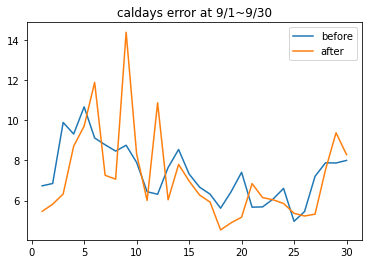

In [162]:
fig1 = plt.figure(1)
x=np.linspace(1,30,30)
plt.plot(x,before_error, label = 'before')
plt.plot(x,after_error, label ='after')
plt.legend(loc = 1)
plt.title('caldays error at 9/1~9/30')

plt.show()

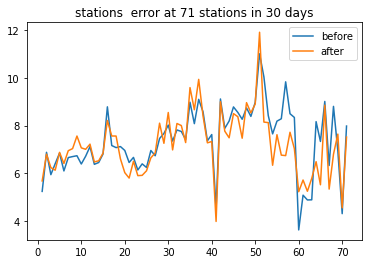

In [163]:
fig1 = plt.figure(1)
x=np.linspace(1,71,71)
plt.plot(x,before_sta, label = 'before')
plt.plot(x,after_sta, label ='after')
plt.legend(loc = 1)
plt.title('stations  error at 71 stations in 30 days')

plt.show()

# PCA(99.99)

## pca

In [17]:
pca9999 = PCA(n_components=0.9999)
pca9999.fit(new_x)

PCA(n_components=0.9999)

In [18]:
x_pca9999=pca9999.transform(new_x)
print(x_pca9999.shape)
print(np.linalg.matrix_rank(x_pca9999))

(22944, 6070)
6070


## beta

In [19]:
beta1_5=np.dot( np.linalg.inv( np.dot( x_pca9999.T,x_pca9999 ) )  ,  np.dot( x_pca9999.T,new_y )  )
print(np.shape(beta1_5))

(6070, 6816)


## fit Y (base on training data)

In [20]:
new_Ybar=np.zeros([239*96,6816])
for i in range (0,239*96):
    new_Ybar[i]=Ybar
print(np.shape(new_Ybar))

(22944, 6816)


In [21]:
fit_y5=new_Ybar+np.dot(x_pca9999  , beta1_5)
print(np.shape(fit_y5))

(22944, 6816)


In [22]:
fit9999=np.zeros([239,6816])
for i in range (0,96):
    for j in range (0,239):
        for k in range (0,71):
            fit9999[j][96*k+i]=fit_y5[239*i+j][96*k+i]
print(np.shape(fit9999))

(239, 6816)


In [23]:
fit9999_mean=np.zeros([239,6816])
for i in range (0,239):
    for j in range (0,6816):
        for k in range (0,96):
            fit9999_mean[i][j]=fit9999_mean[i][j]+fit_y5[239*k+i][j]/96
print(np.shape(fit9999_mean))

(239, 6816)


## compare(training data)

In [24]:
k=0
s=0
# missing data number of data_cal
for i in range (0,243):
    a=np.array(data['cal_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            k=k+1

#missing data number of data_obs
for i in range (0,243):
    a=np.array(data['obs_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            s=s+1
print(k)
print(s)

7996
44464


In [25]:
fit9999_test=fit9999
fit9999_mean_test=fit9999_mean

In [26]:
old_x=np.zeros([239,6816])
old_y=np.zeros([239,6816])
#data_cal
for i in range (1,240):
    a=np.array(data['cal_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            a[j]=0
    old_x[i-1]=a
#data_obs
for i in range (1,240):
    a=np.array(data['obs_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            a[j]=0
    old_y[i-1]=a
#Delete missing data
for i in range(0,239):
    for j in range(6816):
        if old_x[i][j]==0:
            old_y[i][j]=0
            fit9999_test[i][j]=0
            fit9999_mean_test[i][j]=0
        if old_y[i][j]==0:
            old_x[i][j]=0
            fit9999_test[i][j]=0
            fit9999_mean_test[i][j]=0
print(np.shape(old_x))
print(np.shape(old_y))
print(np.shape(fit9999_test))
print(np.shape(fit9999_mean_test))

(239, 6816)
(239, 6816)
(239, 6816)
(239, 6816)


In [27]:
before_error=0
after_error1=0
after_error2=0
for i in range (0,239):
    for j in range(0,6816):
        before_error=before_error+abs(old_x[i][j]-old_y[i][j])
        after_error1=after_error1+abs(fit9999_test[i][j]-old_y[i][j])
        after_error2=after_error2+abs(fit9999_mean_test[i][j]-old_y[i][j])
before_error=before_error/239/6816
after_error1=after_error1/239/6816
after_error2=after_error2/239/6816
print("January to August (training data set) before_error: %f" %before_error)
print("January to August (training data set) after_error of 9999: %f" %after_error1)
print("January to August (training data set) after_error of 9999_mean: %f" %after_error2)

January to August (training data set) before_error: 7.960098
January to August (training data set) after_error of 9999: 8.159892
January to August (training data set) after_error of 9999_mean: 8.159840


## compare(testing data)

In [28]:
k=0
s=0
#missing data number data_cal
for i in range (244,274):
    a=np.array(data['cal_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            k=k+1

#missing data number data_obs
for i in range (244,274):
    a=np.array(data['obs_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            s=s+1
print(k)
print(s)

680
3124


In [29]:
old_x=np.zeros([274,6816])
old_y=np.zeros([274,6816])
bigx=np.zeros([273,8520])
#data_cal
for i in range (0,274):
    a=np.array(data['cal_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            a[j]=np.nan
    old_x[i]=a
#data_obs
for i in range (0,274):
    a=np.array(data['obs_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            a[j]=np.nan
    old_y[i]=a
#x=x1 mix x2
for i in range (0,273):
    for j in range(0,1704):
        bigx[i][j]=old_y[i][j]
for i in range (1,274):  
    for j in range(1704,8520):
        bigx[i-1][j]=old_y[i][j-1704]
print(np.shape(old_x))
print(np.shape(old_y))
print(np.shape(bigx))

(274, 6816)
(274, 6816)
(273, 8520)


In [30]:
x=np.zeros([30,8520])
for i in range (0,30):
    for j in range (0,1704):
        x[i][j]=old_y[i+243][j]
    for j in range (1704,8520):
        x[i][j]=old_x[i+244][j-1704]
print(np.shape(x))

(30, 8520)


In [31]:
xf=np.zeros([30,8520])
xa=bigx
a=273
for i in range (30):
    xa=np.insert(xa,a,x[i],0)
    xb=sinkr.dineof(xa)
    xc=xb[0]
    xf[i]=xc[a]
    a=a+1
print(np.shape(xf))

[1]
 "1 EOF ; RMS = 7.77889861"


[1]
 "1 EOF ; RMS = 7.74935423"


[1]
 "1 EOF ; RMS = 7.74898164"


[1]
 "1 EOF ; RMS = 7.7489658"


[1]
 "1 EOF ; RMS = 7.74896409"


[1]
 "2 EOF ; RMS = 7.15513286"


[1]
 "2 EOF ; RMS = 7.15566411"


[1]
 "3 EOF ; RMS = 6.7304111"


[1]
 "3 EOF ; RMS = 6.73064259"


[1]
 "4 EOF ; RMS = 6.45662813"


[1]
 "4 EOF ; RMS = 6.4576225"


[1]
 "5 EOF ; RMS = 6.27505666"


[1]
 "5 EOF ; RMS = 6.27334915"


[1]
 "5 EOF ; RMS = 6.27338762"


[1]
 "6 EOF ; RMS = 6.1233569"


[1]
 "6 EOF ; RMS = 6.12397922"


[1]
 "7 EOF ; RMS = 5.98959613"


[1]
 "7 EOF ; RMS = 5.99044556"


[1]
 "8 EOF ; RMS = 5.87207429"


[1]
 "8 EOF ; RMS = 5.87046895"


[1]
 "8 EOF ; RMS = 5.87004503"


[1]
 "8 EOF ; RMS = 5.86983561"


[1]
 "8 EOF ; RMS = 5.86973478"


[1]
 "8 EOF ; RMS = 5.86968721"


[1]
 "8 EOF ; RMS = 5.86966495"


[1]
 "8 EOF ; RMS = 5.86965459"


[1]
 "8 EOF ; RMS = 5.86964977"


[1]
 "9 EOF ; RMS = 5.78573147"


[1]
 "9 EOF ; RMS = 5.788646"


[1]
 "10 EOF ; RMS =

In [32]:
xcal=xf
for i in range (0,30):
    for j in range (0,8520):
        xcal[i][j]=xcal[i][j]-Xbar[j]
print(np.shape(xcal))

(30, 8520)


In [33]:
new_xcal=np.zeros([30,np.shape(x_pca9999)[1]])
for i in range (0,30):
    daycal=np.zeros([1,8520])
    for j in range (0,8520):
        daycal[0][j]=xcal[i][j]
    new_xcal[i]=pca9999.transform(daycal)
print(new_xcal.shape)

(30, 6070)


In [34]:
new_Ybar=np.zeros([30,6816])
for i in range (0,30):
    new_Ybar[i]=Ybar

In [35]:
new_xfit=new_Ybar+np.dot(new_xcal, beta1_5)
# new_xfit=np.dot(new_xcal, beta1_5)
print(np.shape(new_xfit))

(30, 6816)


In [36]:
old_x=np.zeros([30,6816])
old_y=np.zeros([30,6816])
#data_cal
for i in range (244,274):
    a=np.array(data['cal_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            a[j]=0
    old_x[i-244]=a
#data_obs
for i in range (244,274):
    a=np.array(data['obs_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            a[j]=0
    old_y[i-244]=a
#Delete missing data
for i in range(0,30):
    for j in range(6816):
        if old_x[i][j]==0:
            old_y[i][j]=0
            new_xfit[i][j]=0
        if old_y[i][j]==0:
            old_x[i][j]=0
            new_xfit[i][j]=0
print(np.shape(old_x))
print(np.shape(old_y))
print(np.shape(new_xfit))

(30, 6816)
(30, 6816)
(30, 6816)


In [37]:
before_error=np.zeros(30)
after_error=np.zeros(30)
before_sta=np.zeros(71)
after_sta=np.zeros(71)
for i in range (0,30):
    a=0
    b=0
    for j in range(0,6816):
        a=a+abs(old_x[i][j]-old_y[i][j])
        b=b+abs(new_xfit[i][j]-old_y[i][j])
    before_error[i]=a/6816
    after_error[i]=b/6816
print(before_error.shape)
print(after_error.shape)

for i in range (0,71):
    c=0
    d=0
    for j in range (0,30):
        for k in range (96*i,96*i+96):
            c=c+abs(old_x[j][k]-old_y[j][k])
            d=d+abs(new_xfit[j][k]-old_y[j][k])
    before_sta[i]=c/96/30
    after_sta[i]=d/96/30
print(before_sta.shape)
print(after_sta.shape)

(30,)
(30,)
(71,)
(71,)


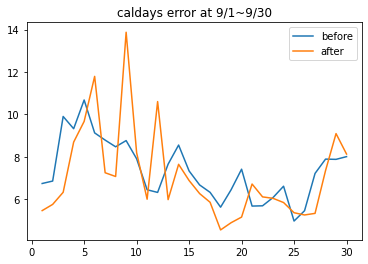

In [38]:
fig1 = plt.figure(1)
x=np.linspace(1,30,30)
plt.plot(x,before_error, label = 'before')
plt.plot(x,after_error, label ='after')
plt.legend(loc = 1)
plt.title('caldays error at 9/1~9/30')

plt.show()

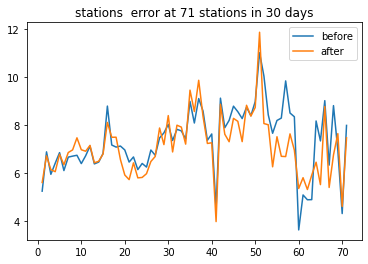

In [39]:
fig1 = plt.figure(1)
x=np.linspace(1,71,71)
plt.plot(x,before_sta, label = 'before')
plt.plot(x,after_sta, label ='after')
plt.legend(loc = 1)
plt.title('stations  error at 71 stations in 30 days')

plt.show()

# Pytorch

## Pytorch ex

In [26]:
a = np.zeros([3,4])
for i in range (3):
    for j in range (4):
        a[i][j] = 4*i + j +1
print(a)
type(a)

[[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]]


numpy.ndarray

In [27]:
print(np.mean(a))
print(np.std(a))

6.5
3.452052529534663


In [28]:
b = (a-np.mean(a) ) / np.std(a)
print(b)

[[-1.59325501 -1.30357228 -1.01388955 -0.72420682]
 [-0.43452409 -0.14484136  0.14484136  0.43452409]
 [ 0.72420682  1.01388955  1.30357228  1.59325501]]


In [29]:
a = torch.zeros([3,4])
for i in range (3):
    for j in range (4):
        a[i][j] = 4*i + j +1
print(a)
type(a)

tensor([[ 1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.]])


torch.Tensor

In [32]:
print(torch.mean(a))
print(torch.std(a,unbiased=False))

tensor(6.5000)
tensor(3.4521)


In [15]:
n = 1000
x = np.random.uniform( 0 , 1 , (n , 1) )
y = 1 + 2*x + np.random.normal( 0 , 1 , (n , 1) )

In [16]:
def model (x,w,b):
    return x*w + b

def loss (y_true,y_pred):
    r = y_true - y_pred
    return torch.mean(r*r)

In [17]:
features = torch.from_numpy(x)
targets = torch.from_numpy(y)
w = torch.randn(1 , requires_grad = True)
b = torch.randn(1 , requires_grad = True)
rate = 1e-1

for epochs in range (1000):
    preds = model(features , w , b)
    obj = loss(targets , preds)
    obj.backward()
    with torch.no_grad():
        # w = w - (w.grad*rate)
        # b = b - (b.grad*rate)
        w -= w.grad*rate
        b -= b.grad*rate
        w.grad.zero_()
        b.grad.zero_()

In [14]:
print([b.item(),w.item()])

[1.0069084167480469, 1.9589710235595703]


## DINEOF

In [20]:
###
#cal_PMf  
###
u=np.zeros([244,6816])
for i in range (0,244):
    a=np.array(data['cal_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            a[j]=np.nan
    u[i]=a.T
###
#obs_PMf
###
v=np.zeros([244,6816])
for i in range (0,244):
    a=np.array(data['obs_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            a[j]=np.nan
    v[i]=a.T

print(np.shape(u))
print(np.shape(v))

(244, 6816)
(244, 6816)


In [22]:
XRestruct=sinkr.dineof(u)
YRestruct=sinkr.dineof(v)

[1]
 "1 EOF ; RMS = 10.38387981"


[1]
 "1 EOF ; RMS = 10.38022423"


[1]
 "1 EOF ; RMS = 10.38074126"


[1]
 "2 EOF ; RMS = 9.50321943"


[1]
 "2 EOF ; RMS = 9.50324731"


[1]
 "3 EOF ; RMS = 9.20032801"


[1]
 "3 EOF ; RMS = 9.20304313"


[1]
 "4 EOF ; RMS = 8.9482627"


[1]
 "4 EOF ; RMS = 8.95260032"


[1]
 "5 EOF ; RMS = 8.74489391"


[1]
 "5 EOF ; RMS = 8.74872573"


[1]
 "6 EOF ; RMS = 8.60241631"


[1]
 "6 EOF ; RMS = 8.60893978"


[1]
 "7 EOF ; RMS = 8.55151365"


[1]
 "7 EOF ; RMS = 8.57093647"


[1]
 "8 EOF ; RMS = 8.54463071"


[1]
 "8 EOF ; RMS = 8.57558306"


[1]
 "9 EOF ; RMS = 8.49787958"


[1]
 "9 EOF ; RMS = 8.51052976"


[1]
 "10 EOF ; RMS = 8.47593838"


[1]
 "10 EOF ; RMS = 8.4912718"


[1]
 "11 EOF ; RMS = 8.48092995"


[1]
 "11 EOF ; RMS = 8.51082054"


[1]
 "12 EOF ; RMS = 8.48173139"


[1]
 "12 EOF ; RMS = 8.50583252"


[1]
 "13 EOF ; RMS = 8.47737434"


[1]
 "13 EOF ; RMS = 8.49259168"


[1]
 "14 EOF ; RMS = 8.4262977"


[1]
 "14 EOF ; RMS = 8.43890675"


[1]


In [23]:
XRestruct_Fun=np.array(XRestruct[0])
YRestruct_Fun=np.array(YRestruct[0])
XCov_fun=np.cov(XRestruct_Fun.T)
XMean_fun=np.zeros(6816)
YMean_fun=np.zeros(6816)
for i in range(0,6816):
    for j in range(0,244):
        XMean_fun[i]=XMean_fun[i]+(XRestruct_Fun[j][i]/244)
        YMean_fun[i]=YMean_fun[i]+(YRestruct_Fun[j][i]/244)
print(type(XRestruct_Fun))
print(type(YRestruct_Fun))
print(np.shape(XRestruct_Fun))
print(np.shape(YRestruct_Fun))
print(np.shape(XCov_fun))
print(np.shape(XMean_fun))
print(np.shape(YMean_fun))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(244, 6816)
(244, 6816)
(6816, 6816)
(6816,)
(6816,)


In [24]:
Xhat=XRestruct_Fun
Yhat=YRestruct_Fun
Xbar=XMean_fun
Ybar=YMean_fun
print('Xhat')
#print(Xhat)
print(np.shape(Xhat))
print('Yhat')
#print(Yhat)
print(np.shape(Yhat))
print('Xbar')
#print(Xbar)
print(np.shape(Xbar))
print('Ybar')
#print(Ybar)
print(np.shape(Ybar))

Xhat
(244, 6816)
Yhat
(244, 6816)
Xbar
(6816,)
Ybar
(6816,)


In [99]:
G_xx=XCov_fun
G_xxt=np.zeros(6816)
for i in range(0,6816):
     G_xxt[i]=G_xx[i][i]
print(G_xxt)
print(np.shape(G_xxt))

G_xy=0
for i in range (0,244):
    G_xyi=(Xhat[i]-Xbar)*(Yhat[i]-Ybar)
    G_xy=G_xy+G_xyi
G_xy=G_xy/243
print(G_xy)
print(np.shape(G_xy))

[ 68.15802914  63.24933945 116.31025274 ...  98.99547747 118.30559943
 139.82751368]
(6816,)
[40.61920539 41.50262119 47.98336378 ... 42.23350712 51.81619293
 68.41148963]
(6816,)


In [100]:
B_1=G_xy/G_xxt
B_0=YMean_fun-(B_1*XMean_fun)
B_1const=0
for i in range (0,6816):
    B_1const=B_1const+B_1[i]
B_1const=B_1const/6816

print('B_1')
#print(B_1)
print(np.shape(B_1))
print('B_0')
#print(B_0)
print(np.shape(B_0))
print('B_1const')
#print(B_1const)
print(np.shape(B_1const))

Beta0_DINEOF = B_1
Beta1_DINEOF = B_0

B_1
(6816,)
B_0
(6816,)
B_1const
()


In [101]:
before_fx=np.zeros([274,6816])
for i in range (0,274):
    a=np.array(data['cal_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            a[j]=np.nan
    before_fx[i]=a
print(np.shape(before_fx))

(274, 6816)


In [102]:
after_fx_r=sinkr.dineof(before_fx)
after_fx=np.array(after_fx_r[0])
print(np.shape(after_fx))

[1]
 "1 EOF ; RMS = 10.19680921"


[1]
 "1 EOF ; RMS = 10.18535861"


[1]
 "1 EOF ; RMS = 10.18561291"


[1]
 "2 EOF ; RMS = 9.45782403"


[1]
 "2 EOF ; RMS = 9.45957018"


[1]
 "3 EOF ; RMS = 9.1746229"


[1]
 "3 EOF ; RMS = 9.17840274"


[1]
 "4 EOF ; RMS = 8.89997419"


[1]
 "4 EOF ; RMS = 8.89954025"


[1]
 "4 EOF ; RMS = 8.89973201"


[1]
 "5 EOF ; RMS = 8.72850504"


[1]
 "5 EOF ; RMS = 8.7388073"


[1]
 "6 EOF ; RMS = 8.597189"


[1]
 "6 EOF ; RMS = 8.6015346"


[1]
 "7 EOF ; RMS = 8.47027787"


[1]
 "7 EOF ; RMS = 8.47429194"


[1]
 "8 EOF ; RMS = 8.42878604"


[1]
 "8 EOF ; RMS = 8.45187807"


[1]
 "9 EOF ; RMS = 8.37277062"


[1]
 "9 EOF ; RMS = 8.38848632"


[1]
 "10 EOF ; RMS = 8.34309386"


[1]
 "10 EOF ; RMS = 8.35716044"


[1]
 "11 EOF ; RMS = 8.30557631"


[1]
 "11 EOF ; RMS = 8.31437653"


[1]
 "12 EOF ; RMS = 8.26264651"


[1]
 "12 EOF ; RMS = 8.27727579"


[1]
 "13 EOF ; RMS = 8.24609411"


[1]
 "13 EOF ; RMS = 8.26494266"


[1]
 "14 EOF ; RMS = 8.23172598"


[1]
 "1

In [103]:
fit_fx=B_0+(B_1*after_fx)
print(np.shape(fit_fx))
fit_fxC=B_0+(B_1const*after_fx)
print(np.shape(fit_fxC))

(274, 6816)
(274, 6816)


In [104]:
old_x=np.zeros([274,6816])
old_y=np.zeros([274,6816])
#data_cal
for i in range (0,274):
    a=np.array(data['cal_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            a[j]=0
    old_x[i]=a
#data_obs
for i in range (0,274):
    a=np.array(data['obs_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            a[j]=0
    old_y[i]=a
#Delete missing data
for i in range(0,274):
    for j in range(6816):
        if old_x[i][j]==0:
            old_y[i][j]=0
            fit_fx[i][j]=0
            fit_fxC[i][j]=0
        if old_y[i][j]==0:
            old_x[i][j]=0
            fit_fx[i][j]=0
            fit_fxC[i][j]=0
print(np.shape(old_x))
print(np.shape(old_y))
print(np.shape(fit_fx))
print(np.shape(fit_fxC))

(274, 6816)
(274, 6816)
(274, 6816)
(274, 6816)


In [105]:
before_error1=0
after_error1=0
after_errorC1=0
for i in range (0,244):
    for j in range(0,6816):
        before_error1=before_error1+abs(old_x[i][j]-old_y[i][j])
        after_error1=after_error1+abs(fit_fx[i][j]-old_y[i][j])
        after_errorC1=after_errorC1+abs(fit_fxC[i][j]-old_y[i][j])
before_error1=before_error1/244/6816
after_error1=after_error1/244/6816
after_errorC1=after_errorC1/244/6816
print("January to August (training data set) before_error (MADE) : %f" %before_error1)
print("January to August (training data set) after_error (MADE) : %f" %after_error1)
print("January to August (training data set with const B_1) after_error  (MADE) : %f" %after_errorC1)

January to August (training data set) before_error (MADE) : 7.961740
January to August (training data set) after_error (MADE) : 6.546867
January to August (training data set with const B_1) after_error  (MADE) : 6.899770


In [106]:
before_error1=0
after_error1=0
after_errorC1=0
for i in range (0,244):
    for j in range(0,6816):
        before_error1=before_error1+(old_x[i][j]-old_y[i][j])**2
        after_error1=after_error1+(fit_fx[i][j]-old_y[i][j])*(fit_fx[i][j]-old_y[i][j])
        after_errorC1=after_errorC1+(fit_fxC[i][j]-old_y[i][j])*(fit_fxC[i][j]-old_y[i][j])
before_error1=before_error1/244/6816
after_error1=after_error1/244/6816
after_errorC1=after_errorC1/244/6816
print("January to August (training data set) before_error (MSE) : %f" %before_error1)
print("January to August (training data set) after_error (MSE) : %f" %after_error1)
print("January to August (training data set with const B_1) after_error (MSE) : %f" %after_errorC1)

January to August (training data set) before_error (MSE) : 156.744802
January to August (training data set) after_error (MSE) : 81.016091
January to August (training data set with const B_1) after_error (MSE) : 91.500438


In [107]:
before_error2=0
after_error2=0
after_errorC2=0
for i in range (244,274):
    for j in range(0,6816):
        before_error2=before_error2+abs(old_x[i][j]-old_y[i][j])
        after_error2=after_error2+abs(fit_fx[i][j]-old_y[i][j])
        after_errorC2=after_errorC2+abs(fit_fxC[i][j]-old_y[i][j])
before_error2=before_error2/30/6816
after_error2=after_error2/30/6816
after_errorC2=after_errorC2/30/6816
print("September (testing data set) before_error (MADE) : %f" %before_error2)
print("September (testing data set) after_error (MADE) : %f" %after_error2)
print("September (testing data set with const B_1) after_error (MADE) : %f" %after_errorC2)

September (testing data set) before_error (MADE) : 7.356276
September (testing data set) after_error (MADE) : 5.728337
September (testing data set with const B_1) after_error (MADE) : 5.925819


In [108]:
before_error2=0
after_error2=0
after_errorC2=0
for i in range (244,274):
    for j in range(0,6816):
        before_error2=before_error2+(old_x[i][j]-old_y[i][j])**2
        after_error2=after_error2+(fit_fx[i][j]-old_y[i][j])**2
        after_errorC2=after_errorC2+(fit_fxC[i][j]-old_y[i][j])**2
before_error2=before_error2/30/6816
after_error2=after_error2/30/6816
after_errorC2=after_errorC2/30/6816
print("September (testing data set) before_error (MSE) : %f" %before_error2)
print("September (testing data set) after_error (MSE) : %f" %after_error2)
print("September (testing data set with const B_1) after_error (MSE) : %f" %after_errorC2)

September (testing data set) before_error (MSE) : 99.987050
September (testing data set) after_error (MSE) : 58.785787
September (testing data set with const B_1) after_error (MSE) : 62.379395


## 96hr beta0 beta1

In [ ]:
Beta0_DINEOF = B_1
Beta1_DINEOF = B_0

### x y std

In [196]:
###
#cal_PMf  
###
u=np.zeros([274,6816])
for i in range (0,274):
    a=np.array(data['cal_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            a[j]=np.nan
    u[i]=a.T
###
#obs_PMf
###
v=np.zeros([274,6816])
for i in range (0,274):
    a=np.array(data['obs_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            a[j]=np.nan
    v[i]=a.T

print(np.shape(u))
print(np.shape(v))

(274, 6816)
(274, 6816)


In [197]:
XRestruct=sinkr.dineof(u)
YRestruct=sinkr.dineof(v)

[1]
 "1 EOF ; RMS = 10.19641863"


[1]
 "1 EOF ; RMS = 10.18329283"


[1]
 "1 EOF ; RMS = 10.18266763"


[1]
 "1 EOF ; RMS = 10.18256544"


[1]
 "1 EOF ; RMS = 10.18254434"


[1]
 "1 EOF ; RMS = 10.18253899"


[1]
 "2 EOF ; RMS = 9.43457002"


[1]
 "2 EOF ; RMS = 9.43752162"


[1]
 "3 EOF ; RMS = 9.18589688"


[1]
 "3 EOF ; RMS = 9.19109758"


[1]
 "4 EOF ; RMS = 8.93235181"


[1]
 "4 EOF ; RMS = 8.93482742"


[1]
 "5 EOF ; RMS = 8.77465217"


[1]
 "5 EOF ; RMS = 8.78532593"


[1]
 "6 EOF ; RMS = 8.642147"


[1]
 "6 EOF ; RMS = 8.64802748"


[1]
 "7 EOF ; RMS = 8.59622055"


[1]
 "7 EOF ; RMS = 8.61159766"


[1]
 "8 EOF ; RMS = 8.52464793"


[1]
 "8 EOF ; RMS = 8.52479715"


[1]
 "9 EOF ; RMS = 8.47840209"


[1]
 "9 EOF ; RMS = 8.4920927"


[1]
 "10 EOF ; RMS = 8.44813318"


[1]
 "10 EOF ; RMS = 8.46154301"


[1]
 "11 EOF ; RMS = 8.40675117"


[1]
 "11 EOF ; RMS = 8.42662666"


[1]
 "12 EOF ; RMS = 8.41476731"


[1]
 "12 EOF ; RMS = 8.43886544"


[1]
 "13 EOF ; RMS = 8.39065154"


[1]


In [198]:
XRestruct_Fun=np.array(XRestruct[0])
YRestruct_Fun=np.array(YRestruct[0])
print(type(XRestruct_Fun))
print(type(YRestruct_Fun))
print(np.shape(XRestruct_Fun))
print(np.shape(YRestruct_Fun))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(274, 6816)
(274, 6816)


In [155]:
Xhat=XRestruct_Fun
Yhat=YRestruct_Fun
Xhat_train = np.zeros([244,6816])
Yhat_train = np.zeros([244,6816])
Xhat_test = np.zeros([30,6816])
Yhat_test = np.zeros([30,6816])
for i in range (0,244):
    for j in range (0,6816):
        Xhat_train[i][j] = Xhat[i][j]
        Yhat_train[i][j] = Yhat[i][j]
for i in range (244,274):
    for j in range (0,6816):
        Xhat_test[i-244][j] = Xhat[i][j]
        Yhat_test[i-244][j] = Yhat[i][j]
print('Xhat_train')
#print(Xhat_train)
print(np.shape(Xhat_train))
print('Yhat_train')
#print(Yhat_train)
print(np.shape(Yhat_train))
print('Xhat_test')
#print(Xhat_test)
print(np.shape(Xhat_test))
print('Yhat_test')
#print(Yhat_test)
print(np.shape(Yhat_test))

Xhat_train
(244, 6816)
Yhat_train
(244, 6816)
Xhat_test
(30, 6816)
Yhat_test
(30, 6816)


In [199]:
Xhat_test = np.zeros([30,6816])
Yhat_test = np.zeros([30,6816])
for i in range (244,274):
    for j in range (0,6816):
        Xhat_test[i-244][j] = Xhat[i][j]
        Yhat_test[i-244][j] = Yhat[i][j]

xmean = np.mean(XRestruct_Fun)
xstd = np.std(XRestruct_Fun)
ymean = np.mean(YRestruct_Fun)
ystd = np.std(YRestruct_Fun)
Xhat = (XRestruct_Fun-xmean)/xstd
Yhat = (YRestruct_Fun-ymean)/ystd

Xhat_train = np.zeros([244,6816])
Yhat_train = np.zeros([244,6816])
for i in range (0,244):
    for j in range (0,6816):
        Xhat_train[i][j] = Xhat[i][j]
        Yhat_train[i][j] = Yhat[i][j]

In [203]:
x = Xhat_train
y = Yhat_train
xt = Xhat_test
yt = Yhat_test

In [204]:
def model (x,b0,b1):
    # y = b0 +  torch.matmul(x,b1)
    y = b0 + b1*x
    return y

In [205]:
features = torch.from_numpy(x)
targets = torch.from_numpy(y)
x_test = torch.from_numpy(xt)
y_test = torch.from_numpy(yt)

# beta0 = torch.randn(6816 , requires_grad = True)
# # beta1 = torch.randn([6816 , 6816], requires_grad = True)
# beta1 = torch.randn( 6816, requires_grad = True)

beta0 = torch.ones(6816 , requires_grad = True)
# beta1 = torch.randn([6816 , 6816], requires_grad = True)
beta1 = torch.ones( 6816, requires_grad = True)

rate = 1e-2
# optimizer = optim.LBFGS([beta0 , beta1] , lr = rate)
optimizer = optim.Adam([beta0 , beta1], lr=rate)
# optimizer = optim.SGD([beta0 , beta1], lr=rate)

epo = 501
loss = nn.MSELoss()
train_error = np.zeros(epo)
test_error = np.zeros(epo)


for epoch in range (epo):
    yhats_train = model(features.float() , beta0 , beta1)
    train_loss = loss(targets.float() , yhats_train)
    train_error[epoch] = train_loss

    optimizer.zero_grad()
    train_loss.backward() 
    optimizer.step()    

    yhats_test = model(x_test.float(), beta0, beta1) 
    for i in range (30):
        for j in range (6816):
            if y_test[i][j] == 0:
                yhats_test[i][j] = 0
    r = yhats_test - y_test
    test_loss = torch.mean(r*r)
    # test_loss = loss(y_test , yhats_test)
    test_error[epoch] = test_loss

    if epoch <= 10 or epoch % 10 == 0:
        print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
                    f" Testing loss {test_loss.item():.4f}")
        # print('\tBeta_0 : ' , beta0)
        # print('\tBeta_1 : ' , beta1)
    else :
        if epoch >= epo-10 :
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
                        f" Testing loss {test_loss.item():.4f}")
            # print('\tBeta_0 : ' , beta0)
            # print('\tBeta_1 : ' , beta1)

Epoch 0, Training loss 2.0461, Testing loss 99.2072
Epoch 1, Training loss 2.0139, Testing loss 98.2524
Epoch 2, Training loss 1.9823, Testing loss 97.3572
Epoch 3, Training loss 1.9511, Testing loss 96.5210
Epoch 4, Training loss 1.9204, Testing loss 95.7430
Epoch 5, Training loss 1.8903, Testing loss 95.0227
Epoch 6, Training loss 1.8606, Testing loss 94.3593
Epoch 7, Training loss 1.8315, Testing loss 93.7522
Epoch 8, Training loss 1.8029, Testing loss 93.2006
Epoch 9, Training loss 1.7748, Testing loss 92.7034
Epoch 10, Training loss 1.7473, Testing loss 92.2595
Epoch 20, Training loss 1.5008, Testing loss 90.4685
Epoch 30, Training loss 1.3050, Testing loss 92.4416
Epoch 40, Training loss 1.1536, Testing loss 96.6115
Epoch 50, Training loss 1.0387, Testing loss 101.6521
Epoch 60, Training loss 0.9522, Testing loss 106.6523
Epoch 70, Training loss 0.8874, Testing loss 111.1065
Epoch 80, Training loss 0.8388, Testing loss 114.8155
Epoch 90, Training loss 0.8023, Testing loss 117.767

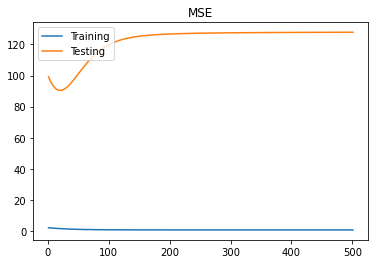

In [206]:
fig1 = plt.figure(1)
x=np.linspace(1,epo,epo)
plt.plot(x,train_error, label = 'Training')
plt.plot(x,test_error, label ='Testing')
plt.legend(loc = 2)
plt.title('MSE')

plt.show()

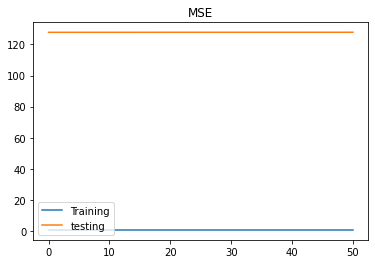

In [207]:
error1=np.zeros(50)
error2=np.zeros(50)
for i in range (0,50):
    error1[i]=train_error[epo-51+i]
    error2[i]=test_error[epo-51+i]

fig1 = plt.figure(1)
x = np.linspace(0 , 50 , 50)
plt.plot(x , error1 , label = 'Training')
plt.plot(x , error2 , label = 'testing')
plt.legend(loc = 3)
plt.title('MSE')

plt.show()

In [209]:
n_beta0 = beta0.detach().numpy()
n_beta1 = beta1.detach().numpy()
# n_beta1 = torch.mean(beta1 , 0 , True )
# n_beta1 = n_beta1.detach().numpy().reshape(6816)

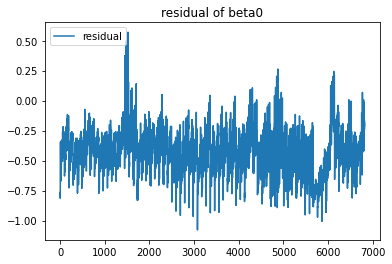

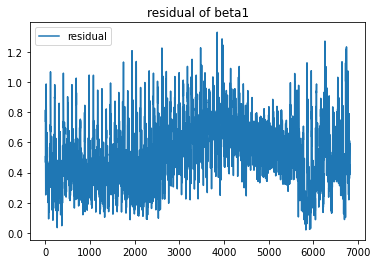

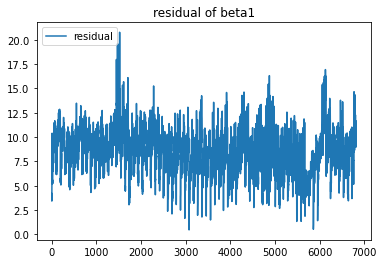

In [214]:
fig1 = plt.figure(1)
x=np.linspace(0,6816,6816)
plt.plot(x, n_beta0 - Beta0_DINEOF , label = 'residual')
plt.legend(loc = 2)
plt.title('residual of beta0')

fig2 = plt.figure(2)
x=np.linspace(0,6816,6816)
plt.plot(x, n_beta1  , label = 'residual')
plt.legend(loc = 2)
plt.title('residual of beta1')

fig2 = plt.figure(3)
x=np.linspace(0,6816,6816)
plt.plot(x, Beta1_DINEOF  , label = 'residual')
plt.legend(loc = 2)
plt.title('residual of beta1')


plt.show()

### x std

In [215]:
###
#cal_PMf  
###
u=np.zeros([274,6816])
for i in range (0,274):
    a=np.array(data['cal_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            a[j]=np.nan
    u[i]=a.T
###
#obs_PMf
###
v=np.zeros([274,6816])
for i in range (0,274):
    a=np.array(data['obs_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            a[j]=np.nan
    v[i]=a.T

print(np.shape(u))
print(np.shape(v))

(274, 6816)
(274, 6816)


In [216]:
XRestruct=sinkr.dineof(u)
YRestruct=sinkr.dineof(v)

[1]
 "1 EOF ; RMS = 10.01826415"


[1]
 "1 EOF ; RMS = 10.01301852"


[1]
 "1 EOF ; RMS = 10.01293649"


[1]
 "1 EOF ; RMS = 10.01299741"


[1]
 "2 EOF ; RMS = 9.21047767"


[1]
 "2 EOF ; RMS = 9.21148153"


[1]
 "3 EOF ; RMS = 8.93944217"


[1]
 "3 EOF ; RMS = 8.94194241"


[1]
 "4 EOF ; RMS = 8.74401946"


[1]
 "4 EOF ; RMS = 8.75037945"


[1]
 "5 EOF ; RMS = 8.58921187"


[1]
 "5 EOF ; RMS = 8.6055608"


[1]
 "6 EOF ; RMS = 8.52277191"


[1]
 "6 EOF ; RMS = 8.53659175"


[1]
 "7 EOF ; RMS = 8.46111767"


[1]
 "7 EOF ; RMS = 8.47133766"


[1]
 "8 EOF ; RMS = 8.39137447"


[1]
 "8 EOF ; RMS = 8.40424292"


[1]
 "9 EOF ; RMS = 8.34504097"


[1]
 "9 EOF ; RMS = 8.35812497"


[1]
 "10 EOF ; RMS = 8.34417943"


[1]
 "10 EOF ; RMS = 8.36814182"


[1]
 "11 EOF ; RMS = 8.32811327"


[1]
 "11 EOF ; RMS = 8.34766535"


[1]
 "12 EOF ; RMS = 8.34609191"


[1]
 "12 EOF ; RMS = 8.37170767"


[1]
 "13 EOF ; RMS = 8.33444283"


[1]
 "13 EOF ; RMS = 8.35542099"


[1]
 "14 EOF ; RMS = 8.33909483"


[1

In [217]:
XRestruct_Fun=np.array(XRestruct[0])
YRestruct_Fun=np.array(YRestruct[0])
print(type(XRestruct_Fun))
print(type(YRestruct_Fun))
print(np.shape(XRestruct_Fun))
print(np.shape(YRestruct_Fun))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(274, 6816)
(274, 6816)


In [218]:
Xhat=XRestruct_Fun
Yhat=YRestruct_Fun
Xhat_train = np.zeros([244,6816])
Yhat_train = np.zeros([244,6816])
Xhat_test = np.zeros([30,6816])
Yhat_test = np.zeros([30,6816])
for i in range (0,244):
    for j in range (0,6816):
        Xhat_train[i][j] = Xhat[i][j]
        Yhat_train[i][j] = Yhat[i][j]
for i in range (244,274):
    for j in range (0,6816):
        Xhat_test[i-244][j] = Xhat[i][j]
        Yhat_test[i-244][j] = Yhat[i][j]
print('Xhat_train')
#print(Xhat_train)
print(np.shape(Xhat_train))
print('Yhat_train')
#print(Yhat_train)
print(np.shape(Yhat_train))
print('Xhat_test')
#print(Xhat_test)
print(np.shape(Xhat_test))
print('Yhat_test')
#print(Yhat_test)
print(np.shape(Yhat_test))

Xhat_train
(244, 6816)
Yhat_train
(244, 6816)
Xhat_test
(30, 6816)
Yhat_test
(30, 6816)


In [219]:
xmean = np.mean(XRestruct_Fun)
xstd = np.std(XRestruct_Fun)
Xhat = (XRestruct_Fun-xmean)/xstd
Yhat=YRestruct_Fun

Xhat_train = np.zeros([244,6816])
Yhat_train = np.zeros([244,6816])
Xhat_test = np.zeros([30,6816])
Yhat_test = np.zeros([30,6816])
for i in range (0,244):
    for j in range (0,6816):
        Xhat_train[i][j] = Xhat[i][j]
        Yhat_train[i][j] = Yhat[i][j]
for i in range (244,274):
    for j in range (0,6816):
        Xhat_test[i-244][j] = Xhat[i][j]
        Yhat_test[i-244][j] = Yhat[i][j]

In [220]:
x = Xhat_train
y = Yhat_train
xt = Xhat_test
yt = Yhat_test

In [221]:
def model (x,b0,b1):
    # y = b0 +  torch.matmul(x,b1)
    # y = torch.add(b0 +  torch.matmul(x,b1))
    # y = b0 +  torch.mm(x,b1)
    y = b0 + b1*x
    return y

In [222]:
features = torch.from_numpy(x)
targets = torch.from_numpy(y)
x_test = torch.from_numpy(xt)
y_test = torch.from_numpy(yt)

beta0 = torch.ones(6816 , requires_grad = True)
beta1 = torch.ones(6816, requires_grad = True)

rate = 1e-2
# optimizer = optim.LBFGS([beta0 , beta1] , lr = rate)
optimizer = optim.Adam([beta0 , beta1], lr=rate)
# optimizer = optim.SGD([beta0 , beta1], lr=rate)

epo = 501
loss = nn.MSELoss()
train_error = np.zeros(epo)
test_error = np.zeros(epo)


for epoch in range (epo):
    yhats_train = model(features.float() , beta0 , beta1)
    train_loss = loss(targets.float() , yhats_train)
    train_error[epoch] = train_loss

    optimizer.zero_grad()
    train_loss.backward() 
    optimizer.step()    

    yhats_test = model(x_test.float(), beta0, beta1) 
    for i in range (30):
        for j in range (6816):
            if y_test[i][j] == 0:
                yhats_test[i][j] = 0
    r = yhats_test - y_test
    test_loss = torch.mean(r*r)
    # test_loss = loss(y_test , yhats_test)
    test_error[epoch] = test_loss

    if epoch <= 10 or epoch % 10 == 0:
        print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
                    f" Testing loss {test_loss.item():.4f}")
        # print('\tBeta_0 : ' , beta0)
        # print('\tBeta_1 : ' , beta1)
    else :
        if epoch >= epo-10 :
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
                        f" Testing loss {test_loss.item():.4f}")
            # print('\tBeta_0 : ' , beta0)
            # print('\tBeta_1 : ' , beta1)

Epoch 0, Training loss 309.0267, Testing loss 273.8277
Epoch 1, Training loss 308.6190, Testing loss 273.4787
Epoch 2, Training loss 308.2119, Testing loss 273.1301
Epoch 3, Training loss 307.8053, Testing loss 272.7818
Epoch 4, Training loss 307.3993, Testing loss 272.4340
Epoch 5, Training loss 306.9935, Testing loss 272.0866
Epoch 6, Training loss 306.5887, Testing loss 271.7396
Epoch 7, Training loss 306.1840, Testing loss 271.3931
Epoch 8, Training loss 305.7800, Testing loss 271.0470
Epoch 9, Training loss 305.3765, Testing loss 270.7014
Epoch 10, Training loss 304.9739, Testing loss 270.3563
Epoch 20, Training loss 300.9784, Testing loss 266.9305
Epoch 30, Training loss 297.0460, Testing loss 263.5537
Epoch 40, Training loss 293.1798, Testing loss 260.2282
Epoch 50, Training loss 289.3808, Testing loss 256.9550
Epoch 60, Training loss 285.6494, Testing loss 253.7339
Epoch 70, Training loss 281.9847, Testing loss 250.5645
Epoch 80, Training loss 278.3858, Testing loss 247.4457
Ep

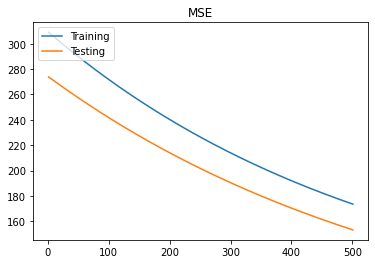

In [223]:
fig1 = plt.figure(1)
x=np.linspace(1,epo,epo)
plt.plot(x,train_error, label = 'Training')
plt.plot(x,test_error, label ='Testing')
plt.legend(loc = 2)
plt.title('MSE')

plt.show()

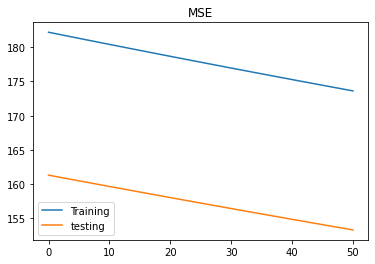

In [224]:
error1=np.zeros(50)
error2=np.zeros(50)
for i in range (0,50):
    error1[i]=train_error[epo-51+i]
    error2[i]=test_error[epo-51+i]

fig1 = plt.figure(1)
x = np.linspace(0 , 50 , 50)
plt.plot(x , error1 , label = 'Training')
plt.plot(x , error2 , label = 'testing')
plt.legend(loc = 3)
plt.title('MSE')

plt.show()

In [225]:
n_beta0 = beta0.detach().numpy()

n_beta1 = beta1.detach().numpy()
# n_beta1 = np.mean(n_beta1 , axis =0)

# n_beta1 = torch.mean(beta1 , 0 , True )
# n_beta1 = n_beta1.detach().numpy().reshape(6816)

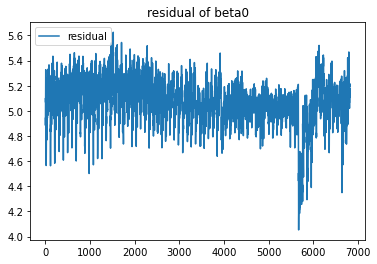

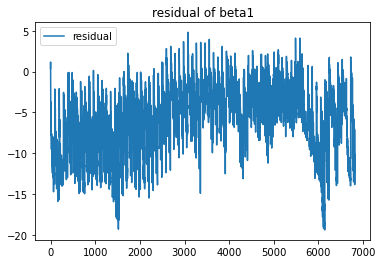

In [226]:
fig1 = plt.figure(1)
x=np.linspace(0,6816,6816)
plt.plot(x, n_beta0 - Beta0_DINEOF , label = 'residual')
plt.legend(loc = 2)
plt.title('residual of beta0')

fig2 = plt.figure(2)
x=np.linspace(0,6816,6816)
plt.plot(x, n_beta1 - Beta1_DINEOF , label = 'residual')
plt.legend(loc = 2)
plt.title('residual of beta1')

plt.show()

### data

In [267]:
###
#cal_PMf  
###
u=np.zeros([274,6816])
for i in range (0,274):
    a=np.array(data['cal_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            a[j]=np.nan
    u[i]=a.T
###
#obs_PMf
###
v=np.zeros([274,6816])
for i in range (0,274):
    a=np.array(data['obs_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            a[j]=np.nan
    v[i]=a.T

print(np.shape(u))
print(np.shape(v))

(274, 6816)
(274, 6816)


In [268]:
XRestruct=sinkr.dineof(u)
YRestruct=sinkr.dineof(v)

[1]
 "1 EOF ; RMS = 9.73609986"


[1]
 "1 EOF ; RMS = 9.72568874"


[1]
 "1 EOF ; RMS = 9.72548592"


[1]
 "1 EOF ; RMS = 9.72551093"


[1]
 "2 EOF ; RMS = 8.96335596"


[1]
 "2 EOF ; RMS = 8.96531672"


[1]
 "3 EOF ; RMS = 8.64425888"


[1]
 "3 EOF ; RMS = 8.64520919"


[1]
 "4 EOF ; RMS = 8.45773459"


[1]
 "4 EOF ; RMS = 8.46539805"


[1]
 "5 EOF ; RMS = 8.34144426"


[1]
 "5 EOF ; RMS = 8.35762058"


[1]
 "6 EOF ; RMS = 8.22552149"


[1]
 "6 EOF ; RMS = 8.22847381"


[1]
 "7 EOF ; RMS = 8.14827116"


[1]
 "7 EOF ; RMS = 8.15498965"


[1]
 "8 EOF ; RMS = 8.10216527"


[1]
 "8 EOF ; RMS = 8.11265641"


[1]
 "9 EOF ; RMS = 8.04428697"


[1]
 "9 EOF ; RMS = 8.0577111"


[1]
 "10 EOF ; RMS = 8.01940709"


[1]
 "10 EOF ; RMS = 8.03759506"


[1]
 "11 EOF ; RMS = 8.01002548"


[1]
 "11 EOF ; RMS = 8.03138812"


[1]
 "12 EOF ; RMS = 8.00775386"


[1]
 "12 EOF ; RMS = 8.03445239"


[1]
 "13 EOF ; RMS = 8.03224863"


[1]
 "13 EOF ; RMS = 8.06503343"


[1]
 "14 EOF ; RMS = 8.04975729"


[1]
 "

In [269]:
XRestruct_Fun=np.array(XRestruct[0])
YRestruct_Fun=np.array(YRestruct[0])
print(type(XRestruct_Fun))
print(type(YRestruct_Fun))
print(np.shape(XRestruct_Fun))
print(np.shape(YRestruct_Fun))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(274, 6816)
(274, 6816)


In [270]:
Xhat=XRestruct_Fun
Yhat=YRestruct_Fun
Xhat_train = np.zeros([244,6816])
Yhat_train = np.zeros([244,6816])
Xhat_test = np.zeros([30,6816])
Yhat_test = np.zeros([30,6816])
for i in range (0,244):
    for j in range (0,6816):
        Xhat_train[i][j] = Xhat[i][j]
        Yhat_train[i][j] = Yhat[i][j]
for i in range (244,274):
    for j in range (0,6816):
        Xhat_test[i-244][j] = Xhat[i][j]
        Yhat_test[i-244][j] = Yhat[i][j]
print('Xhat_train')
#print(Xhat_train)
print(np.shape(Xhat_train))
print('Yhat_train')
#print(Yhat_train)
print(np.shape(Yhat_train))
print('Xhat_test')
#print(Xhat_test)
print(np.shape(Xhat_test))
print('Yhat_test')
#print(Yhat_test)
print(np.shape(Yhat_test))

Xhat_train
(244, 6816)
Yhat_train
(244, 6816)
Xhat_test
(30, 6816)
Yhat_test
(30, 6816)


### Adam

In [271]:
x = Xhat_train
y = Yhat_train
xt = Xhat_test
yt = Yhat_test

In [272]:
def model (x,b0,b1):
    # y = b0 +  torch.matmul(x,b1)
    # y = torch.add(b0 +  torch.matmul(x,b1))
    # y = b0 +  torch.mm(x,b1)
    y = b0 +  b1*x
    return y

In [273]:
features = torch.from_numpy(x)
targets = torch.from_numpy(y)
x_test = torch.from_numpy(xt)
y_test = torch.from_numpy(yt)

# beta0 = torch.randn(6816 , requires_grad = True)
# # beta1 = torch.randn([6816 , 6816], requires_grad = True)
# beta1 = torch.randn(6816, requires_grad = True)

beta0 = torch.ones(6816 , requires_grad = True)
beta1 = torch.ones(6816, requires_grad = True)

rate = 1e-2
# optimizer = optim.LBFGS([beta0 , beta1] , lr = rate)
optimizer = optim.Adam([beta0 , beta1], lr=rate)
# optimizer = optim.SGD([beta0 , beta1], lr=rate)

epo = 1001
loss = nn.MSELoss()
train_error = np.zeros(epo)
test_error = np.zeros(epo)


for epoch in range (epo):
    yhats_train = model(features.float() , beta0 , beta1)
    train_loss = loss(targets.float() , yhats_train)
    train_error[epoch] = train_loss

    optimizer.zero_grad()
    train_loss.backward() 
    optimizer.step()    

    yhats_test = model(x_test.float(), beta0, beta1) 
    for i in range (30):
        for j in range (6816):
            if y_test[i][j] == 0:
                yhats_test[i][j] = 0
    r = yhats_test - y_test
    test_loss = torch.mean(r*r)
    # test_loss = loss(y_test , yhats_test)
    test_error[epoch] = test_loss

    if epoch <= 10 or epoch % 10 == 0:
        print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
                    f" Testing loss {test_loss.item():.4f}")
        # print('\tBeta_0 : ' , beta0)
        # print('\tBeta_1 : ' , beta1)
    else :
        if epoch >= epo-10 :
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
                        f" Testing loss {test_loss.item():.4f}")
            # print('\tBeta_0 : ' , beta0)
            # print('\tBeta_1 : ' , beta1)

Epoch 0, Training loss 161.4331, Testing loss 99.0375
Epoch 1, Training loss 158.7192, Testing loss 97.9457
Epoch 2, Training loss 156.0943, Testing loss 96.9139
Epoch 3, Training loss 153.5597, Testing loss 95.9409
Epoch 4, Training loss 151.1154, Testing loss 95.0258
Epoch 5, Training loss 148.7607, Testing loss 94.1680
Epoch 6, Training loss 146.4961, Testing loss 93.3662
Epoch 7, Training loss 144.3205, Testing loss 92.6195
Epoch 8, Training loss 142.2334, Testing loss 91.9264
Epoch 9, Training loss 140.2335, Testing loss 91.2854
Epoch 10, Training loss 138.3200, Testing loss 90.6947
Epoch 20, Training loss 123.5584, Testing loss 87.1205
Epoch 30, Training loss 115.1497, Testing loss 86.3619
Epoch 40, Training loss 110.6553, Testing loss 86.6743
Epoch 50, Training loss 108.2150, Testing loss 87.0381
Epoch 60, Training loss 106.7568, Testing loss 87.1092
Epoch 70, Training loss 105.7561, Testing loss 86.8983
Epoch 80, Training loss 104.9718, Testing loss 86.5003
Epoch 90, Training l

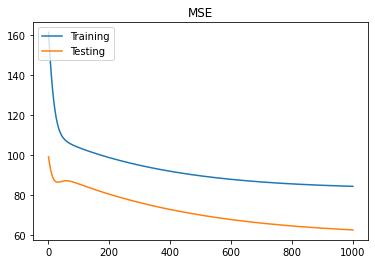

In [274]:
fig1 = plt.figure(1)
x=np.linspace(1,epo,epo)
plt.plot(x,train_error, label = 'Training')
plt.plot(x,test_error, label ='Testing')
plt.legend(loc = 2)
plt.title('MSE')

plt.show()

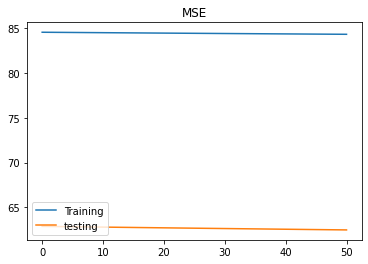

In [275]:
error1=np.zeros(50)
error2=np.zeros(50)
for i in range (0,50):
    error1[i]=train_error[epo-51+i]
    error2[i]=test_error[epo-51+i]

fig1 = plt.figure(1)
x = np.linspace(0 , 50 , 50)
plt.plot(x , error1 , label = 'Training')
plt.plot(x , error2 , label = 'testing')
plt.legend(loc = 3)
plt.title('MSE')

plt.show()

In [276]:
# n_beta0 = beta0.detach().numpy()
# n_beta1 = torch.mean(beta1 , 0 , True )
# n_beta1 = n_beta1.detach().numpy().reshape(6816)


# n_beta0 = beta0.detach().numpy()
# n_beta1 = beta1.detach().numpy()
# n_beta1 = np.mean(n_beta1 , axis =0)

n_beta0 = beta0.detach().numpy()
n_beta1 = beta1.detach().numpy()

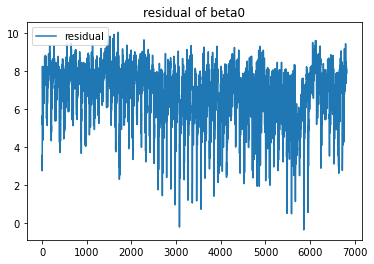

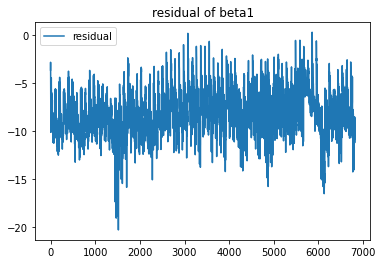

In [277]:
fig1 = plt.figure(1)
x=np.linspace(0,6816,6816)
plt.plot(x, n_beta0 - Beta0_DINEOF , label = 'residual')
plt.legend(loc = 2)
plt.title('residual of beta0')

fig2 = plt.figure(2)
x=np.linspace(0,6816,6816)
plt.plot(x, n_beta1 - Beta1_DINEOF , label = 'residual')
plt.legend(loc = 2)
plt.title('residual of beta1')

plt.show()

### SGD

In [278]:
x = Xhat_train
y = Yhat_train
xt = Xhat_test
yt = Yhat_test

In [279]:
def model (x,b0,b1):
    # y = b0 +  torch.matmul(x,b1)
    # y = torch.add(b0 +  torch.matmul(x,b1))
    # y = b0 +  torch.mm(x,b1)
    y = b0 + b1*x
    return y

In [280]:
features = torch.from_numpy(x)
targets = torch.from_numpy(y)
x_test = torch.from_numpy(xt)
y_test = torch.from_numpy(yt)

# beta0 = torch.randn(6816 , requires_grad = True)
# beta1 = torch.randn([6816 , 6816], requires_grad = True)

beta0 = torch.ones(6816 , requires_grad = True)
beta1 = torch.ones(6816, requires_grad = True)

rate = 1e-3
# optimizer = optim.LBFGS([beta0 , beta1] , lr = rate)
# optimizer = optim.Adam([beta0 , beta1], lr=rate)
optimizer = optim.SGD([beta0 , beta1], lr=rate)

epo = 1001
loss = nn.MSELoss()
train_error = np.zeros(epo)
test_error = np.zeros(epo)


for epoch in range (epo):
    yhats_train = model(features.float() , beta0 , beta1)
    train_loss = loss(targets.float() , yhats_train)
    train_error[epoch] = train_loss

    optimizer.zero_grad()
    train_loss.backward() 
    optimizer.step()    

    yhats_test = model(x_test.float(), beta0, beta1) 
    for i in range (30):
        for j in range (6816):
            if y_test[i][j] == 0:
                yhats_test[i][j] = 0
    r = yhats_test - y_test
    test_loss = torch.mean(r*r)
    # test_loss = loss(y_test , yhats_test)
    test_error[epoch] = test_loss

    if epoch <= 10 or epoch % 10 == 0:
        print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
                    f" Testing loss {test_loss.item():.4f}")
        # print('\tBeta_0 : ' , beta0)
        # print('\tBeta_1 : ' , beta1)
    else :
        if epoch >= epo-10 :
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
                        f" Testing loss {test_loss.item():.4f}")
            # print('\tBeta_0 : ' , beta0)
            # print('\tBeta_1 : ' , beta1)

Epoch 0, Training loss 161.4331, Testing loss 100.1828
Epoch 1, Training loss 161.4118, Testing loss 100.1749
Epoch 2, Training loss 161.3905, Testing loss 100.1670
Epoch 3, Training loss 161.3693, Testing loss 100.1591
Epoch 4, Training loss 161.3480, Testing loss 100.1512
Epoch 5, Training loss 161.3269, Testing loss 100.1434
Epoch 6, Training loss 161.3056, Testing loss 100.1355
Epoch 7, Training loss 161.2843, Testing loss 100.1276
Epoch 8, Training loss 161.2632, Testing loss 100.1198
Epoch 9, Training loss 161.2420, Testing loss 100.1119
Epoch 10, Training loss 161.2208, Testing loss 100.1041
Epoch 20, Training loss 161.0096, Testing loss 100.0258
Epoch 30, Training loss 160.7995, Testing loss 99.9480
Epoch 40, Training loss 160.5901, Testing loss 99.8706
Epoch 50, Training loss 160.3818, Testing loss 99.7937
Epoch 60, Training loss 160.1746, Testing loss 99.7172
Epoch 70, Training loss 159.9684, Testing loss 99.6411
Epoch 80, Training loss 159.7630, Testing loss 99.5655
Epoch 90

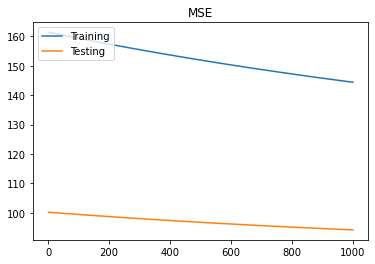

In [281]:
fig1 = plt.figure(1)
x=np.linspace(1,epo,epo)
plt.plot(x,train_error, label = 'Training')
plt.plot(x,test_error, label ='Testing')
plt.legend(loc = 2)
plt.title('MSE')

plt.show()

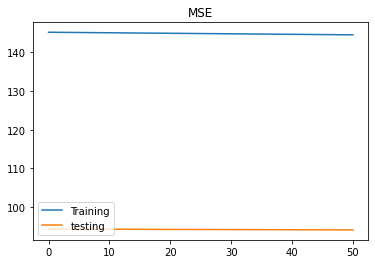

In [282]:
error1=np.zeros(50)
error2=np.zeros(50)
for i in range (0,50):
    error1[i]=train_error[epo-51+i]
    error2[i]=test_error[epo-51+i]

fig1 = plt.figure(1)
x = np.linspace(0 , 50 , 50)
plt.plot(x , error1 , label = 'Training')
plt.plot(x , error2 , label = 'testing')
plt.legend(loc = 3)
plt.title('MSE')

plt.show()

In [283]:
# n_beta0 = beta0.detach().numpy()
# n_beta1 = torch.mean(beta1 , 0 , True )
# n_beta1 = beta1.detach().numpy()
n_beta0 = beta0.detach().numpy()
n_beta1 = beta1.detach().numpy()

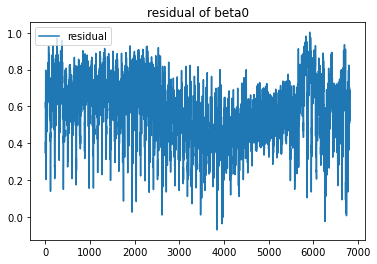

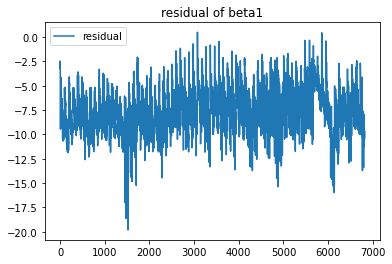

In [284]:
fig1 = plt.figure(1)
x=np.linspace(0,6816,6816)
plt.plot(x, n_beta0 - Beta0_DINEOF , label = 'residual')
plt.legend(loc = 2)
plt.title('residual of beta0')

fig2 = plt.figure(2)
x=np.linspace(0,6816,6816)
plt.plot(x, n_beta1 - Beta1_DINEOF , label = 'residual')
plt.legend(loc = 2)
plt.title('residual of beta1')

plt.show()

## 24+96hr beta0 beta1

### data

In [3]:
x1=np.zeros([273,1704])
x2=np.zeros([273,6816])

#x1 (0th~1703th column as x)
for i in range (0,273):
    for j in range (0,71):
        a=np.array(data['obs_PMf'][6816*i+96*j:6816*i+96*j+24])
        for k in range (0,24):
            if a[k]=='\\N' :
                a[k]=np.nan
        for k in range (0,24):
            x1[i][j*24+k]=a[k]

#x2 (1704th~8519th column as x)
for i in range (1,274):
    b=np.array(data['cal_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if b[j]=='\\N' :
            b[j]=np.nan
    for j in range(0,6816):
        x2[i-1][j]=b[j]
        
print(np.shape(x1))
print(np.shape(x2))

(273, 1704)
(273, 6816)


In [4]:
x1Restruct=sinkr.dineof(x1)
x2Restruct=sinkr.dineof(x2)

[1]
 "1 EOF ; RMS = 7.17306013"


[1]
 "1 EOF ; RMS = 7.14007992"


[1]
 "1 EOF ; RMS = 7.14066708"


[1]
 "2 EOF ; RMS = 6.34482796"


[1]
 "2 EOF ; RMS = 6.34414109"


[1]
 "2 EOF ; RMS = 6.34403744"


[1]
 "2 EOF ; RMS = 6.34398993"


[1]
 "2 EOF ; RMS = 6.34397644"


[1]
 "2 EOF ; RMS = 6.34397291"


[1]
 "3 EOF ; RMS = 5.94172826"


[1]
 "3 EOF ; RMS = 5.94345911"


[1]
 "4 EOF ; RMS = 5.63945456"


[1]
 "4 EOF ; RMS = 5.6391915"


[1]
 "4 EOF ; RMS = 5.63988298"


[1]
 "5 EOF ; RMS = 5.39814088"


[1]
 "5 EOF ; RMS = 5.40210329"


[1]
 "6 EOF ; RMS = 5.30478061"


[1]
 "6 EOF ; RMS = 5.30753911"


[1]
 "7 EOF ; RMS = 5.24648903"


[1]
 "7 EOF ; RMS = 5.25509718"


[1]
 "8 EOF ; RMS = 5.18502908"


[1]
 "8 EOF ; RMS = 5.18883962"


[1]
 "9 EOF ; RMS = 5.12976716"


[1]
 "9 EOF ; RMS = 5.13810372"


[1]
 "10 EOF ; RMS = 5.04447572"


[1]
 "10 EOF ; RMS = 5.04014345"


[1]
 "10 EOF ; RMS = 5.03908665"


[1]
 "10 EOF ; RMS = 5.03876547"


[1]
 "10 EOF ; RMS = 5.0386593"


[1]
 "10 EO

In [5]:
x1Restruct_Fun=np.array(x1Restruct[0])
x2Restruct_Fun=np.array(x2Restruct[0])
print(np.shape(x1Restruct_Fun))
print(np.shape(x2Restruct_Fun))

(273, 1704)
(273, 6816)


In [6]:
YRestruct_Fun=np.zeros([269,6816])
for i in range (0,269):
    for j in range (0,1704):
        YRestruct_Fun[i][j]=x1Restruct_Fun[i+1][j]
    for j in range (1704,3408):
        YRestruct_Fun[i][j]=x1Restruct_Fun[i+2][j-1704]
    for j in range (3408,5112):
        YRestruct_Fun[i][j]=x1Restruct_Fun[i+3][j-3408]
    for j in range (5112,6816):
        YRestruct_Fun[i][j]=x1Restruct_Fun[i+4][j-5112]
print(np.shape(YRestruct_Fun))

(269, 6816)


In [7]:
XRestruct_Fun=np.zeros([269,8520])
for i in range (0,269):
    for j in range (0,1704):
        XRestruct_Fun[i][j]=x1Restruct_Fun[i][j]
    for j in range (1704,8520):
        XRestruct_Fun[i][j]=x2Restruct_Fun[i][j-1704]
print(np.shape(XRestruct_Fun))

(269, 8520)


In [8]:
Xhat=XRestruct_Fun
Yhat=YRestruct_Fun
Xhat_train = np.zeros([244,8520])
Yhat_train = np.zeros([244,6816])
Xhat_test = np.zeros([25,8520])
Yhat_test = np.zeros([25,6816])
for i in range (0,244):
    for j in range (0,8520):
        Xhat_train[i][j] = Xhat[i][j]
    for j in range (0,6816):    
        Yhat_train[i][j] = Yhat[i][j]
for i in range (244,269):
    for j in range (0,8520):
        Xhat_test[i-244][j] = Xhat[i][j]
    for j in range (0,6816):
        Yhat_test[i-244][j] = Yhat[i][j]
print('Xhat_train')
#print(Xhat_train)
print(np.shape(Xhat_train))
print('Yhat_train')
#print(Yhat_train)
print(np.shape(Yhat_train))
print('Xhat_test')
#print(Xhat_test)
print(np.shape(Xhat_test))
print('Yhat_test')
#print(Yhat_test)
print(np.shape(Yhat_test))

Xhat_train
(244, 8520)
Yhat_train
(244, 6816)
Xhat_test
(25, 8520)
Yhat_test
(25, 6816)


### Adam

In [9]:
x = Xhat_train
y = Yhat_train
xt = Xhat_test
yt = Yhat_test

In [18]:
a = torch.zeros(3,4)
for i in range(3):
    for j in range(4):
        a[i][j] = 4*i + j + 1
print(a)
print(a[:,1:])

tensor([[ 1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.]])
tensor([[ 2.,  3.,  4.],
        [ 6.,  7.,  8.],
        [10., 11., 12.]])


In [19]:
def model (x,b0,b1):
    # y = b0 +  torch.matmul(x,b1)
    # y = torch.add(b0 +  torch.matmul(x,b1))
    # y = b0 +  torch.mm(x,b1)
    y_8520 = b0 + b1*x
    y = y_8520[ : , 1704: ]

    # y = torch.zeros(len(y_8520),6816)
    # for i in range (0,len(y_8520)):
    #     for j in range (0,6816):
    #         y[i][j] = y_8520[i][j+1704]
    return y

In [20]:
features = torch.from_numpy(x)
targets = torch.from_numpy(y)
x_test = torch.from_numpy(xt)
y_test = torch.from_numpy(yt)

# beta0 = torch.randn(6816 , requires_grad = True)
# beta1 = torch.randn([8520 , 6816], requires_grad = True)

beta0 = torch.ones(8520 , requires_grad = True)
beta1 = torch.ones(8520, requires_grad = True)

rate = 1e-2
# optimizer = optim.LBFGS([beta0 , beta1] , lr = rate)
optimizer = optim.Adam([beta0 , beta1], lr=rate)
# optimizer = optim.SGD([beta0 , beta1], lr=rate)

epo = 1001
loss = nn.MSELoss()
train_error = np.zeros(epo)
test_error = np.zeros(epo)


for epoch in range (epo):
    yhats_train = model(features.float() , beta0 , beta1)
    train_loss = loss(targets.float() , yhats_train)
    train_error[epoch] = train_loss

    optimizer.zero_grad()
    train_loss.backward() 
    optimizer.step()    

    yhats_test = model(x_test.float(), beta0, beta1) 
    for i in range (25):
        for j in range (6816):
            if y_test[i][j] == 0:
                yhats_test[i][j] = 0
    r = yhats_test - y_test
    test_loss = torch.mean(r*r)
    # test_loss = loss(y_test , yhats_test)
    test_error[epoch] = test_loss

    if epoch <= 10 or epoch % 10 == 0:
        print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
                    f" Testing loss {test_loss.item():.4f}")
        # print('\tBeta_0 : ' , beta0)
        # print('\tBeta_1 : ' , beta1)
    else :
        if epoch >= epo-10 :
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
                        f" Testing loss {test_loss.item():.4f}")
            # print('\tBeta_0 : ' , beta0)
            # print('\tBeta_1 : ' , beta1)

Epoch 0, Training loss 219.2881, Testing loss 128.0281
Epoch 1, Training loss 215.8857, Testing loss 126.4605
Epoch 2, Training loss 212.5720, Testing loss 124.9538
Epoch 3, Training loss 209.3483, Testing loss 123.5075
Epoch 4, Training loss 206.2146, Testing loss 122.1207
Epoch 5, Training loss 203.1715, Testing loss 120.7925
Epoch 6, Training loss 200.2186, Testing loss 119.5221
Epoch 7, Training loss 197.3558, Testing loss 118.3087
Epoch 8, Training loss 194.5833, Testing loss 117.1513
Epoch 9, Training loss 191.8999, Testing loss 116.0491
Epoch 10, Training loss 189.3052, Testing loss 115.0009
Epoch 20, Training loss 167.9866, Testing loss 107.1753
Epoch 30, Training loss 153.8860, Testing loss 103.0497
Epoch 40, Training loss 145.0054, Testing loss 101.0855
Epoch 50, Training loss 139.5468, Testing loss 100.1918
Epoch 60, Training loss 136.1794, Testing loss 99.7385
Epoch 70, Training loss 134.0291, Testing loss 99.3989
Epoch 80, Training loss 132.5621, Testing loss 99.0442
Epoch

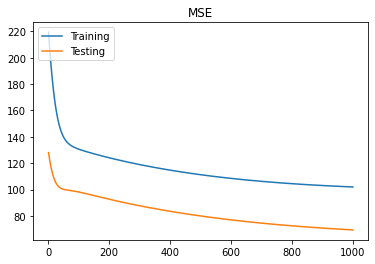

In [21]:
fig1 = plt.figure(1)
x=np.linspace(1,epo,epo)
plt.plot(x,train_error, label = 'Training')
plt.plot(x,test_error, label ='Testing')
plt.legend(loc = 2)
plt.title('MSE')

plt.show()

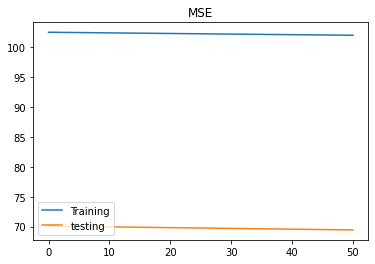

In [22]:
error1=np.zeros(50)
error2=np.zeros(50)
for i in range (0,50):
    error1[i]=train_error[epo-51+i]
    error2[i]=test_error[epo-51+i]

fig1 = plt.figure(1)
x = np.linspace(0 , 50 , 50)
plt.plot(x , error1 , label = 'Training')
plt.plot(x , error2 , label = 'testing')
plt.legend(loc = 3)
plt.title('MSE')

plt.show()

### SGD

In [23]:
x = Xhat_train
y = Yhat_train
xt = Xhat_test
yt = Yhat_test

In [24]:
def model (x,b0,b1):
    # y = b0 +  torch.matmul(x,b1)
    # y = torch.add(b0 +  torch.matmul(x,b1))
    # y = b0 +  torch.mm(x,b1)
    y_8520 = b0 + b1*x
    y = y_8520[ : , 1704: ]
    return y

In [25]:
features = torch.from_numpy(x)
targets = torch.from_numpy(y)
x_test = torch.from_numpy(xt)
y_test = torch.from_numpy(yt)

# beta0 = torch.randn(6816 , requires_grad = True)
# beta1 = torch.randn([8520 , 6816], requires_grad = True)
beta0 = torch.ones(8520 , requires_grad = True)
beta1 = torch.ones(8520, requires_grad = True)

rate = 1e-3
# optimizer = optim.LBFGS([beta0 , beta1] , lr = rate)
# optimizer = optim.Adam([beta0 , beta1], lr=rate)
optimizer = optim.SGD([beta0 , beta1], lr=rate)

epo = 1001
loss = nn.MSELoss()
train_error = np.zeros(epo)
test_error = np.zeros(epo)


for epoch in range (epo):
    yhats_train = model(features.float() , beta0 , beta1)
    train_loss = loss(targets.float() , yhats_train)
    train_error[epoch] = train_loss

    optimizer.zero_grad()
    train_loss.backward() 
    optimizer.step()    

    yhats_test = model(x_test.float(), beta0, beta1) 
    for i in range (25):
        for j in range (6816):
            if y_test[i][j] == 0:
                yhats_test[i][j] = 0
    r = yhats_test - y_test
    test_loss = torch.mean(r*r)
    # test_loss = loss(y_test , yhats_test)
    test_error[epoch] = test_loss

    if epoch <= 10 or epoch % 10 == 0:
        print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
                    f" Testing loss {test_loss.item():.4f}")
        # print('\tBeta_0 : ' , beta0)
        # print('\tBeta_1 : ' , beta1)
    else :
        if epoch >= epo-10 :
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
                        f" Testing loss {test_loss.item():.4f}")
            # print('\tBeta_0 : ' , beta0)
            # print('\tBeta_1 : ' , beta1)

Epoch 0, Training loss 219.2881, Testing loss 129.6411
Epoch 1, Training loss 219.2527, Testing loss 129.6252
Epoch 2, Training loss 219.2175, Testing loss 129.6094
Epoch 3, Training loss 219.1822, Testing loss 129.5936
Epoch 4, Training loss 219.1468, Testing loss 129.5778
Epoch 5, Training loss 219.1117, Testing loss 129.5620
Epoch 6, Training loss 219.0764, Testing loss 129.5462
Epoch 7, Training loss 219.0412, Testing loss 129.5305
Epoch 8, Training loss 219.0060, Testing loss 129.5147
Epoch 9, Training loss 218.9708, Testing loss 129.4989
Epoch 10, Training loss 218.9357, Testing loss 129.4832
Epoch 20, Training loss 218.5848, Testing loss 129.3262
Epoch 30, Training loss 218.2356, Testing loss 129.1700
Epoch 40, Training loss 217.8881, Testing loss 129.0147
Epoch 50, Training loss 217.5423, Testing loss 128.8603
Epoch 60, Training loss 217.1982, Testing loss 128.7067
Epoch 70, Training loss 216.8558, Testing loss 128.5539
Epoch 80, Training loss 216.5151, Testing loss 128.4020
Ep

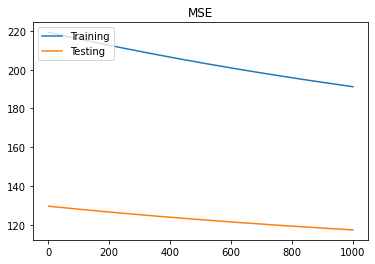

In [26]:
fig1 = plt.figure(1)
x=np.linspace(1,epo,epo)
plt.plot(x,train_error, label = 'Training')
plt.plot(x,test_error, label ='Testing')
plt.legend(loc = 2)
plt.title('MSE')

plt.show()

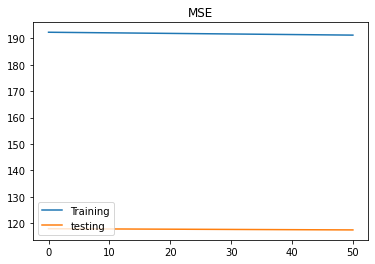

In [27]:
error1=np.zeros(50)
error2=np.zeros(50)
for i in range (0,50):
    error1[i]=train_error[epo-51+i]
    error2[i]=test_error[epo-51+i]

fig1 = plt.figure(1)
x = np.linspace(0 , 50 , 50)
plt.plot(x , error1 , label = 'Training')
plt.plot(x , error2 , label = 'testing')
plt.legend(loc = 3)
plt.title('MSE')

plt.show()

## 24+96hr beta0 beta1 beta2

### data

In [28]:
x1=np.zeros([273,1704])
x2=np.zeros([273,6816])

#x1 (0th~1703th column as x)
for i in range (0,273):
    for j in range (0,71):
        a=np.array(data['obs_PMf'][6816*i+96*j:6816*i+96*j+24])
        for k in range (0,24):
            if a[k]=='\\N' :
                a[k]=np.nan
        for k in range (0,24):
            x1[i][j*24+k]=a[k]

#x2 (1704th~8519th column as x)
for i in range (1,274):
    b=np.array(data['cal_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if b[j]=='\\N' :
            b[j]=np.nan
    for j in range(0,6816):
        x2[i-1][j]=b[j]
        
print(np.shape(x1))
print(np.shape(x2))

(273, 1704)
(273, 6816)


In [29]:
x1Restruct=sinkr.dineof(x1)
x2Restruct=sinkr.dineof(x2)

[1]
 "1 EOF ; RMS = 7.03408984"


[1]
 "1 EOF ; RMS = 6.98217025"


[1]
 "1 EOF ; RMS = 6.98231898"


[1]
 "2 EOF ; RMS = 6.19433945"


[1]
 "2 EOF ; RMS = 6.19332181"


[1]
 "2 EOF ; RMS = 6.19359208"


[1]
 "3 EOF ; RMS = 5.77821583"


[1]
 "3 EOF ; RMS = 5.78039287"


[1]
 "4 EOF ; RMS = 5.5849414"


[1]
 "4 EOF ; RMS = 5.59233422"


[1]
 "5 EOF ; RMS = 5.35893033"


[1]
 "5 EOF ; RMS = 5.3612884"


[1]
 "6 EOF ; RMS = 5.19966426"


[1]
 "6 EOF ; RMS = 5.19941552"


[1]
 "6 EOF ; RMS = 5.19973352"


[1]
 "7 EOF ; RMS = 5.12073663"


[1]
 "7 EOF ; RMS = 5.12656753"


[1]
 "8 EOF ; RMS = 5.09882627"


[1]
 "8 EOF ; RMS = 5.10986825"


[1]
 "9 EOF ; RMS = 5.03601162"


[1]
 "9 EOF ; RMS = 5.03845086"


[1]
 "10 EOF ; RMS = 4.96667104"


[1]
 "10 EOF ; RMS = 4.96693078"


[1]
 "11 EOF ; RMS = 4.91959814"


[1]
 "11 EOF ; RMS = 4.92694007"


[1]
 "12 EOF ; RMS = 4.91492296"


[1]
 "12 EOF ; RMS = 4.93081506"


[1]
 "13 EOF ; RMS = 4.90808231"


[1]
 "13 EOF ; RMS = 4.92996166"


[1]
 "14

In [30]:
x1Restruct_Fun=np.array(x1Restruct[0])
x2Restruct_Fun=np.array(x2Restruct[0])
print(np.shape(x1Restruct_Fun))
print(np.shape(x2Restruct_Fun))

(273, 1704)
(273, 6816)


In [31]:
YRestruct_Fun=np.zeros([269,6816])
for i in range (0,269):
    for j in range (0,1704):
        YRestruct_Fun[i][j]=x1Restruct_Fun[i+1][j]
    for j in range (1704,3408):
        YRestruct_Fun[i][j]=x1Restruct_Fun[i+2][j-1704]
    for j in range (3408,5112):
        YRestruct_Fun[i][j]=x1Restruct_Fun[i+3][j-3408]
    for j in range (5112,6816):
        YRestruct_Fun[i][j]=x1Restruct_Fun[i+4][j-5112]
print(np.shape(YRestruct_Fun))

(269, 6816)


In [32]:
XRestruct_Fun=np.zeros([269,8520])
for i in range (0,269):
    for j in range (0,1704):
        XRestruct_Fun[i][j]=x1Restruct_Fun[i][j]
    for j in range (1704,8520):
        XRestruct_Fun[i][j]=x2Restruct_Fun[i][j-1704]
print(np.shape(XRestruct_Fun))

(269, 8520)


In [33]:
Xhat=XRestruct_Fun
Yhat=YRestruct_Fun
X1hat_train = np.zeros([244,1704])
X2hat_train = np.zeros([244,6816])
Yhat_train = np.zeros([244,6816])
X1hat_test = np.zeros([25,1704])
X2hat_test = np.zeros([25,6816])
Yhat_test = np.zeros([25,6816])
for i in range (0,244):
    for j in range (0,1704):
        X1hat_train[i][j] = Xhat[i][j]
    for j in range (0,6816):    
        X2hat_train[i][j] = Xhat[i][j]
        Yhat_train[i][j] = Yhat[i][j]
for i in range (244,269):
    for j in range (0,1704):
        X1hat_test[i-244][j] = Xhat[i][j]
    for j in range (0,6816):
        X2hat_test[i-244][j] = Xhat[i][j]
        Yhat_test[i-244][j] = Yhat[i][j]
print('X1hat_train')
#print(X1hat_train)
print(np.shape(X1hat_train))
print('X2hat_train')
#print(X2hat_train)
print(np.shape(X2hat_train))
print('Yhat_train')
#print(Yhat_train)
print(np.shape(Yhat_train))
print('X1hat_test')
#print(X1hat_test)
print(np.shape(X1hat_test))
print('X2hat_test')
#print(X2hat_test)
print(np.shape(X2hat_test))
print('Yhat_test')
#print(Yhat_test)
print(np.shape(Yhat_test))

X1hat_train
(244, 1704)
X2hat_train
(244, 6816)
Yhat_train
(244, 6816)
X1hat_test
(25, 1704)
X2hat_test
(25, 6816)
Yhat_test
(25, 6816)


### Adam

In [ ]:
def model (x1,x2,b0,b1,b2):
    y = b0 +  torch.matmul(x1,b1) + torch.matmul(x2,b2)
    return y

features1 = torch.from_numpy(x1)
features2 = torch.from_numpy(x2)
targets = torch.from_numpy(y)
x_test1 = torch.from_numpy(xt1)
x_test2 = torch.from_numpy(xt2)
y_test = torch.from_numpy(yt)

beta0 = torch.randn(6816 , requires_grad = True)
beta1 = torch.randn([1704,6816] , requires_grad = True)
beta2 = torch.randn([6816,6816] , requires_grad = True)

rate = 1e-2
optimizer = optim.Adam([beta0 , beta1 , beta2], lr=rate)

epo = 1001
loss = nn.MSELoss()
train_error = np.zeros(epo)
test_error = np.zeros(epo)

for epoch in range (epo):
    yhats_train = model(features1.float() , features2.float(), beta0 , beta1 , beta2)
    train_loss = loss(targets.float() , yhats_train)
    train_error[epoch] = train_loss

    optimizer.zero_grad()
    train_loss.backward() 
    optimizer.step()    

    yhats_test = model(x_test1.float(), x_test2.float() , beta0, beta1 , beta2) 
    for i in range (25):
        for j in range (6816):
            if y_test[i][j] == 0:
                yhats_test[i][j] = 0
    r = yhats_test - y_test
    test_loss = torch.mean(r*r)
    test_error[epoch] = test_loss

    if epoch <= 10 or epoch % 10 == 0:
        print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
                    f" Testing loss {test_loss.item():.4f}")  
    else :
        if epoch >= epo-10 :
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
                        f" Testing loss {test_loss.item():.4f}")

In [34]:
x1 = X1hat_train
x2 = X2hat_train
y = Yhat_train
xt1 = X1hat_test
xt2 = X2hat_test
yt = Yhat_test

In [35]:
def model (x1,x2,b0,b1,b2):
    # y = b0 +  torch.matmul(x1,b1) + torch.matmul(x2,b2)
    # y = torch.add(b0 +  torch.matmul(x,b1))
    # y = b0 +  torch.mm(x,b1)

    b = torch.mean(b1*x1)*torch.ones(6816)
    y = b0 + b+ b2*x2
    return y

In [36]:
features1 = torch.from_numpy(x1)
features2 = torch.from_numpy(x2)
targets = torch.from_numpy(y)
x_test1 = torch.from_numpy(xt1)
x_test2 = torch.from_numpy(xt2)
y_test = torch.from_numpy(yt)

# beta0 = torch.randn(6816 , requires_grad = True)
# beta1 = torch.randn([1704,6816] , requires_grad = True)
# beta2 = torch.randn([6816,6816] , requires_grad = True)

beta0 = torch.ones(6816 , requires_grad = True)
beta1 = torch.ones(1704, requires_grad = True)
beta2 = torch.ones(6816, requires_grad = True)

rate = 1e-2
# optimizer = optim.LBFGS([beta0 , beta1 , beta2] , lr = rate)
optimizer = optim.Adam([beta0 , beta1 , beta2], lr=rate)
# optimizer = optim.SGD([beta0 , beta1 , beta2], lr=rate)

epo = 1001
loss = nn.MSELoss()
train_error = np.zeros(epo)
test_error = np.zeros(epo)


for epoch in range (epo):
    yhats_train = model(features1.float() , features2.float(), beta0 , beta1 , beta2)
    train_loss = loss(targets.float() , yhats_train)
    train_error[epoch] = train_loss

    optimizer.zero_grad()
    train_loss.backward() 
    optimizer.step()    

    yhats_test = model(x_test1.float(), x_test2.float() , beta0, beta1 , beta2) 
    for i in range (25):
        for j in range (6816):
            if y_test[i][j] == 0:
                yhats_test[i][j] = 0
    r = yhats_test - y_test
    test_loss = torch.mean(r*r)
    # test_loss = loss(y_test , yhats_test)
    test_error[epoch] = test_loss

    if epoch <= 10 or epoch % 10 == 0:
        print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
                    f" Testing loss {test_loss.item():.4f}")
        # print('\tBeta_0 : ' , beta0)
        # print('\tBeta_1 : ' , beta1)
        # print('\tBeta_2 : ' , beta2)       
    else :
        if epoch >= epo-10 :
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
                        f" Testing loss {test_loss.item():.4f}")
            # print('\tBeta_0 : ' , beta0)
            # print('\tBeta_1 : ' , beta1)
            # print('\tBeta_2 : ' , beta2)       

Epoch 0, Training loss 444.9611, Testing loss 366.2643
Epoch 1, Training loss 432.8001, Testing loss 355.1604
Epoch 2, Training loss 420.8706, Testing loss 344.2805
Epoch 3, Training loss 409.1797, Testing loss 333.6281
Epoch 4, Training loss 397.7225, Testing loss 323.2060
Epoch 5, Training loss 386.5143, Testing loss 313.0178
Epoch 6, Training loss 375.5465, Testing loss 303.0654
Epoch 7, Training loss 364.8341, Testing loss 293.3518
Epoch 8, Training loss 354.3716, Testing loss 283.8786
Epoch 9, Training loss 344.1619, Testing loss 274.6480
Epoch 10, Training loss 334.2074, Testing loss 265.6612
Epoch 20, Training loss 248.8874, Testing loss 189.2781
Epoch 30, Training loss 188.5907, Testing loss 136.3709
Epoch 40, Training loss 149.7490, Testing loss 103.2580
Epoch 50, Training loss 126.9220, Testing loss 84.6264
Epoch 60, Training loss 114.5067, Testing loss 75.1620
Epoch 70, Training loss 108.0264, Testing loss 70.7181
Epoch 80, Training loss 104.5764, Testing loss 68.6719
Epoch 

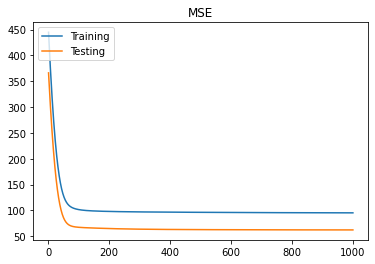

In [37]:
fig1 = plt.figure(1)
x=np.linspace(1,epo,epo)
plt.plot(x,train_error, label = 'Training')
plt.plot(x,test_error, label ='Testing')
plt.legend(loc = 2)
plt.title('MSE')

plt.show()

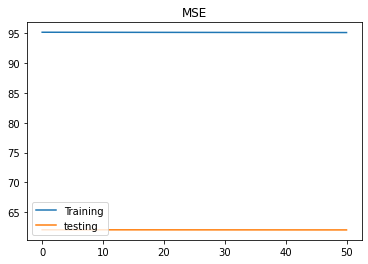

In [38]:
error1=np.zeros(50)
error2=np.zeros(50)
for i in range (0,50):
    error1[i]=train_error[epo-51+i]
    error2[i]=test_error[epo-51+i]

fig1 = plt.figure(1)
x = np.linspace(0 , 50 , 50)
plt.plot(x , error1 , label = 'Training')
plt.plot(x , error2 , label = 'testing')
plt.legend(loc = 3)
plt.title('MSE')

plt.show()

### SGD

In [39]:
x1 = X1hat_train
x2 = X2hat_train
y = Yhat_train
xt1 = X1hat_test
xt2 = X2hat_test
yt = Yhat_test

In [40]:
def model (x1,x2,b0,b1,b2):
    # y = b0 +  torch.matmul(x1,b1) + torch.matmul(x2,b2)
    # y = torch.add(b0 +  torch.matmul(x,b1))
    # y = b0 +  torch.mm(x,b1)
    b = torch.mean(b1*x1)*torch.ones(6816)
    y = b0 + b+ b2*x2
    return y

In [41]:
features1 = torch.from_numpy(x1)
features2 = torch.from_numpy(x2)
targets = torch.from_numpy(y)
x_test1 = torch.from_numpy(xt1)
x_test2 = torch.from_numpy(xt2)
y_test = torch.from_numpy(yt)

# beta0 = torch.randn(6816 , requires_grad = True)
# beta1 = torch.randn([1704,6816] , requires_grad = True)
# beta2 = torch.randn([6816,6816] , requires_grad = True)

beta0 = torch.ones(6816 , requires_grad = True)
beta1 = torch.ones(1704, requires_grad = True)
beta2 = torch.ones(6816, requires_grad = True)

rate = 1e-3
# optimizer = optim.LBFGS([beta0 , beta1 , beta2] , lr = rate)
# optimizer = optim.Adam([beta0 , beta1 , beta2], lr=rate)
optimizer = optim.SGD([beta0 , beta1 , beta2], lr=rate)

epo = 1001
loss = nn.MSELoss()
train_error = np.zeros(epo)
test_error = np.zeros(epo)


for epoch in range (epo):
    yhats_train = model(features1.float() , features2.float(), beta0 , beta1 , beta2)
    train_loss = loss(targets.float() , yhats_train)
    train_error[epoch] = train_loss

    optimizer.zero_grad()
    train_loss.backward() 
    optimizer.step()    

    yhats_test = model(x_test1.float(), x_test2.float() , beta0, beta1 , beta2) 
    for i in range (25):
        for j in range (6816):
            if y_test[i][j] == 0:
                yhats_test[i][j] = 0
    r = yhats_test - y_test
    test_loss = torch.mean(r*r)
    # test_loss = loss(y_test , yhats_test)
    test_error[epoch] = test_loss

    if epoch <= 10 or epoch % 10 == 0:
        print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
                    f" Testing loss {test_loss.item():.4f}")
        # print('\tBeta_0 : ' , beta0)
        # print('\tBeta_1 : ' , beta1)
        # print('\tBeta_2 : ' , beta2)       
    else :
        if epoch >= epo-10 :
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
                        f" Testing loss {test_loss.item():.4f}")
            # print('\tBeta_0 : ' , beta0)
            # print('\tBeta_1 : ' , beta1)
            # print('\tBeta_2 : ' , beta2)       

Epoch 0, Training loss 444.9611, Testing loss 377.3658
Epoch 1, Training loss 444.7262, Testing loss 377.1433
Epoch 2, Training loss 444.4880, Testing loss 376.9208
Epoch 3, Training loss 444.2526, Testing loss 376.6982
Epoch 4, Training loss 444.0149, Testing loss 376.4763
Epoch 5, Training loss 443.7782, Testing loss 376.2544
Epoch 6, Training loss 443.5423, Testing loss 376.0327
Epoch 7, Training loss 443.3062, Testing loss 375.8113
Epoch 8, Training loss 443.0711, Testing loss 375.5899
Epoch 9, Training loss 442.8350, Testing loss 375.3685
Epoch 10, Training loss 442.5995, Testing loss 375.1476
Epoch 20, Training loss 440.2543, Testing loss 372.9458
Epoch 30, Training loss 437.9266, Testing loss 370.7605
Epoch 40, Training loss 435.6153, Testing loss 368.5914
Epoch 50, Training loss 433.3205, Testing loss 366.4382
Epoch 60, Training loss 431.0429, Testing loss 364.3009
Epoch 70, Training loss 428.7817, Testing loss 362.1796
Epoch 80, Training loss 426.5369, Testing loss 360.0740
Ep

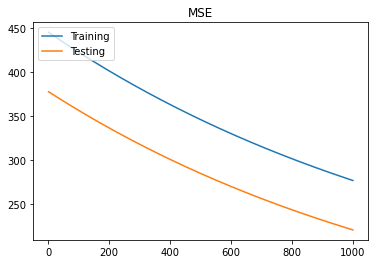

In [42]:
fig1 = plt.figure(1)
x=np.linspace(1,epo,epo)
plt.plot(x,train_error, label = 'Training')
plt.plot(x,test_error, label ='Testing')
plt.legend(loc = 2)
plt.title('MSE')

plt.show()

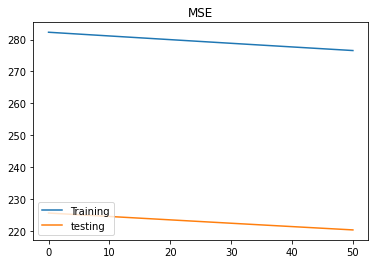

In [43]:
error1=np.zeros(50)
error2=np.zeros(50)
for i in range (0,50):
    error1[i]=train_error[epo-51+i]
    error2[i]=test_error[epo-51+i]

fig1 = plt.figure(1)
x = np.linspace(0 , 50 , 50)
plt.plot(x , error1 , label = 'Training')
plt.plot(x , error2 , label = 'testing')
plt.legend(loc = 3)
plt.title('MSE')

plt.show()

## LBFGS

### 96hr beta0 beta1

#### data

In [131]:
###
#cal_PMf  
###
u=np.zeros([274,6816])
for i in range (0,274):
    a=np.array(data['cal_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            a[j]=np.nan
    u[i]=a.T
###
#obs_PMf
###
v=np.zeros([274,6816])
for i in range (0,274):
    a=np.array(data['obs_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            a[j]=np.nan
    v[i]=a.T

print(np.shape(u))
print(np.shape(v))

(274, 6816)
(274, 6816)


In [132]:
XRestruct=sinkr.dineof(u)
YRestruct=sinkr.dineof(v)

[1]
 "1 EOF ; RMS = 9.74957301"


[1]
 "1 EOF ; RMS = 9.73914049"


[1]
 "1 EOF ; RMS = 9.73814398"


[1]
 "1 EOF ; RMS = 9.73786711"


[1]
 "1 EOF ; RMS = 9.73778425"


[1]
 "1 EOF ; RMS = 9.7377575"


[1]
 "1 EOF ; RMS = 9.73774835"


[1]
 "2 EOF ; RMS = 8.93623753"


[1]
 "2 EOF ; RMS = 8.93838926"


[1]
 "3 EOF ; RMS = 8.64027498"


[1]
 "3 EOF ; RMS = 8.64200283"


[1]
 "4 EOF ; RMS = 8.46150039"


[1]
 "4 EOF ; RMS = 8.46981014"


[1]
 "5 EOF ; RMS = 8.30705018"


[1]
 "5 EOF ; RMS = 8.32068537"


[1]
 "6 EOF ; RMS = 8.20587203"


[1]
 "6 EOF ; RMS = 8.21997545"


[1]
 "7 EOF ; RMS = 8.12027772"


[1]
 "7 EOF ; RMS = 8.12781688"


[1]
 "8 EOF ; RMS = 8.04824432"


[1]
 "8 EOF ; RMS = 8.06491793"


[1]
 "9 EOF ; RMS = 7.97966311"


[1]
 "9 EOF ; RMS = 7.9897901"


[1]
 "10 EOF ; RMS = 7.95043394"


[1]
 "10 EOF ; RMS = 7.96907657"


[1]
 "11 EOF ; RMS = 7.96254413"


[1]
 "11 EOF ; RMS = 7.99205573"


[1]
 "12 EOF ; RMS = 7.94598629"


[1]
 "12 EOF ; RMS = 7.97063327"


[1]
 "13 E

In [133]:
XRestruct_Fun=np.array(XRestruct[0])
YRestruct_Fun=np.array(YRestruct[0])
print(type(XRestruct_Fun))
print(type(YRestruct_Fun))
print(np.shape(XRestruct_Fun))
print(np.shape(YRestruct_Fun))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(274, 6816)
(274, 6816)


In [134]:
Xhat=XRestruct_Fun
Yhat=YRestruct_Fun
Xhat_train = np.zeros([244,6816])
Yhat_train = np.zeros([244,6816])
Xhat_test = np.zeros([30,6816])
Yhat_test = np.zeros([30,6816])
for i in range (0,244):
    for j in range (0,6816):
        Xhat_train[i][j] = Xhat[i][j]
        Yhat_train[i][j] = Yhat[i][j]
for i in range (244,274):
    for j in range (0,6816):
        Xhat_test[i-244][j] = Xhat[i][j]
        Yhat_test[i-244][j] = Yhat[i][j]
print('Xhat_train')
#print(Xhat_train)
print(np.shape(Xhat_train))
print('Yhat_train')
#print(Yhat_train)
print(np.shape(Yhat_train))
print('Xhat_test')
#print(Xhat_test)
print(np.shape(Xhat_test))
print('Yhat_test')
#print(Yhat_test)
print(np.shape(Yhat_test))

Xhat_train
(244, 6816)
Yhat_train
(244, 6816)
Xhat_test
(30, 6816)
Yhat_test
(30, 6816)


#### Pytorch

In [135]:
x = Xhat_train
y = Yhat_train
xt = Xhat_test
yt = Yhat_test

In [136]:
def model (x,b0,b1):
    # y = b0 +  torch.matmul(x,b1)
    y = b0 + b1*x
    return y

In [137]:
features = torch.from_numpy(x)
targets = torch.from_numpy(y)
x_test = torch.from_numpy(xt)
y_test = torch.from_numpy(yt)

beta0 = torch.ones(6816 , requires_grad = True)
# beta0 = torch.randn([244,6816] , requires_grad = True)
beta1 = torch.ones(6816 , requires_grad = True)

rate = 1e-2
optimizer = optim.LBFGS([beta0 , beta1] , lr = rate)

epo = 201
loss = nn.MSELoss()
train_error = np.zeros(epo)
test_error = np.zeros(epo)


for epoch in range (epo):
    # yhats_train = model(features.float() , beta0 , beta1)
    # train_loss = loss(targets.float() , yhats_train)
    # train_error[epoch] = train_loss

    # optimizer.zero_grad()
    # if epoch == 0 :
    #         train_loss.backward(retain_graph=True) 
    # else :
    #     train_loss.backward()
    # # train_loss.backward() 
    # optimizer.step()    

    def closure():
        yhats_train = model(features.float() , beta0 , beta1)
        train_loss = loss(targets.float() , yhats_train)
        train_error[epoch] = train_loss
        optimizer.zero_grad()
        # if epoch == 0 :
        #     train_loss.backward(retain_graph=True) 
        # else :
        #     train_loss.backward()
        train_loss.backward(retain_graph=True) 
        return train_loss
    optimizer.step(closure)    

    yhats_test = model(x_test.float(), beta0, beta1) 
    for i in range (30):
        for j in range (6816):
            if y_test[i][j] == 0:
                yhats_test[i][j] = 0
    r = yhats_test - y_test
    test_loss = torch.mean(r*r)
    test_error[epoch] = test_loss

    if epoch <= 10 or epoch % 10 == 0:
        print(f"Epoch {epoch}, Training loss {train_error[epoch]:.4f},"
                    f" Testing loss {test_error[epoch]:.4f}")
        # print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
        #             f" Testing loss {test_loss:.4f}")
        # print('\tBeta_0 : ' , beta0.grad)
        # print('\tBeta_1 : ' , beta1.grad)
    else :
        if epoch >= epo-10 :
            print(f"Epoch {epoch}, Training loss {train_error[epoch]:.4f},"
                    f" Testing loss {test_error[epoch]:.4f}")
            # print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
            #             f" Testing loss {test_loss:.4f}")
            # print('\tBeta_0 : ' , beta0)
            # print('\tBeta_1 : ' , beta1)

Epoch 0, Training loss 144.8761, Testing loss 93.8322
Epoch 1, Training loss 132.1960, Testing loss 89.8411
Epoch 2, Training loss 123.6907, Testing loss 87.5902
Epoch 3, Training loss 117.8436, Testing loss 86.3627
Epoch 4, Training loss 113.7511, Testing loss 85.7402
Epoch 5, Training loss 110.8095, Testing loss 85.4605
Epoch 6, Training loss 108.6220, Testing loss 85.3593
Epoch 7, Training loss 106.8817, Testing loss 85.2898
Epoch 8, Training loss 105.2226, Testing loss 85.0604
Epoch 9, Training loss 103.1562, Testing loss 84.2860
Epoch 10, Training loss 100.0861, Testing loss 82.2087
Epoch 20, Training loss 83.8941, Testing loss 61.5892
Epoch 30, Training loss 83.2795, Testing loss 59.7299
Epoch 40, Training loss 83.2006, Testing loss 59.7998
Epoch 50, Training loss 83.1967, Testing loss 59.8060
Epoch 60, Training loss 83.1961, Testing loss 59.8040
Epoch 70, Training loss 83.1959, Testing loss 59.8024
Epoch 80, Training loss 83.1958, Testing loss 59.8006
Epoch 90, Training loss 83.

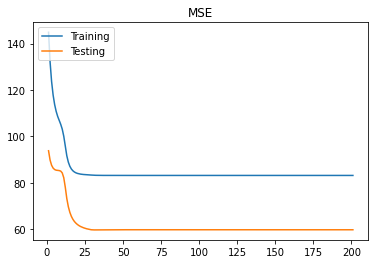

In [138]:
fig1 = plt.figure(1)
x=np.linspace(1,epo,epo)
plt.plot(x,train_error, label = 'Training')
plt.plot(x,test_error, label ='Testing')
plt.legend(loc = 2)
plt.title('MSE')

plt.show()

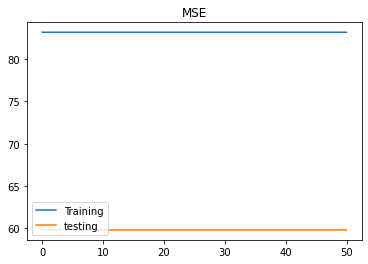

In [139]:
error1=np.zeros(50)
error2=np.zeros(50)
for i in range (0,50):
    error1[i]=train_error[epo-51+i]
    error2[i]=test_error[epo-51+i]

fig1 = plt.figure(1)
x = np.linspace(0 , 50 , 50)
plt.plot(x , error1 , label = 'Training')
plt.plot(x , error2 , label = 'testing')
plt.legend(loc = 3)
plt.title('MSE')

plt.show()

In [140]:
n_beta0 = beta0.detach().numpy()
n_beta1 = beta1.detach().numpy()

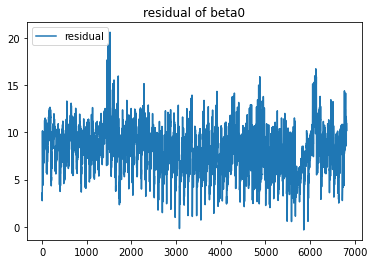

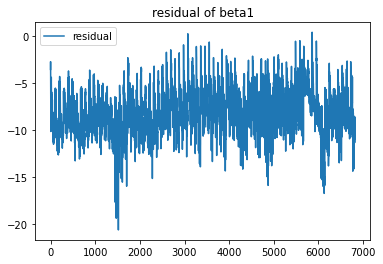

In [141]:
fig1 = plt.figure(1)
x=np.linspace(0,6816,6816)
plt.plot(x, n_beta0 - Beta0_DINEOF , label = 'residual')
plt.legend(loc = 2)
plt.title('residual of beta0')

fig2 = plt.figure(2)
x=np.linspace(0,6816,6816)
plt.plot(x, n_beta1 - Beta1_DINEOF , label = 'residual')
plt.legend(loc = 2)
plt.title('residual of beta1')

plt.show()

### 24+96hr beta0 beta1

#### data

In [142]:
x1=np.zeros([273,1704])
x2=np.zeros([273,6816])

#x1 (0th~1703th column as x)
for i in range (0,273):
    for j in range (0,71):
        a=np.array(data['obs_PMf'][6816*i+96*j:6816*i+96*j+24])
        for k in range (0,24):
            if a[k]=='\\N' :
                a[k]=np.nan
        for k in range (0,24):
            x1[i][j*24+k]=a[k]

#x2 (1704th~8519th column as x)
for i in range (1,274):
    b=np.array(data['cal_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if b[j]=='\\N' :
            b[j]=np.nan
    for j in range(0,6816):
        x2[i-1][j]=b[j]
        
print(np.shape(x1))
print(np.shape(x2))

(273, 1704)
(273, 6816)


In [143]:
x1Restruct=sinkr.dineof(x1)
x2Restruct=sinkr.dineof(x2)

[1]
 "1 EOF ; RMS = 6.93807797"


[1]
 "1 EOF ; RMS = 6.91299853"


[1]
 "1 EOF ; RMS = 6.91410194"


[1]
 "2 EOF ; RMS = 6.15294179"


[1]
 "2 EOF ; RMS = 6.15549655"


[1]
 "3 EOF ; RMS = 5.74593403"


[1]
 "3 EOF ; RMS = 5.74936953"


[1]
 "4 EOF ; RMS = 5.47024715"


[1]
 "4 EOF ; RMS = 5.47261674"


[1]
 "5 EOF ; RMS = 5.20962932"


[1]
 "5 EOF ; RMS = 5.21010779"


[1]
 "6 EOF ; RMS = 5.06287939"


[1]
 "6 EOF ; RMS = 5.06447481"


[1]
 "7 EOF ; RMS = 4.97673266"


[1]
 "7 EOF ; RMS = 4.98357834"


[1]
 "8 EOF ; RMS = 4.91778846"


[1]
 "8 EOF ; RMS = 4.92339856"


[1]
 "9 EOF ; RMS = 4.84403766"


[1]
 "9 EOF ; RMS = 4.84622135"


[1]
 "10 EOF ; RMS = 4.77591004"


[1]
 "10 EOF ; RMS = 4.778027"


[1]
 "11 EOF ; RMS = 4.72089706"


[1]
 "11 EOF ; RMS = 4.72489611"


[1]
 "12 EOF ; RMS = 4.72929338"


[1]
 "1 EOF ; RMS = 9.65838475"


[1]
 "1 EOF ; RMS = 9.65013578"


[1]
 "1 EOF ; RMS = 9.64963723"


[1]
 "1 EOF ; RMS = 9.64951986"


[1]
 "1 EOF ; RMS = 9.64948318"


[1]
 "1 EOF

In [144]:
x1Restruct_Fun=np.array(x1Restruct[0])
x2Restruct_Fun=np.array(x2Restruct[0])
print(np.shape(x1Restruct_Fun))
print(np.shape(x2Restruct_Fun))

(273, 1704)
(273, 6816)


In [145]:
YRestruct_Fun=np.zeros([269,6816])
for i in range (0,269):
    for j in range (0,1704):
        YRestruct_Fun[i][j]=x1Restruct_Fun[i+1][j]
    for j in range (1704,3408):
        YRestruct_Fun[i][j]=x1Restruct_Fun[i+2][j-1704]
    for j in range (3408,5112):
        YRestruct_Fun[i][j]=x1Restruct_Fun[i+3][j-3408]
    for j in range (5112,6816):
        YRestruct_Fun[i][j]=x1Restruct_Fun[i+4][j-5112]
print(np.shape(YRestruct_Fun))

(269, 6816)


In [146]:
XRestruct_Fun=np.zeros([269,8520])
for i in range (0,269):
    for j in range (0,1704):
        XRestruct_Fun[i][j]=x1Restruct_Fun[i][j]
    for j in range (1704,8520):
        XRestruct_Fun[i][j]=x2Restruct_Fun[i][j-1704]
print(np.shape(XRestruct_Fun))

(269, 8520)


In [147]:
Xhat=XRestruct_Fun
Yhat=YRestruct_Fun
Xhat_train = np.zeros([244,8520])
Yhat_train = np.zeros([244,6816])
Xhat_test = np.zeros([25,8520])
Yhat_test = np.zeros([25,6816])
for i in range (0,244):
    for j in range (0,8520):
        Xhat_train[i][j] = Xhat[i][j]
    for j in range (0,6816):    
        Yhat_train[i][j] = Yhat[i][j]
for i in range (244,269):
    for j in range (0,8520):
        Xhat_test[i-244][j] = Xhat[i][j]
    for j in range (0,6816):
        Yhat_test[i-244][j] = Yhat[i][j]
print('Xhat_train')
#print(Xhat_train)
print(np.shape(Xhat_train))
print('Yhat_train')
#print(Yhat_train)
print(np.shape(Yhat_train))
print('Xhat_test')
#print(Xhat_test)
print(np.shape(Xhat_test))
print('Yhat_test')
#print(Yhat_test)
print(np.shape(Yhat_test))

Xhat_train
(244, 8520)
Yhat_train
(244, 6816)
Xhat_test
(25, 8520)
Yhat_test
(25, 6816)


#### Pytorch

In [148]:
x = Xhat_train
y = Yhat_train
xt = Xhat_test
yt = Yhat_test

In [149]:
def model (x,b0,b1):
    y_8520 = b0 + b1*x
    y = y_8520[ : , 1704: ]
    return y

In [150]:
features = torch.from_numpy(x)
targets = torch.from_numpy(y)
x_test = torch.from_numpy(xt)
y_test = torch.from_numpy(yt)

beta0 = torch.ones(8520 , requires_grad = True)
beta1 = torch.ones(8520 , requires_grad = True)

rate = 1e-2
optimizer = optim.LBFGS([beta0 , beta1] , lr = rate)

epo = 201
loss = nn.MSELoss()
train_error = np.zeros(epo)
test_error = np.zeros(epo)


for epoch in range (epo):
    # yhats_train = model(features.float() , beta0 , beta1)
    # train_loss = loss(targets.float() , yhats_train)
    # train_error[epoch] = train_loss

    # optimizer.zero_grad()
    # if epoch == 0 :
    #         train_loss.backward(retain_graph=True) 
    # else :
    #     train_loss.backward()
    # # train_loss.backward() 
    # optimizer.step()    

    def closure():
        yhats_train = model(features.float() , beta0 , beta1)
        train_loss = loss(targets.float() , yhats_train)
        train_error[epoch] = train_loss
        optimizer.zero_grad()
        # if epoch == 0 :
        #     train_loss.backward(retain_graph=True) 
        # else :
        #     train_loss.backward()
        train_loss.backward(retain_graph=True) 
        return train_loss
    optimizer.step(closure)    

    yhats_test = model(x_test.float(), beta0, beta1) 
    for i in range (25):
        for j in range (6816):
            if y_test[i][j] == 0:
                yhats_test[i][j] = 0
    r = yhats_test - y_test
    test_loss = torch.mean(r*r)
    test_error[epoch] = test_loss

    if epoch <= 10 or epoch % 10 == 0:
        print(f"Epoch {epoch}, Training loss {train_error[epoch]:.4f},"
                    f" Testing loss {test_error[epoch]:.4f}")
        # print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
        #             f" Testing loss {test_loss:.4f}")
        # print('\tBeta_0 : ' , beta0.grad)
        # print('\tBeta_1 : ' , beta1.grad)
    else :
        if epoch >= epo-10 :
            print(f"Epoch {epoch}, Training loss {train_error[epoch]:.4f},"
                        f" Testing loss {test_error[epoch]:.4f}")
            # print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
            #             f" Testing loss {test_loss:.4f}")
            # print('\tBeta_0 : ' , beta0)
            # print('\tBeta_1 : ' , beta1)

Epoch 0, Training loss 193.1277, Testing loss 116.9084
Epoch 1, Training loss 173.3116, Testing loss 108.7630
Epoch 2, Training loss 159.9772, Testing loss 103.8555
Epoch 3, Training loss 150.8415, Testing loss 100.9305
Epoch 4, Training loss 144.4756, Testing loss 99.2227
Epoch 5, Training loss 139.9331, Testing loss 98.2467
Epoch 6, Training loss 136.5546, Testing loss 97.6918
Epoch 7, Training loss 133.9236, Testing loss 97.3193
Epoch 8, Training loss 131.5129, Testing loss 96.8599
Epoch 9, Training loss 128.6704, Testing loss 95.8628
Epoch 10, Training loss 124.5738, Testing loss 93.4719
Epoch 20, Training loss 99.4996, Testing loss 65.9877
Epoch 30, Training loss 98.4792, Testing loss 63.6687
Epoch 40, Training loss 98.4192, Testing loss 63.3876
Epoch 50, Training loss 98.4182, Testing loss 63.3635
Epoch 60, Training loss 98.4176, Testing loss 63.3490
Epoch 70, Training loss 98.4171, Testing loss 63.3453
Epoch 80, Training loss 98.4169, Testing loss 63.3469
Epoch 90, Training loss

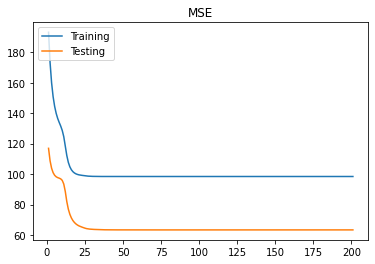

In [151]:
fig1 = plt.figure(1)
x=np.linspace(1,epo,epo)
plt.plot(x,train_error, label = 'Training')
plt.plot(x,test_error, label ='Testing')
plt.legend(loc = 2)
plt.title('MSE')

plt.show()

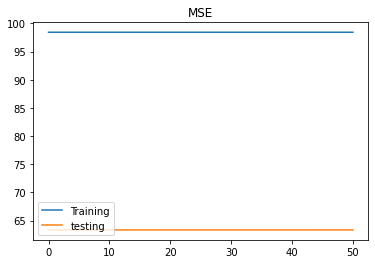

In [152]:
error1=np.zeros(50)
error2=np.zeros(50)
for i in range (0,50):
    error1[i]=train_error[epo-51+i]
    error2[i]=test_error[epo-51+i]

fig1 = plt.figure(1)
x = np.linspace(0 , 50 , 50)
plt.plot(x , error1 , label = 'Training')
plt.plot(x , error2 , label = 'testing')
plt.legend(loc = 3)
plt.title('MSE')

plt.show()

### 24+96hr beta0 beta1 beta2

#### data

In [12]:
x1=np.zeros([273,1704])
x2=np.zeros([273,6816])

#x1 (0th~1703th column as x)
for i in range (0,273):
    for j in range (0,71):
        a=np.array(data['obs_PMf'][6816*i+96*j:6816*i+96*j+24])
        for k in range (0,24):
            if a[k]=='\\N' :
                a[k]=np.nan
        for k in range (0,24):
            x1[i][j*24+k]=a[k]

#x2 (1704th~8519th column as x)
for i in range (1,274):
    b=np.array(data['cal_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if b[j]=='\\N' :
            b[j]=np.nan
    for j in range(0,6816):
        x2[i-1][j]=b[j]
        
print(np.shape(x1))
print(np.shape(x2))

(273, 1704)
(273, 6816)


In [13]:
x1Restruct=sinkr.dineof(x1)
x2Restruct=sinkr.dineof(x2)

[1]
 "1 EOF ; RMS = 7.65558915"


[1]
 "1 EOF ; RMS = 7.59764967"


[1]
 "1 EOF ; RMS = 7.59572881"


[1]
 "1 EOF ; RMS = 7.59558619"


[1]
 "1 EOF ; RMS = 7.59556969"


[1]
 "1 EOF ; RMS = 7.59556697"


[1]
 "2 EOF ; RMS = 6.80930628"


[1]
 "2 EOF ; RMS = 6.80791509"


[1]
 "2 EOF ; RMS = 6.80831852"


[1]
 "3 EOF ; RMS = 6.43019458"


[1]
 "3 EOF ; RMS = 6.42930371"


[1]
 "3 EOF ; RMS = 6.42884849"


[1]
 "3 EOF ; RMS = 6.42869287"


[1]
 "3 EOF ; RMS = 6.42864889"


[1]
 "3 EOF ; RMS = 6.42863652"


[1]
 "3 EOF ; RMS = 6.42863289"


[1]
 "4 EOF ; RMS = 6.120775"


[1]
 "4 EOF ; RMS = 6.11858527"


[1]
 "4 EOF ; RMS = 6.11885659"


[1]
 "5 EOF ; RMS = 5.9277898"


[1]
 "5 EOF ; RMS = 5.92867763"


[1]
 "6 EOF ; RMS = 5.82519844"


[1]
 "6 EOF ; RMS = 5.82742878"


[1]
 "7 EOF ; RMS = 5.75675933"


[1]
 "7 EOF ; RMS = 5.76293146"


[1]
 "8 EOF ; RMS = 5.70421188"


[1]
 "8 EOF ; RMS = 5.70452283"


[1]
 "9 EOF ; RMS = 5.62794638"


[1]
 "9 EOF ; RMS = 5.62847937"


[1]
 "10 EOF ; RM

In [14]:
x1Restruct_Fun=np.array(x1Restruct[0])
x2Restruct_Fun=np.array(x2Restruct[0])
print(np.shape(x1Restruct_Fun))
print(np.shape(x2Restruct_Fun))

(273, 1704)
(273, 6816)


In [15]:
YRestruct_Fun=np.zeros([269,6816])
for i in range (0,269):
    for j in range (0,1704):
        YRestruct_Fun[i][j]=x1Restruct_Fun[i+1][j]
    for j in range (1704,3408):
        YRestruct_Fun[i][j]=x1Restruct_Fun[i+2][j-1704]
    for j in range (3408,5112):
        YRestruct_Fun[i][j]=x1Restruct_Fun[i+3][j-3408]
    for j in range (5112,6816):
        YRestruct_Fun[i][j]=x1Restruct_Fun[i+4][j-5112]
print(np.shape(YRestruct_Fun))

(269, 6816)


In [16]:
XRestruct_Fun=np.zeros([269,8520])
for i in range (0,269):
    for j in range (0,1704):
        XRestruct_Fun[i][j]=x1Restruct_Fun[i][j]
    for j in range (1704,8520):
        XRestruct_Fun[i][j]=x2Restruct_Fun[i][j-1704]
print(np.shape(XRestruct_Fun))

(269, 8520)


In [17]:
Xhat=XRestruct_Fun
Yhat=YRestruct_Fun
X1hat_train = np.zeros([244,1704])
X2hat_train = np.zeros([244,6816])
Yhat_train = np.zeros([244,6816])
X1hat_test = np.zeros([25,1704])
X2hat_test = np.zeros([25,6816])
Yhat_test = np.zeros([25,6816])
for i in range (0,244):
    for j in range (0,1704):
        X1hat_train[i][j] = Xhat[i][j]
    for j in range (0,6816):    
        X2hat_train[i][j] = Xhat[i][j]
        Yhat_train[i][j] = Yhat[i][j]
for i in range (244,269):
    for j in range (0,1704):
        X1hat_test[i-244][j] = Xhat[i][j]
    for j in range (0,6816):
        X2hat_test[i-244][j] = Xhat[i][j]
        Yhat_test[i-244][j] = Yhat[i][j]
print('X1hat_train')
#print(X1hat_train)
print(np.shape(X1hat_train))
print('X2hat_train')
#print(X2hat_train)
print(np.shape(X2hat_train))
print('Yhat_train')
#print(Yhat_train)
print(np.shape(Yhat_train))
print('X1hat_test')
#print(X1hat_test)
print(np.shape(X1hat_test))
print('X2hat_test')
#print(X2hat_test)
print(np.shape(X2hat_test))
print('Yhat_test')
#print(Yhat_test)
print(np.shape(Yhat_test))

X1hat_train
(244, 1704)
X2hat_train
(244, 6816)
Yhat_train
(244, 6816)
X1hat_test
(25, 1704)
X2hat_test
(25, 6816)
Yhat_test
(25, 6816)


#### Pytorch

In [23]:
x1 = X1hat_train
x2 = X2hat_train
y = Yhat_train
xt1 = X1hat_test
xt2 = X2hat_test
yt = Yhat_test

In [26]:
def model (x1,x2,b0,b1,b2):
    y = b0 +  torch.matmul(x1,b1.T) + torch.matmul(x2,b2.T)
    # y = torch.add(b0 +  torch.matmul(x,b1))
    # y = b0 +  torch.mm(x,b1)
    # b = torch.mean(b1*x1)*torch.ones(6816)
    # y = b0 + b+ b2*x2
    return y

In [27]:
features1 = torch.from_numpy(x1)
features2 = torch.from_numpy(x2)
targets = torch.from_numpy(y)
x_test1 = torch.from_numpy(xt1)
x_test2 = torch.from_numpy(xt2)
y_test = torch.from_numpy(yt)

beta0 = torch.randn(6816 , requires_grad = True)
beta1 = torch.ones([6816,1704] , requires_grad = True)
beta2 = torch.ones([6816,6816] , requires_grad = True)


rate = 1e-2
optimizer = optim.LBFGS([beta0 , beta1 , beta2] , lr=rate)
# optimizer = optim.Adam([beta0 , beta1 , beta2], lr=rate)

epo = 201
loss = nn.MSELoss()
train_error = np.zeros(epo)
test_error = np.zeros(epo)

for epoch in range (epo):
    def closure():
        yhats_train = model(features1.float() , features2.float(), beta0 , beta1 , beta2)
        train_loss = loss(targets.float() , yhats_train)
        train_error[epoch] = train_loss
        optimizer.zero_grad()
        train_loss.backward(retain_graph=True)
        return train_loss
    optimizer.step(closure)    

    yhats_test = model(x_test1.float(), x_test2.float() , beta0, beta1 , beta2) 
    for i in range (25):
        for j in range (6816):
            if y_test[i][j] == 0:
                yhats_test[i][j] = 0
    r = yhats_test - y_test
    test_loss = torch.mean(r*r)
    test_error[epoch] = test_loss

    if epoch <= 10 or epoch % 10 == 0:
        print(f"Epoch {epoch}, Training loss {train_error[epoch]:.4f},"
                    f" Testing loss {test_error[epoch]:.4f}")
        # print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
        #             f" Testing loss {test_loss.item():.4f}")

        # print('\tBeta_0 : ' , beta0)
        # print('\tBeta_1 : ' , beta1)
        # print('\tBeta_2 : ' , beta2)       
    else :
        if epoch >= epo-10 :
            print(f"Epoch {epoch}, Training loss {train_error[epoch]:.4f},"
                        f" Testing loss {test_error[epoch]:.4f}")
            # print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
            #             f" Testing loss {test_loss.item():.4f}")
            # print('\tBeta_0 : ' , beta0)
            # print('\tBeta_1 : ' , beta1)
            # print('\tBeta_2 : ' , beta2)       

Epoch 0, Training loss 20884508672.0000, Testing loss 17471225399.8691


In [161]:
features1 = torch.from_numpy(x1)
features2 = torch.from_numpy(x2)
targets = torch.from_numpy(y)
x_test1 = torch.from_numpy(xt1)
x_test2 = torch.from_numpy(xt2)
y_test = torch.from_numpy(yt)

beta0 = torch.ones(6816 , requires_grad = True)
beta1 = torch.ones(1704, requires_grad = True)
beta2 = torch.ones(6816 , requires_grad = True)

# rate = 1
rate = 1e-2
optimizer = optim.LBFGS([beta0 , beta1 , beta2] , lr=rate)
# optimizer = optim.Adam([beta0 , beta1 , beta2], lr=rate)
# optimizer = optim.SGD([beta0 , beta1 , beta2], lr=rate)

epo = 201
loss = nn.MSELoss()
train_error = np.zeros(epo)
test_error = np.zeros(epo)

for epoch in range (epo):
    # yhats_train = model(features.float() , beta0 , beta1)
    # train_loss = loss(targets.float() , yhats_train)
    # train_error[epoch] = train_loss

    # optimizer.zero_grad()
    # if epoch == 0 :
    #         train_loss.backward(retain_graph=True) 
    # else :
    #     train_loss.backward()
    # # train_loss.backward() 
    # optimizer.step()    

    def closure():
        yhats_train = model(features1.float() , features2.float(), beta0 , beta1 , beta2)
        train_loss = loss(targets.float() , yhats_train)
        train_error[epoch] = train_loss
        optimizer.zero_grad()
        # if epoch == epo-1 :
        #     train_loss.backward() 
        # else :
        #     train_loss.backward(retain_graph=True)
        train_loss.backward(retain_graph=True)
        return train_loss
    optimizer.step(closure)    

    yhats_test = model(x_test1.float(), x_test2.float() , beta0, beta1 , beta2) 
    for i in range (25):
        for j in range (6816):
            if y_test[i][j] == 0:
                yhats_test[i][j] = 0
    r = yhats_test - y_test
    test_loss = torch.mean(r*r)
    test_error[epoch] = test_loss

    if epoch <= 10 or epoch % 10 == 0:
        print(f"Epoch {epoch}, Training loss {train_error[epoch]:.4f},"
                    f" Testing loss {test_error[epoch]:.4f}")
        # print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
        #             f" Testing loss {test_loss.item():.4f}")

        # print('\tBeta_0 : ' , beta0)
        # print('\tBeta_1 : ' , beta1)
        # print('\tBeta_2 : ' , beta2)       
    else :
        if epoch >= epo-10 :
            print(f"Epoch {epoch}, Training loss {train_error[epoch]:.4f},"
                        f" Testing loss {test_error[epoch]:.4f}")
            # print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
            #             f" Testing loss {test_loss.item():.4f}")
            # print('\tBeta_0 : ' , beta0)
            # print('\tBeta_1 : ' , beta1)
            # print('\tBeta_2 : ' , beta2)       

Epoch 0, Training loss 330.2781, Testing loss 267.4020
Epoch 1, Training loss 253.4617, Testing loss 201.0417
Epoch 2, Training loss 201.9333, Testing loss 156.6543
Epoch 3, Training loss 167.4420, Testing loss 126.8075
Epoch 4, Training loss 144.3541, Testing loss 106.6794
Epoch 5, Training loss 128.8954, Testing loss 93.0743
Epoch 6, Training loss 118.5406, Testing loss 83.8555
Epoch 7, Training loss 111.6001, Testing loss 77.5902
Epoch 8, Training loss 106.9440, Testing loss 73.3163
Epoch 9, Training loss 103.8161, Testing loss 70.3871
Epoch 10, Training loss 101.7101, Testing loss 68.3676
Epoch 20, Training loss 96.7773, Testing loss 63.0527
Epoch 30, Training loss 94.9172, Testing loss 61.9992
Epoch 40, Training loss 94.8396, Testing loss 62.0338
Epoch 50, Training loss 94.8359, Testing loss 62.0388
Epoch 60, Training loss 94.8355, Testing loss 62.0400
Epoch 70, Training loss 94.8352, Testing loss 62.0408
Epoch 80, Training loss 94.8350, Testing loss 62.0411
Epoch 90, Training los

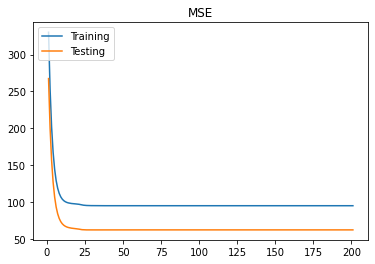

In [162]:
fig1 = plt.figure(1)
x=np.linspace(1,epo,epo)
plt.plot(x,train_error, label = 'Training')
plt.plot(x,test_error, label ='Testing')
plt.legend(loc = 2)
plt.title('MSE')

plt.show()

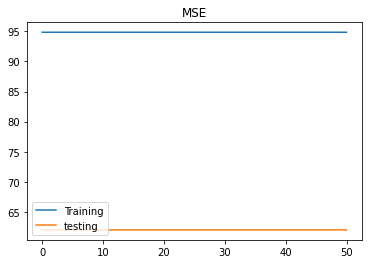

In [163]:
error1=np.zeros(50)
error2=np.zeros(50)
for i in range (0,50):
    error1[i]=train_error[epo-51+i]
    error2[i]=test_error[epo-51+i]

fig1 = plt.figure(1)
x = np.linspace(0 , 50 , 50)
plt.plot(x , error1 , label = 'Training')
plt.plot(x , error2 , label = 'testing')
plt.legend(loc = 3)
plt.title('MSE')

plt.show()

## Pytorch Example (96hr b0 b1)

### data

In [4]:
###
#cal_PMf  
###
u=np.zeros([274,6816])
for i in range (0,274):
    a=np.array(data['cal_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            a[j]=np.nan
    u[i]=a.T
###
#obs_PMf
###
v=np.zeros([274,6816])
for i in range (0,274):
    a=np.array(data['obs_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            a[j]=np.nan
    v[i]=a.T

print(np.shape(u))
print(np.shape(v))

(274, 6816)
(274, 6816)


In [5]:
XRestruct=sinkr.dineof(u)
YRestruct=sinkr.dineof(v)

[1]
 "1 EOF ; RMS = 9.70651403"


[1]
 "1 EOF ; RMS = 9.70653391"


[1]
 "2 EOF ; RMS = 8.84377854"


[1]
 "2 EOF ; RMS = 8.8427794"


[1]
 "2 EOF ; RMS = 8.84267253"


[1]
 "2 EOF ; RMS = 8.84264289"


[1]
 "2 EOF ; RMS = 8.84263491"


[1]
 "3 EOF ; RMS = 8.62199383"


[1]
 "3 EOF ; RMS = 8.62871974"


[1]
 "4 EOF ; RMS = 8.42319364"


[1]
 "4 EOF ; RMS = 8.43146676"


[1]
 "5 EOF ; RMS = 8.25705156"


[1]
 "5 EOF ; RMS = 8.26770287"


[1]
 "6 EOF ; RMS = 8.1193946"


[1]
 "6 EOF ; RMS = 8.12849956"


[1]
 "7 EOF ; RMS = 8.07021818"


[1]
 "7 EOF ; RMS = 8.07920257"


[1]
 "8 EOF ; RMS = 8.04397717"


[1]
 "8 EOF ; RMS = 8.06398512"


[1]
 "9 EOF ; RMS = 8.04974283"


[1]
 "9 EOF ; RMS = 8.07885911"


[1]
 "10 EOF ; RMS = 8.05564138"


[1]
 "10 EOF ; RMS = 8.07818171"


[1]
 "11 EOF ; RMS = 8.07523661"


[1]
 "11 EOF ; RMS = 8.1041931"


[1]
 "12 EOF ; RMS = 8.07780954"


[1]
 "12 EOF ; RMS = 8.0976004"


[1]
 "13 EOF ; RMS = 8.04856157"


[1]
 "13 EOF ; RMS = 8.06149616"


[1]
 "14 E

In [6]:
XRestruct_Fun=np.array(XRestruct[0])
YRestruct_Fun=np.array(YRestruct[0])
print(type(XRestruct_Fun))
print(type(YRestruct_Fun))
print(np.shape(XRestruct_Fun))
print(np.shape(YRestruct_Fun))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(274, 6816)
(274, 6816)


In [7]:
Xhat=XRestruct_Fun
Yhat=YRestruct_Fun
Xhat_train = np.zeros([244,6816])
Yhat_train = np.zeros([244,6816])
Xhat_test = np.zeros([30,6816])
Yhat_test = np.zeros([30,6816])
for i in range (0,244):
    for j in range (0,6816):
        Xhat_train[i][j] = Xhat[i][j]
        Yhat_train[i][j] = Yhat[i][j]
for i in range (244,274):
    for j in range (0,6816):
        Xhat_test[i-244][j] = Xhat[i][j]
        Yhat_test[i-244][j] = Yhat[i][j]
print('Xhat_train')
#print(Xhat_train)
print(np.shape(Xhat_train))
print('Yhat_train')
#print(Yhat_train)
print(np.shape(Yhat_train))
print('Xhat_test')
#print(Xhat_test)
print(np.shape(Xhat_test))
print('Yhat_test')
#print(Yhat_test)
print(np.shape(Yhat_test))

Xhat_train
(244, 6816)
Yhat_train
(244, 6816)
Xhat_test
(30, 6816)
Yhat_test
(30, 6816)


### Pytorch

In [15]:
x = Xhat_train
y = Yhat_train
xt = Xhat_test
yt = Yhat_test

In [16]:
def model (x,b0,b1):
    y = b0 +  torch.matmul(x,b1)
    # y = torch.add(b0 +  torch.matmul(x,b1))
    # y = b0 +  torch.mm(x,b1)
    return y

# def loss (y_true,y_hat):
#     r = y_true - y_hat
#     return torch.mean(r*r)

In [22]:
features = torch.from_numpy(x)
targets = torch.from_numpy(y)
x_test = torch.from_numpy(xt)
y_test = torch.from_numpy(yt)

beta0 = torch.randn(6816 , requires_grad = True)
# beta0 = torch.randn([244,6816] , requires_grad = True)
beta1 = torch.randn([6816,6816] , requires_grad = True)

rate = 1e-2
# optimizer = optim.LBFGS([beta0 , beta1] , lr = rate)
optimizer = optim.Adam([beta0 , beta1], lr=rate)
# optimizer = optim.SGD([beta0 , beta1], lr=rate)

epo = 501
loss = nn.MSELoss()
train_error = np.zeros(epo)
test_error = np.zeros(epo)


for epoch in range (epo):
    yhats_train = model(features.float() , beta0 , beta1)
    train_loss = loss(targets.float() , yhats_train)
    train_error[epoch] = train_loss

    optimizer.zero_grad()
    train_loss.backward() 
    optimizer.step()    

    yhats_test = model(x_test.float(), beta0, beta1) 
    for i in range (30):
        for j in range (6816):
            if y_test[i][j] == 0:
                yhats_test[i][j] = 0
    r = yhats_test - y_test
    test_loss = torch.mean(r*r)
    # test_loss = loss(y_test , yhats_test)
    test_error[epoch] = test_loss

    if epoch <= 10 or epoch % 10 == 0:
        print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
                    f" Testing loss {test_loss.item():.4f}")
        # print('\tBeta_0 : ' , beta0)
        # print('\tBeta_1 : ' , beta1)
    else :
        if epoch >= epo-10 :
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
                        f" Testing loss {test_loss.item():.4f}")
            # print('\tBeta_0 : ' , beta0)
            # print('\tBeta_1 : ' , beta1)

Epoch 0, Training loss 2841140.2500, Testing loss 886336.8967
Epoch 1, Training loss 1400038.2500, Testing loss 635546.2069
Epoch 2, Training loss 1019800.4375, Testing loss 711614.3999
Epoch 3, Training loss 1100439.7500, Testing loss 787712.0915
Epoch 4, Training loss 1190672.7500, Testing loss 747472.4551
Epoch 5, Training loss 1126769.2500, Testing loss 655960.9961
Epoch 6, Training loss 994825.6250, Testing loss 586731.3644
Epoch 7, Training loss 893838.8750, Testing loss 549901.7034
Epoch 8, Training loss 836840.5000, Testing loss 515670.1338
Epoch 9, Training loss 782872.5625, Testing loss 475234.8512
Epoch 10, Training loss 720005.6875, Testing loss 444749.2873
Epoch 20, Training loss 484405.4688, Testing loss 344886.1798
Epoch 30, Training loss 367068.5000, Testing loss 300621.0941
Epoch 40, Training loss 300413.2500, Testing loss 279464.0540
Epoch 50, Training loss 255702.5469, Testing loss 266957.4460
Epoch 60, Training loss 222824.7969, Testing loss 259401.5292
Epoch 70, Tr

In [290]:
# def training_loop(epochs, optimizer, params, train_x, test_x, train_y, test_y):
def training_loop(epochs, optimizer, b0, b1, train_x, test_x, train_y, test_y):
# def training_loop(epochs, optimizer, b0, b1, train_x, train_y):
    # train_error = np.zeros(epochs)
    # test_error = np.zeros(epochs)
    for epoch in range(1, epochs + 1):
        # yhats_train = model(train_x, *params) 
        yhats_train = model(train_x.float(), b0, b1)
        train_loss = loss(yhats_train, train_y)
        train_error[epoch-1] = train_loss
                             
        # yhats_test = model(test_x, *params) 
        yhats_test = model(test_x.float(), b0, b1) 
        test_loss = loss(yhats_test, test_y)
        test_error[epoch-1] = test_loss
        
        optimizer.zero_grad()
        train_loss.backward() 
        optimizer.step()

        if epoch <= 5 or epoch % 100 == 0:
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
                  f" Testing loss {test_loss.item():.4f}")
            # print('\tBeta_0 : ' , b0.grad)
            # print('\tBeta_1 : ' , b1.grad)
        if epoch >= epochs-5 :
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
                  f" Testing loss {test_loss.item():.4f}")
            # print('\tBeta_0 : ' , b0)
            # print('\tBeta_1 : ' , b1)
            
    # return params
    return b0 , b1

In [291]:
features = torch.from_numpy(x)
targets = torch.from_numpy(y)
x_test = torch.from_numpy(xt)
y_test = torch.from_numpy(yt)

beta0 = torch.randn(6816 , requires_grad = True)
beta1 = torch.randn([6816,6816] , requires_grad = True)

learning_rate = 1e-2
optimizer = optim.Adam([beta0 , beta1], lr=learning_rate)
# optimizer = optim.SGD([beta0 , beta1], lr=learning_rate)

train_error = np.zeros(2000)
test_error = np.zeros(2000)

training_loop(
    epochs = 2000, 
    optimizer = optimizer,
    b0 = beta0,
    b1 = beta1,
    train_x = features , 
    test_x = x_test, 
    train_y = targets,
    test_y = y_test)

Epoch 1, Training loss 2917455.0292, Testing loss 1989721.9421
Epoch 2, Training loss 1426917.6925, Testing loss 917965.7944
Epoch 3, Training loss 1019078.7308, Testing loss 636067.9806
Epoch 4, Training loss 1102323.3086, Testing loss 711629.2906
Epoch 5, Training loss 1203926.5749, Testing loss 797461.8430
Epoch 100, Training loss 145902.8075, Testing loss 245354.2342
Epoch 200, Training loss 65104.3795, Testing loss 227256.4254
Epoch 300, Training loss 34716.8063, Testing loss 219434.6708
Epoch 400, Training loss 20144.8804, Testing loss 215249.7598
Epoch 500, Training loss 12308.1455, Testing loss 212799.2503
Epoch 600, Training loss 7810.5727, Testing loss 211298.5585
Epoch 700, Training loss 5094.6774, Testing loss 210261.8930
Epoch 800, Training loss 3403.2579, Testing loss 209616.2830
Epoch 900, Training loss 2308.8026, Testing loss 209123.5073
Epoch 1000, Training loss 1613.7775, Testing loss 208804.4460
Epoch 1100, Training loss 1132.7843, Testing loss 208581.1396
Epoch 1200

(tensor([-1.0396,  0.1958,  0.4609,  ..., -1.2379, -0.0938,  1.2258],
        requires_grad=True),
 tensor([[-1.6363, -1.0835,  0.3218,  ...,  0.1680,  1.4571, -1.6238],
         [-0.3618, -0.9583, -1.9941,  ..., -0.1306,  0.2941,  0.5215],
         [-0.1108,  2.3087,  0.1164,  ...,  0.2971, -0.7823, -1.4653],
         ...,
         [-1.3469,  0.7460,  0.7577,  ..., -0.0985, -0.7136,  0.1346],
         [-0.1982, -2.1463,  0.4669,  ..., -0.1501,  1.2510,  0.3329],
         [ 1.2815,  1.3764, -1.0505,  ..., -0.2923,  0.3064, -0.9758]],
        requires_grad=True))

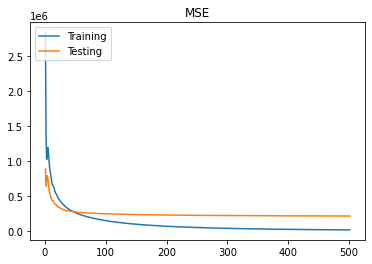

In [24]:
fig1 = plt.figure(1)
x=np.linspace(1,501,501)
plt.plot(x,train_error, label = 'Training')
plt.plot(x,test_error, label ='Testing')
plt.legend(loc = 2)
plt.title('MSE')

plt.show()

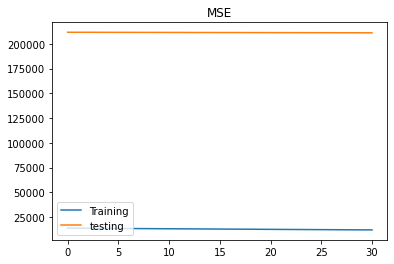

In [25]:
error1=np.zeros(30)
error2=np.zeros(30)
for i in range (0,30):
    error1[i]=train_error[471+i]
    error2[i]=test_error[471+i]

fig1 = plt.figure(1)
x = np.linspace(0 , 30 , 30)
plt.plot(x , error1 , label = 'Training')
plt.plot(x , error2 , label = 'testing')
plt.legend(loc = 3)
plt.title('MSE')

plt.show()

In [154]:
features = torch.from_numpy(x)
targets = torch.from_numpy(y)
x_test = torch.from_numpy(xt)
y_test = torch.from_numpy(yt)

beta0 = torch.randn([244,6816] , requires_grad = True)
beta1 = torch.randn([6816,6816] , requires_grad = True)

learning_rate = 1e-3
optimizer = optim.Adam([beta0 , beta1], lr=learning_rate)

train_error = np.zeros(1000)
test_error = np.zeros(1000)

for epochs in range (1000):
    yhats = model(features.float() , beta0 , beta1)
    # yhats = model(features, beta0 , beta1)
    obj = loss(targets.float() , yhats)
    # obj = loss(targets, yhats)
    error[epochs]=obj

    optimizer.zero_grad()
    obj.backward() 
    optimizer.step()

    if epoch <= 3 or epoch % 500 == 0:
        print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},")
    # with torch.no_grad():
    #     beta0 -= beta0.grad*rate
    #     beta1 -= beta1.grad*rate
    #     beta0.grad.zero_()
    #     beta1.grad.zero_()

AttributeError: 'function' object has no attribute 'backward'

In [ ]:
fig1 = plt.figure(1)
x = np.linspace(0 , 1000 , 1000)
plt.plot(x , error , label = 'error')
plt.legend(loc = 1)
plt.title('error(mse)')

plt.show()

In [ ]:
error1=np.zeros(500)
for i in range (0,500):
    error1[i]=error[499+i]

fig1 = plt.figure(1)
x = np.linspace(0 , 500 , 500)
plt.plot(x , error1 , label = 'error')
plt.legend(loc = 1)
plt.title('error(mse)')

plt.show()

# Pytorch lightning

## Data

In [5]:
x1=np.zeros([273,1704])
x2=np.zeros([273,6816])

#x1 (0th~1703th column as x)
for i in range (0,273):
    for j in range (0,71):
        a=np.array(data['obs_PMf'][6816*i+96*j:6816*i+96*j+24])
        for k in range (0,24):
            if a[k]=='\\N' :
                a[k]=np.nan
        for k in range (0,24):
            x1[i][j*24+k]=a[k]

#x2 (1704th~8519th column as x)
for i in range (1,274):
    b=np.array(data['cal_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if b[j]=='\\N' :
            b[j]=np.nan
    for j in range(0,6816):
        x2[i-1][j]=b[j]
        
print(np.shape(x1))
print(np.shape(x2))

(273, 1704)
(273, 6816)


In [6]:
x1Restruct=sinkr.dineof(x1)
x2Restruct=sinkr.dineof(x2)

[1]
 "1 EOF ; RMS = 7.33147978"


[1]
 "1 EOF ; RMS = 7.28590087"


[1]
 "1 EOF ; RMS = 7.28477349"


[1]
 "1 EOF ; RMS = 7.28462208"


[1]
 "1 EOF ; RMS = 7.28458825"


[1]
 "1 EOF ; RMS = 7.28458044"


[1]
 "2 EOF ; RMS = 6.38897805"


[1]
 "2 EOF ; RMS = 6.38296527"


[1]
 "2 EOF ; RMS = 6.38242159"


[1]
 "2 EOF ; RMS = 6.38232376"


[1]
 "2 EOF ; RMS = 6.38230368"


[1]
 "2 EOF ; RMS = 6.38229928"


[1]
 "3 EOF ; RMS = 5.94052716"


[1]
 "3 EOF ; RMS = 5.93863955"


[1]
 "3 EOF ; RMS = 5.93862334"


[1]
 "3 EOF ; RMS = 5.9386372"


[1]
 "4 EOF ; RMS = 5.58028719"


[1]
 "4 EOF ; RMS = 5.58411014"


[1]
 "5 EOF ; RMS = 5.36353501"


[1]
 "5 EOF ; RMS = 5.36439636"


[1]
 "6 EOF ; RMS = 5.24491161"


[1]
 "6 EOF ; RMS = 5.24756979"


[1]
 "7 EOF ; RMS = 5.13591394"


[1]
 "7 EOF ; RMS = 5.13801093"


[1]
 "8 EOF ; RMS = 5.05946688"


[1]
 "8 EOF ; RMS = 5.05954813"


[1]
 "9 EOF ; RMS = 4.98187907"


[1]
 "9 EOF ; RMS = 4.987267"


[1]
 "10 EOF ; RMS = 4.89881984"


[1]
 "10 EOF ; R

In [7]:
x1Restruct_Fun=np.array(x1Restruct[0])
x2Restruct_Fun=np.array(x2Restruct[0])
print(np.shape(x1Restruct_Fun))
print(np.shape(x2Restruct_Fun))

(273, 1704)
(273, 6816)


In [8]:
YRestruct_Fun=np.zeros([269,6816])
for i in range (0,269):
    for j in range (0,1704):
        YRestruct_Fun[i][j]=x1Restruct_Fun[i+1][j]
    for j in range (1704,3408):
        YRestruct_Fun[i][j]=x1Restruct_Fun[i+2][j-1704]
    for j in range (3408,5112):
        YRestruct_Fun[i][j]=x1Restruct_Fun[i+3][j-3408]
    for j in range (5112,6816):
        YRestruct_Fun[i][j]=x1Restruct_Fun[i+4][j-5112]
print(np.shape(YRestruct_Fun))

(269, 6816)


In [9]:
XRestruct_Fun=np.zeros([269,8520])
for i in range (0,269):
    for j in range (0,1704):
        XRestruct_Fun[i][j]=x1Restruct_Fun[i][j]
    for j in range (1704,8520):
        XRestruct_Fun[i][j]=x2Restruct_Fun[i][j-1704]
print(np.shape(XRestruct_Fun))

(269, 8520)


In [10]:
Xhat=XRestruct_Fun
Yhat=YRestruct_Fun
Xhat_train = np.zeros([244,8520])
Yhat_train = np.zeros([244,6816])
Xhat_test = np.zeros([25,8520])
Yhat_test = np.zeros([25,6816])
for i in range (0,244):
    for j in range (0,1704):
        Xhat_train[i][j] = Xhat[i][j]
    for j in range (0,6816):    
        Xhat_train[i][j+1704] = Xhat[i][j+1704]
        Yhat_train[i][j] = Yhat[i][j]
for i in range (244,269):
    for j in range (0,1704):
        Xhat_test[i-244][j] = Xhat[i][j]
    for j in range (0,6816):
        Xhat_test[i-244][j+1704] = Xhat[i][j+1704]
        Yhat_test[i-244][j] = Yhat[i][j]
print('Xhat_train')
print(np.shape(Xhat_train))
print('Yhat_train')
print(np.shape(Yhat_train))
print('Xhat_test')
print(np.shape(Xhat_test))
print('Yhat_test')
print(np.shape(Yhat_test))
# Xhat=XRestruct_Fun
# Yhat=YRestruct_Fun
# X1hat_train = np.zeros([244,1704])
# X2hat_train = np.zeros([244,6816])
# Yhat_train = np.zeros([244,6816])
# X1hat_test = np.zeros([25,1704])
# X2hat_test = np.zeros([25,6816])
# Yhat_test = np.zeros([25,6816])
# for i in range (0,244):
#     for j in range (0,1704):
#         X1hat_train[i][j] = Xhat[i][j]
#     for j in range (0,6816):    
#         X2hat_train[i][j] = Xhat[i][j]
#         Yhat_train[i][j] = Yhat[i][j]
# for i in range (244,269):
#     for j in range (0,1704):
#         X1hat_test[i-244][j] = Xhat[i][j]
#     for j in range (0,6816):
#         X2hat_test[i-244][j] = Xhat[i][j]
#         Yhat_test[i-244][j] = Yhat[i][j]
# print('X1hat_train')
# print(np.shape(X1hat_train))
# print('X2hat_train')
# print(np.shape(X2hat_train))
# print('Yhat_train')
# print(np.shape(Yhat_train))
# print('X1hat_test')
# print(np.shape(X1hat_test))
# print('X2hat_test')
# print(np.shape(X2hat_test))
# print('Yhat_test')
# print(np.shape(Yhat_test))

Xhat_train
(244, 8520)
Yhat_train
(244, 6816)
Xhat_test
(25, 8520)
Yhat_test
(25, 6816)


In [257]:
# x = Xhat_train
# y = Yhat_train
# xt = Xhat_test
# yt = Yhat_test

## Model

In [98]:
x_train = torch.from_numpy(Xhat_train).float()
y_train = torch.from_numpy(Yhat_train).float()
x_test = torch.from_numpy(Xhat_test).float()
y_test = torch.from_numpy(Yhat_test).float()

In [99]:
class PytorchLightningModel(pl.LightningModule): # 一定要繼承pl.LightningModule
    def __init__(self): # 初始化時可以將基本設定傳入。
        super().__init__()
        self.layer1 = nn.Linear(8520 , 6816)

    def forward(self, x): # 定義模型在forward propagation時如何進行.
        ouput = self.layer1(x)
        return ouput

    def configure_optimizers(self): # 自動訓練時會呼叫此方法來獲取Optimizer.
        return optim.Adam(self.parameters(), lr=1e-2) # 這邊注意要調整的參數是`self.parameters()`
        # optimizer = optim.LBFGS([beta0 , beta1 , beta2] , lr=1e-2)
        # def closure():
        #     yhats_train = model(features1.float() , features2.float(), beta0 , beta1 , beta2)
        #     train_loss = loss(targets.float() , yhats_train)
        #     train_error[epoch] = train_loss
        #     optimizer.zero_grad()
        #     train_loss.backward(retain_graph=True)
        #     return train_loss
        # optimizer.step(closure)    
        # return optim.LBFGS(self.parameters() , lr=1e-2)

#----------------------------------------------------------------------------------------------------------------------------------------------

    def prepare_data(self): # 此方法會在初始化後優先執行。 所以可以在此方法中先將會用到的資料都讀取進來.
        self.train_set = Data.TensorDataset(x_train , y_train) 
        self.test_set = Data.TensorDataset(x_test, y_test)
        # self.val_set = Data.TensorDataset(x_val, y_val)
        # logging.info("===== Data is ready... =====")

    # 以下三個方法則是設定進行訓練及驗證時所要使用的Data Loader格式。
    def train_dataloader(self):
        # return Data.DataLoader(dataset=self.train_set, batch_size= self.batch_size, shuffle=True)
        return Data.DataLoader(dataset=self.train_set , batch_size=20 , shuffle=True)

    def test_dataloader(self):
        # return Data.DataLoader(dataset=self.test_set, batch_size= self.batch_size, shuffle=True)
        return Data.DataLoader(dataset=self.test_set , batch_size=25 , shuffle=False)

    # def val_dataloader(self):
    #     #return Data.DataLoader(dataset=self.val_set, batch_size= self.batch_size, shuffle=True)
    #     return Data.DataLoader(dataset=self.val_set)

#----------------------------------------------------------------------------------------------------------------------------------------------

    def training_step(self, batch, batch_idx): # 定義訓練過程的Step要如何進行
        x, y = batch # 從self.train_dataloader()的Data Loader取一個batch出來。
        output  = self.forward(x)
        loss = nn.MSELoss(reduction='mean')(output, y)
        #return {'loss' : loss}
        logs = {'loss' : loss}
        self.log("train_loss", loss)
        return {'loss' : loss , 'log' : logs}

    def test_step(self, batch, batch_idx): #定義 Test 階段
        x, y = batch 
        output  = self.forward(x)
        loss = nn.MSELoss(reduction='mean')(output, y)
        #return {'loss' : loss}
        logs = {'loss' : loss}
        self.log("test_loss", loss)
        return {'loss' : loss , 'log' : logs}

    # def test_eposh_end(self, outputs):
    #     avg_loss = torch.stack([x['test_loss'] for x in outputs]).mean()
    #     logs = {'test_loss': avg_loss}      
    #     #return {'avg_test_loss': avg_loss, 'log': logs, 'progress_bar': logs }
    #     return {'avg_test_loss': avg_loss, 'log': logs}

    # def validation_step(self, batch, batch_idx): # 定義Validation如何進行，以這邊為例就再加上了計算Acc.
    #     x, y = batch # 從self.train_dataloader()的Data Loader取一個batch出來。
    #     output  = self.forward(x)
    #     loss = nn.MSELoss()(output, y)
    #     return {'loss' : loss}
    #     # logs = {'loss' : loss}
    #     # return {'loss' : loss , 'log' : logs}
    # def validation_epoch_end(self, outputs): # 在Validation的一個Epoch結束後，計算平均的Loss.
    #     avg_loss = torch.stack([x['val_loss'] for x in outputs]).mean()
    #     logs = {'val_loss': avg_loss}
    #     return {'avg_val_loss': avg_loss, 'log' : logs, 'progress_bar': logs}

In [95]:
model = PytorchLightningModel() 
early_stop_callback = EarlyStopping(monitor="train_loss", min_delta=0.00 , patience=1000000 , verbose=True , mode='min', strict=True , check_finite=True , 
                                                                                stopping_threshold=150 , divergence_threshold=None , check_on_train_epoch_end=True)
trainer = pl.Trainer(callbacks=[early_stop_callback] , max_epochs=31)
#trainer = pl.Trainer(auto_scale_batch_size="power" , callbacks=[EarlyStopping(monitor="training_loss")] , max_epochs=100)
trainer.fit(model)
#trainer.tune(model)

GPU available: True, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/home/shuanjeng/miniconda3/envs/useR/lib/python3.7/site-packages/pytorch_lightning/trainer/trainer.py:1585: UserWarning: GPU available but not used. Set the gpus flag in your trainer `Trainer(gpus=1)` or script `--gpus=1`.
  "GPU available but not used. Set the gpus flag in your trainer `Trainer(gpus=1)` or script `--gpus=1`."

  | Name   | Type   | Params
----------------------------------
0 | layer1 | Linear | 58.1 M
----------------------------------
58.1 M    Trainable params
0         Non-trainable params
58.1 M    Total params
232.317   Total estimated model params size (MB)
/home/shuanjeng/miniconda3/envs/useR/lib/python3.7/site-packages/pytorch_lightning/trainer/data_loading.py:133: UserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 4 which is the number o

Epoch 0:   0%|          | 0/13 [00:00<?, ?it/s] 

/home/shuanjeng/miniconda3/envs/useR/lib/python3.7/site-packages/pytorch_lightning/loops/optimization/closure.py:36: LightningDeprecationWarning: One of the returned values {'log'} has a `grad_fn`. We will detach it automatically but this behaviour will change in v1.6. Please detach it manually: `return {'loss': ..., 'something': something.detach()}`
  f"One of the returned values {set(extra.keys())} has a `grad_fn`. We will detach it automatically"


Epoch 0: 100%|██████████| 13/13 [00:09<00:00,  1.43it/s, loss=5.69e+05, v_num=44]

Metric train_loss improved. New best score: 34126.738


Epoch 1: 100%|██████████| 13/13 [00:07<00:00,  1.78it/s, loss=1.65e+05, v_num=44]

Metric train_loss improved by 28275.895 >= min_delta = 0.0. New best score: 5850.843


Epoch 4: 100%|██████████| 13/13 [00:07<00:00,  1.64it/s, loss=6.03e+03, v_num=44]

Metric train_loss improved by 3902.149 >= min_delta = 0.0. New best score: 1948.695


Epoch 6: 100%|██████████| 13/13 [00:08<00:00,  1.57it/s, loss=1.86e+03, v_num=44]

Metric train_loss improved by 1346.102 >= min_delta = 0.0. New best score: 602.593


Epoch 8: 100%|██████████| 13/13 [00:07<00:00,  1.65it/s, loss=637, v_num=44]     

Metric train_loss improved by 397.089 >= min_delta = 0.0. New best score: 205.504


Epoch 9: 100%|██████████| 13/13 [00:07<00:00,  1.73it/s, loss=564, v_num=44]

Stopping threshold reached: train_loss = 70.244140625 < 150. Signaling Trainer to stop.


Epoch 9: 100%|██████████| 13/13 [00:16<00:00,  1.29s/it, loss=564, v_num=44]


In [96]:
model = PytorchLightningModel() # 自行封裝成Pytorch Lightning的模型
trainer = pl.Trainer(resume_from_checkpoint=" /home/shuanjeng/桌面/python/NCHUproject/lightning_logs/version_44/checkpoints/epoch=9-step=129.ckpt")
trainer.test(model)

/home/shuanjeng/miniconda3/envs/useR/lib/python3.7/site-packages/pytorch_lightning/trainer/connectors/checkpoint_connector.py:46: LightningDeprecationWarning: Setting `Trainer(resume_from_checkpoint=)` is deprecated in v1.5 and will be removed in v1.7. Please pass `Trainer.fit(ckpt_path=)` directly instead.
  "Setting `Trainer(resume_from_checkpoint=)` is deprecated in v1.5 and"
GPU available: True, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/home/shuanjeng/miniconda3/envs/useR/lib/python3.7/site-packages/pytorch_lightning/trainer/data_loading.py:133: UserWarning: The dataloader, test_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 4 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  f"The dataloader, {name}, does not have many workers which may be a bottleneck."


Testing: 0it [00:00, ?it/s]--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_loss': 407.6842041015625}
--------------------------------------------------------------------------------
Testing: 100%|██████████| 1/1 [00:00<00:00, 14.55it/s]


[{'test_loss': 407.6842041015625}]

In [97]:
%load_ext tensorboard
%tensorboard --logdir /home/shuanjeng/桌面/python/NCHUproject/lightning_logs/version_44/

In [ ]:
# class NeuralNetwork(nn.Module):
#     def __init__(self):
#         super(NeuralNetwork, self).__init__()
#         self.flatten = nn.Flatten()
#         self.linear_relu_stack = nn.Sequential(
#             nn.Linear(244, 512),
#             nn.ReLU(),
#             nn.Linear(512, 512),
#             nn.ReLU(),
#             nn.Linear(512, 8520),)

#     def forward(self, x):
#         x = self.flatten(x)
#         logits = self.linear_relu_stack(x)
#         return logits

In [6]:
# import torch
# import torch.nn.functional as F
# from torch.autograd import Variable
# import matplotlib.pyplot as plt
# class Net(torch.nn.Module):
#     def __init__(self, n_feature, n_hidden, n_output):
#         super(Net, self).__init__()
#         self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
#         self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer
# def forward(self, x):
#         x = F.relu(self.hidden(x))      # activation function for hidden layer
#         x = self.predict(x)             # linear output
#         return x
        
# net = Net(n_feature=1, n_hidden=18, n_output=1)
# net

Net(
  (hidden): Linear(in_features=1, out_features=18, bias=True)
  (predict): Linear(in_features=18, out_features=1, bias=True)
)

# paper 1

## Data

In [ ]:
x1=np.zeros([273,1704])
x2=np.zeros([273,6816])

#x1 (0th~1703th column as x)
for i in range (0,273):
    for j in range (0,71):
        a=np.array(data['obs_PMf'][6816*i+96*j:6816*i+96*j+24])
        for k in range (0,24):
            if a[k]=='\\N' :
                a[k]=np.nan
        for k in range (0,24):
            x1[i][j*24+k]=a[k]

#x2 (1704th~8519th column as x)
for i in range (1,274):
    b=np.array(data['cal_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if b[j]=='\\N' :
            b[j]=np.nan
    for j in range(0,6816):
        x2[i-1][j]=b[j]
        
print(np.shape(x1))
print(np.shape(x2))

In [ ]:
x1Restruct=sinkr.dineof(x1)
x2Restruct=sinkr.dineof(x2)

In [ ]:
x1Restruct_Fun=np.array(x1Restruct[0])
x2Restruct_Fun=np.array(x2Restruct[0])
print(np.shape(x1Restruct_Fun))
print(np.shape(x2Restruct_Fun))

In [ ]:
YRestruct_Fun=np.zeros([269,6816])
for i in range (0,269):
    for j in range (0,1704):
        YRestruct_Fun[i][j]=x1Restruct_Fun[i+1][j]
    for j in range (1704,3408):
        YRestruct_Fun[i][j]=x1Restruct_Fun[i+2][j-1704]
    for j in range (3408,5112):
        YRestruct_Fun[i][j]=x1Restruct_Fun[i+3][j-3408]
    for j in range (5112,6816):
        YRestruct_Fun[i][j]=x1Restruct_Fun[i+4][j-5112]
print(np.shape(YRestruct_Fun))

In [ ]:
XRestruct_Fun=np.zeros([269,8520])
for i in range (0,269):
    for j in range (0,1704):
        XRestruct_Fun[i][j]=x1Restruct_Fun[i][j]
    for j in range (1704,8520):
        XRestruct_Fun[i][j]=x2Restruct_Fun[i][j-1704]
print(np.shape(XRestruct_Fun))

In [ ]:
Xhat=XRestruct_Fun
Yhat=YRestruct_Fun
Xhat_train = np.zeros([244,8520])
Yhat_train = np.zeros([244,6816])
Xhat_test = np.zeros([25,8520])
Yhat_test = np.zeros([25,6816])
for i in range (0,244):
    for j in range (0,1704):
        Xhat_train[i][j] = Xhat[i][j]
    for j in range (0,6816):    
        Xhat_train[i][j+1704] = Xhat[i][j+1704]
        Yhat_train[i][j] = Yhat[i][j]
for i in range (244,269):
    for j in range (0,1704):
        Xhat_test[i-244][j] = Xhat[i][j]
    for j in range (0,6816):
        Xhat_test[i-244][j+1704] = Xhat[i][j+1704]
        Yhat_test[i-244][j] = Yhat[i][j]
print('Xhat_train')
print(np.shape(Xhat_train))
print('Yhat_train')
print(np.shape(Yhat_train))
print('Xhat_test')
print(np.shape(Xhat_test))
print('Yhat_test')
print(np.shape(Yhat_test))

## Model

x_train = torch.from_numpy(Xhat_train).float()
y_train = torch.from_numpy(Yhat_train).float()
x_test = torch.from_numpy(Xhat_test).float()
y_test = torch.from_numpy(Yhat_test).float()

In [ ]:
n=
class PytorchLightningModel(pl.LightningModule): # 一定要繼承pl.LightningModule
    def __init__(self): # 初始化時可以將基本設定傳入。
        super().__init__()
        self.layer1 = nn.Conv2d(24*n , 24*n-1 , (2,1) , )
        self.act1 = nn.ReLU()
        self.layer2 = nn.Conv2d( , )
        self.act2 = nn.ReLU()
        self.layer3 = nn.Conv2d( , )
        self.act3 = nn.ReLU()
         self.layer4 = nn.Conv2d( , )
        self.act4 = nn.ReLU()
         self.layer5 = nn.Conv2d( , )
        self.act5 = nn.ReLU()
        self.layer6 = nn.Linear( , )
    
    def forward(self, x): # 定義模型在forward propagation時如何進行.
        ouput = self.act1(self.layer1(x))
        ouput = self.act2(self.layer2(ouput))
        ouput = self.act3(self.layer3(ouput))
        ouput = self.act4(self.layer4(ouput))
        ouput = self.act5(self.layer5(ouput))
        ouput = self.layer6(ouput)
        return ouput

    def configure_optimizers(self): # 自動訓練時會呼叫此方法來獲取Optimizer.
        return optim.Adam(self.parameters(), lr=1e-2) # 這邊注意要調整的參數是`self.parameters()`
        # optimizer = optim.LBFGS([beta0 , beta1 , beta2] , lr=1e-2)
        # def closure():
        #     yhats_train = model(features1.float() , features2.float(), beta0 , beta1 , beta2)
        #     train_loss = loss(targets.float() , yhats_train)
        #     train_error[epoch] = train_loss
        #     optimizer.zero_grad()
        #     train_loss.backward(retain_graph=True)
        #     return train_loss
        # optimizer.step(closure)    
        # return optim.LBFGS(self.parameters() , lr=1e-2)

#----------------------------------------------------------------------------------------------------------------------------------------------

    def prepare_data(self): # 此方法會在初始化後優先執行。 所以可以在此方法中先將會用到的資料都讀取進來.
        self.train_set = Data.TensorDataset(x_train , y_train) 
        self.test_set = Data.TensorDataset(x_test, y_test)
        # self.val_set = Data.TensorDataset(x_val, y_val)
        # logging.info("===== Data is ready... =====")

    # 以下三個方法則是設定進行訓練及驗證時所要使用的Data Loader格式。
    def train_dataloader(self):
        # return Data.DataLoader(dataset=self.train_set, batch_size= self.batch_size, shuffle=True)
        return Data.DataLoader(dataset=self.train_set , batch_size=20 , shuffle=True)

    def test_dataloader(self):
        # return Data.DataLoader(dataset=self.test_set, batch_size= self.batch_size, shuffle=True)
        return Data.DataLoader(dataset=self.test_set , batch_size=25 , shuffle=False)

    # def val_dataloader(self):
    #     #return Data.DataLoader(dataset=self.val_set, batch_size= self.batch_size, shuffle=True)
    #     return Data.DataLoader(dataset=self.val_set)

#----------------------------------------------------------------------------------------------------------------------------------------------

    def training_step(self, batch, batch_idx): # 定義訓練過程的Step要如何進行
        x, y = batch # 從self.train_dataloader()的Data Loader取一個batch出來。
        output  = self.forward(x)
        loss = nn.MSELoss(reduction='mean')(output, y)
        #return {'loss' : loss}
        logs = {'loss' : loss}
        self.log("train_loss", loss)
        return {'loss' : loss , 'log' : logs}

    def test_step(self, batch, batch_idx): #定義 Test 階段
        x, y = batch 
        output  = self.forward(x)
        loss = nn.MSELoss(reduction='mean')(output, y)
        #return {'loss' : loss}
        logs = {'loss' : loss}
        self.log("test_loss", loss)
        return {'loss' : loss , 'log' : logs}

    # def test_eposh_end(self, outputs):
    #     avg_loss = torch.stack([x['test_loss'] for x in outputs]).mean()
    #     logs = {'test_loss': avg_loss}      
    #     #return {'avg_test_loss': avg_loss, 'log': logs, 'progress_bar': logs }
    #     return {'avg_test_loss': avg_loss, 'log': logs}

    # def validation_step(self, batch, batch_idx): # 定義Validation如何進行，以這邊為例就再加上了計算Acc.
    #     x, y = batch # 從self.train_dataloader()的Data Loader取一個batch出來。
    #     output  = self.forward(x)
    #     loss = nn.MSELoss()(output, y)
    #     return {'loss' : loss}
    #     # logs = {'loss' : loss}
    #     # return {'loss' : loss , 'log' : logs}
    # def validation_epoch_end(self, outputs): # 在Validation的一個Epoch結束後，計算平均的Loss.
    #     avg_loss = torch.stack([x['val_loss'] for x in outputs]).mean()
    #     logs = {'val_loss': avg_loss}
    #     return {'avg_val_loss': avg_loss, 'log' : logs, 'progress_bar': logs}

In [ ]:
model = PytorchLightningModel() 
early_stop_callback = EarlyStopping(monitor="train_loss", min_delta=0.00 , patience=1000000 , verbose=True , mode='min', strict=True , check_finite=True , 
                                                                                stopping_threshold=150 , divergence_threshold=None , check_on_train_epoch_end=True)
trainer = pl.Trainer(callbacks=[early_stop_callback] , max_epochs=31)
#trainer = pl.Trainer(auto_scale_batch_size="power" , callbacks=[EarlyStopping(monitor="training_loss")] , max_epochs=100)
trainer.fit(model)
#trainer.tune(model)

In [ ]:
model = PytorchLightningModel() # 自行封裝成Pytorch Lightning的模型
trainer = pl.Trainer(resume_from_checkpoint=" /home/shuanjeng/桌面/python/NCHUproject/lightning_logs/version_44/checkpoints/epoch=9-step=129.ckpt")
trainer.test(model)

In [ ]:
%load_ext tensorboard
%tensorboard --logdir /home/shuanjeng/桌面/python/NCHUproject/lightning_logs/version_44/